# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [7]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0xEF93, 0xA52, 0xC641, 0x2531, 0x429, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xC320, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE320, 0xE320, 0xE320, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x2421, 0x2429, 0x4429, 0xE428, 0xC428, 0x2431, 0x4439, 0xC541, 0x642, 0x642, 0x274A, 0x274A, 0x2752, 0x4752, 0x474A, 0x274A, 0x6752, 0x274A, 0x74A, 0xE641, 0x8639, 0x4531, 0x2429, 0x6431, 0x6429, 0x4531, 0x4429, 0x4429, 0x4429, 0x4529, 0x4429, 0x6429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6529, 0x6429, 0x6429, 0x4431, 0x6431, 0x6531, 0x6431, 0x6431, 0x6431, 0x6531, 0x6531, 0x6531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0xA531, 0xA531, 0xA531, 0x8531, 0x8531, 0xA531, 0xA531, 0x4529, 0x2529, 0x4531, 0xC539, 0xA531, 0x8531, 0x8531, 0x8531, 0xA539, 0xA539, 0xA531, 0xC531, 0xC539, 0xA539, 0xA539, 0xA539, 0x8539, 0xA539, 0x642, 0x464A, 0x274A, 0xE67B, 0xD5D6, 0x98EF, 0x9AF7, 0x9BF7, 0x9CF7, 0x9CF7, 0x9CF7, 0x9BE7, 0x36B6, 0x97C6, 0xB7CE, 0xB7C6, 0x76BE, 0xF6AD, 0x94A5, 0x5395, 0x128D, 0x917C, 0xF74, 0x6D63, 0xEDF, 0x37D7, 0x57D7, 0xF5A5, 0x529D, 0x73A5, 0xCF7B, 0xCF73, 0xB1AD, 0x15A6, 0x55A6, 0x347D, 0x7485, 0x547D, 0x347D, 0x728D, 0x36AE, 0xF5AD, 0xD5AD, 0xD3AD, 0x3385, 0x537D, 0x547D, 0x547D, 0x928D, 0x9ACF, 0x79C7, 0x39C7, 0x748D, 0x128D, 0x5074, 0xCF63, 0x3174, 0x7374, 0x3474, 0x937C, 0xD4C6, 0xFBBE, 0x9EE7, 0xD9C, 0xEA51, 0xA649, 0x2529, 0x429, 0x321, 0xE320, 0xE320, 0xE320, 0xE320, 0xC320, 0xC320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x2429, 0x2429, 0x329, 0xE328, 0x6439, 0xE549, 0x64A, 0x274A, 0x474A, 0x6752, 0xA852, 0x885A, 0x885A, 0x885A, 0x885A, 0x885A, 0x685A, 0x4752, 0x6752, 0x6752, 0x274A, 0xE641, 0x8631, 0x2429, 0x429, 0x4429, 0x4429, 0x4429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6529, 0x4521, 0x4529, 0x6429, 0x6429, 0x4429, 0x4529, 0x6429, 0x6429, 0x6431, 0x6431, 0x6531, 0x6531, 0x6531, 0x6529, 0x6531, 0x8531, 0x8531, 0x8529, 0x8529, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA539, 0x8439, 0x6852, 0xE849, 0x4431, 0xA531, 0xA631, 0x8531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA539, 0xA539, 0xA539, 0xA539, 0xA539, 0xC541, 0x642, 0x464A, 0x274A, 0xC67B, 0xD4D6, 0x98EF, 0x9AF7, 0x9BF7, 0x9CF7, 0x9CF7, 0x9CF7, 0x7CE7, 0x96C6, 0xB7C6, 0xB7C6, 0x97C6, 0x56BE, 0xF6AD, 0xB3A5, 0x5395, 0x118D, 0xD084, 0x4F7C, 0x6E63, 0xEFD6, 0x37D7, 0x58D7, 0xD6A5, 0xF294, 0x32A5, 0x5184, 0x107C, 0xD1AD, 0xF59D, 0x159E, 0x357D, 0x7485, 0x747D, 0x3475, 0x5285, 0x36AE, 0x15B6, 0xD5AD, 0xD4A5, 0x337D, 0x5375, 0x5475, 0x747D, 0x928D, 0x9ACF, 0x59C7, 0x79CF, 0x56AE, 0x37AE, 0xB47C, 0x8F63, 0x5274, 0x527C, 0x1274, 0x3395, 0x76DF, 0xBAB6, 0x9EE7, 0xCE93, 0xEC51, 0x8541, 0x4529, 0x429, 0xE420, 0xE420, 0xE420, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0x321, 0x321, 0x321, 0x321, 0x2421, 0xE420, 0xC420, 0x329, 0x6439, 0xE649, 0x875A, 0xA85A, 0xC862, 0xA85A, 0xA85A, 0xC95A, 0xE95A, 0x963, 0xE95A, 0xC85A, 0xA852, 0x8852, 0x6852, 0x484A, 0x274A, 0x484A, 0x484A, 0x842, 0xE639, 0x4529, 0x4329, 0x4329, 0x4429, 0x4429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x2429, 0x4429, 0x6429, 0x6429, 0x6429, 0x4429, 0x6429, 0x6429, 0x6429, 0x6431, 0x6431, 0x6531, 0x6531, 0x6531, 0x6531, 0x6531, 0x6531, 0x8531, 0x8531, 0x8529, 0x8531, 0x6531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0xA531, 0x8531, 0xA531, 0x8531, 0x6531, 0xA552, 0x6D8C, 0xEF7B, 0xC939, 0xC439, 0xA531, 0xA531, 0xA531, 0xA531, 0x8531, 0x8531, 0xA539, 0xA539, 0xA539, 0xA539, 0xA531, 0xA539, 0x542, 0x264A, 0x464A, 0x274A, 0xC67B, 0xD4D6, 0x98EF, 0x9AF7, 0x9BF7, 0x9BF7, 0x9CF7, 0x9BF7, 0x3BDF, 0x75C6, 0xB7C6, 0xB7C6, 0x97C6, 0x56BE, 0xF5AD, 0xB4A5, 0x5395, 0x128D, 0xB184, 0x5074, 0xCF6B, 0xEFD6, 0x57DF, 0xD7CE, 0x559D, 0xB294, 0xF19C, 0xB194, 0xB18C, 0xD1AD, 0xF5A5, 0x149E, 0x5585, 0x9485, 0x947D, 0x1475, 0x3285, 0xF5AD, 0xD4B5, 0xD5AD, 0xD4A5, 0x337D, 0x5375, 0x5475, 0x547D, 0xB28D, 0x9ACF, 0x59C7, 0x9ACF, 0x19BF, 0x9AC7, 0x58AE, 0x927C, 0x737C, 0x3374, 0x3395, 0x96BE, 0x98DF, 0xB9BE, 0x9EE7, 0xED9B, 0xEC51, 0xA541, 0x2629, 0x321, 0x421, 0xE420, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0x321, 0x321, 0x321, 0x321, 0x321, 0x2329, 0xE228, 0x6331, 0x542, 0x474A, 0x6852, 0x963, 0x2A63, 0xA63, 0xEA5A, 0xC85A, 0xE95A, 0xE862, 0xE95A, 0x963, 0x963, 0xE962, 0xC962, 0xA95A, 0x4852, 0x4852, 0x6852, 0x8852, 0xC85A, 0xA852, 0xE739, 0x8531, 0x2529, 0x421, 0x4429, 0x2429, 0x2421, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x4429, 0x4429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6429, 0x6429, 0x6531, 0x6529, 0x6429, 0x6529, 0x6531, 0x6531, 0x8531, 0x8529, 0x8529, 0x8529, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x463, 0x4EA5, 0xD094, 0xD5B, 0x6529, 0x8629, 0xA531, 0xA531, 0xA531, 0xA531, 0xA531, 0xA531, 0x8639, 0xA639, 0x8531, 0xA531, 0xA539, 0xE541, 0x64A, 0x264A, 0x274A, 0xC67B, 0xD5D6, 0x98EF, 0x99F7, 0x9BF7, 0x9CF7, 0x9CF7, 0x9CF7, 0x5BD7, 0xB5C6, 0xB6CE, 0xB7C6, 0x97C6, 0x36B6, 0x15AE, 0xD3A5, 0x3395, 0x128D, 0xB184, 0x707C, 0xCF6B, 0x90CE, 0xF8CE, 0x77C6, 0x53A5, 0xF29C, 0xD19C, 0xB19C, 0xB094, 0xB2A5, 0x15A6, 0x159E, 0x3585, 0x547D, 0x5475, 0x1375, 0x3285, 0xD5AD, 0x94AD, 0xB4AD, 0xB59D, 0x5385, 0x5375, 0x5475, 0x547D, 0xD28D, 0x9ACF, 0x79C7, 0x99CF, 0x9ACF, 0x99D7, 0xD9B6, 0xB484, 0xF594, 0xD28C, 0x15AE, 0xF8CE, 0x37DF, 0x77B6, 0x9EE7, 0xED9B, 0xD52, 0x74A, 0xA739, 0x2329, 0x421, 0xE420, 0xE320, 0xE320, 0xE320, 0xE318, 0xE318, 0xC318, 0xE320, 0xE320, 0xE320, 0xE320, 0x321, 0xE420, 0x321, 0x321, 0x321, 0x321, 0xC420, 0x8320, 0x6341, 0x264A, 0xE95A, 0x2863, 0x496B, 0x4B6B, 0x2A6B, 0xE962, 0xCA5A, 0xC95A, 0xC95A, 0xE95A, 0xC95A, 0xE95A, 0xE962, 0xA63, 0x2B6B, 0xEA62, 0xEA5A, 0x8952, 0x6852, 0x4752, 0x8852, 0x894A, 0x694A, 0x2742, 0xA531, 0x6429, 0x2429, 0x4429, 0x2421, 0x2421, 0x2429, 0x2429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x4429, 0x4431, 0x4429, 0x6429, 0x6431, 0x6431, 0x6431, 0x8531, 0x8529, 0x8529, 0x6529, 0x6531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x2529, 0x2563, 0x4FA5, 0xF18C, 0x3074, 0xC929, 0xE531, 0xA531, 0x8531, 0x8531, 0x8531, 0xA531, 0xA531, 0xA531, 0x8531, 0xA539, 0xA531, 0xA439, 0x542, 0x64A, 0x64A, 0x74A, 0xC67B, 0xF4DE, 0x98F7, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7DE7, 0x97C6, 0xB6C6, 0xB7C6, 0xB7C6, 0x57B6, 0xF5AD, 0xB3A5, 0x3395, 0x128D, 0xB184, 0x517C, 0xEF7B, 0x90CE, 0x76C6, 0x76AD, 0x32A5, 0xD39C, 0xD19C, 0x909C, 0xB09C, 0x71A5, 0xF4A5, 0x15A6, 0x7585, 0x537D, 0xF474, 0xF374, 0x328D, 0xD5AD, 0xB4AD, 0x94AD, 0x749D, 0x3285, 0x5475, 0x3475, 0x547D, 0xD295, 0x9ACF, 0x7AC7, 0x9ACF, 0x9ACF, 0x9BCF, 0xFBBE, 0x5474, 0xB48C, 0xB3AD, 0xD7CE, 0x98C6, 0x15D7, 0x76BE, 0x9EE7, 0x2C9C, 0x8C62, 0x6752, 0xC839, 0x429, 0x421, 0x421, 0xE320, 0x321, 0x321, 0x321, 0xC320, 0xA320, 0xA320, 0xC320, 0xE320, 0xE320, 0xE320, 0x421, 0x321, 0x321, 0x321, 0x321, 0xA320, 0x8439, 0x4552, 0xA85A, 0x2B63, 0x8A6B, 0x4A63, 0xE962, 0xCA5A, 0xA952, 0xA952, 0xC85A, 0xC95A, 0xC95A, 0xEA5A, 0xA95A, 0x895A, 0xA962, 0xE962, 0x4A6B, 0x6B6B, 0xEA5A, 0xC95A, 0xA95A, 0x4852, 0xA852, 0xC85A, 0x8852, 0xA639, 0x2529, 0xE420, 0x2429, 0x2429, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6429, 0x6431, 0x6531, 0x6531, 0x8529, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8539, 0x6431, 0x684, 0x51A5, 0x1195, 0xAE84, 0x6C42, 0xA631, 0xA531, 0x8531, 0x8531, 0x8531, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0xC539, 0xC541, 0x642, 0x264A, 0x64A, 0x274A, 0xC67B, 0xB5CE, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9CE7, 0x78D7, 0xF6AD, 0xB7C6, 0xB6C6, 0xB7CE, 0x97C6, 0x57BE, 0x15B6, 0xB4A5, 0x5395, 0xF28C, 0xB184, 0x9084, 0x7084, 0xEFBD, 0xF4B5, 0x33A5, 0x73A5, 0x129D, 0xD29C, 0x8D7B, 0x8F94, 0xF094, 0x939D, 0x9495, 0x3585, 0x137D, 0xF46C, 0xD36C, 0x328D, 0xB5AD, 0x94AD, 0x94AD, 0x7495, 0x5385, 0x547D, 0x3475, 0x9585, 0xF395, 0x9AC7, 0x7AC7, 0x9ACF, 0x7ACF, 0x9AD7, 0x9CCF, 0xB584, 0x339D, 0x95CE, 0xB8D6, 0x56C6, 0x57DF, 0xB6BE, 0x9EDF, 0x2D9C, 0x4C5A, 0x4752, 0xC839, 0x4429, 0x421, 0x421, 0x421, 0xE318, 0xC418, 0x8410, 0xA320, 0xE328, 0x2431, 0x2329, 0x2329, 0x4429, 0x2429, 0x421, 0xE320, 0xE320, 0xC320, 0x8318, 0x4231, 0x6752, 0x96B, 0x496B, 0x8C6B, 0x2B63, 0xA5B, 0xA5B, 0xCB5A, 0x6952, 0x6952, 0xC952, 0xA95A, 0x895A, 0xC95A, 0xEB5A, 0x4A6B, 0x6C6B, 0x2A63, 0x2A63, 0x2A63, 0x6B6B, 0x6C63, 0x6B63, 0x4A4A, 0x6852, 0xA952, 0x963, 0x494A, 0xE639, 0x2529, 0x4429, 0x2429, 0x2421, 0x2421, 0x2421, 0x2429, 0x2421, 0x2421, 0x4429, 0x2429, 0x2429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6431, 0x6431, 0x6431, 0x6531, 0x6529, 0x8529, 0x4529, 0x6529, 0x8429, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0xA531, 0x6531, 0xE420, 0x784, 0x90AD, 0xD18C, 0x6F7C, 0xAD4A, 0xE539, 0xA531, 0x8531, 0x8531, 0x8531, 0xA531, 0xA531, 0x8531, 0x8531, 0xA539, 0xA539, 0xE541, 0x642, 0x264A, 0x274A, 0x2752, 0x2684, 0x54DF, 0x98DF, 0x9AD7, 0xB7BE, 0xF5AD, 0x7384, 0xEF73, 0xCD94, 0xB6C6, 0xB7C6, 0xD7CE, 0x97C6, 0x57BE, 0x15B6, 0xB4A5, 0x5495, 0x128D, 0xB184, 0x9084, 0xF094, 0xB2B5, 0x72AD, 0xB3AD, 0x94A5, 0x94A5, 0x53A5, 0xCD83, 0x508C, 0xAE94, 0x94A5, 0x7495, 0x3585, 0x137D, 0xF46C, 0xD36C, 0x3285, 0xD5AD, 0x94AD, 0x94AD, 0xB59D, 0x337D, 0x547D, 0x747D, 0xD68D, 0x3396, 0x9ACF, 0x7AC7, 0x9ACF, 0x9ACF, 0x9ACF, 0x1CC7, 0x7595, 0x76BE, 0xD8D6, 0x76CE, 0x95C6, 0xD9C6, 0xF3BE, 0x9EDF, 0xD9C, 0x4C5A, 0x475A, 0xE739, 0x2429, 0x421, 0x421, 0x421, 0xA318, 0xC220, 0x2431, 0xA639, 0xA641, 0xC641, 0xA639, 0x4531, 0x4429, 0x4429, 0x4329, 0x4429, 0x4429, 0x2429, 0xE328, 0x2452, 0xE962, 0x6B73, 0x8C73, 0x4D6B, 0xA63, 0xEA5A, 0xA5B, 0xAA5A, 0x4852, 0xA95A, 0xEA5A, 0xAA5A, 0xA85A, 0xA6B, 0xA63, 0x6A6B, 0x6C6B, 0x2C63, 0x2B63, 0x2A63, 0x4A6B, 0x4A63, 0x6A6B, 0x6A4A, 0x895A, 0x885A, 0xE862, 0xC85A, 0x4742, 0x8631, 0xC520, 0x421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2429, 0x4429, 0x4429, 0x4429, 0x4421, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6429, 0x6431, 0x6531, 0x2431, 0xC228, 0xA228, 0x231, 0xE420, 0x429, 0x8431, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8439, 0x8439, 0x4431, 0xA89C, 0x31A5, 0x928C, 0x8E84, 0x2E63, 0xC639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6529, 0x8531, 0x8531, 0xA539, 0xA539, 0xC541, 0x642, 0x64A, 0x274A, 0x74A, 0xC873, 0x16CF, 0xB7BE, 0x7184, 0x8D73, 0x6D73, 0xCD5A, 0xAA52, 0x6A8C, 0xD6CE, 0xB7C6, 0xD7C6, 0x97C6, 0x57B6, 0x15AE, 0xB4A5, 0x549D, 0xF28C, 0xB184, 0xB084, 0x8F84, 0xD3B5, 0xB3B5, 0x93AD, 0xF4AD, 0xB5A5, 0x539D, 0xD194, 0x2F84, 0xCD94, 0x949D, 0xB49D, 0x157D, 0xF274, 0xF36C, 0xD36C, 0x328D, 0xB6AD, 0x94AD, 0xB4AD, 0xB59D, 0x3385, 0x347D, 0x747D, 0x9685, 0x539E, 0x9ACF, 0x7ACF, 0x9ACF, 0x9ACF, 0x9AD7, 0x5ACF, 0x56B6, 0xD6CE, 0x76CE, 0x55C6, 0x15D7, 0xF69D, 0x97E7, 0x9EDF, 0xD9C, 0x4C5A, 0x4752, 0xE839, 0x6529, 0x421, 0xE420, 0xA318, 0xE328, 0x4452, 0x8973, 0xC84, 0xAC73, 0x6A52, 0x642, 0xC639, 0x6531, 0x6429, 0x8531, 0x8531, 0x4529, 0x2529, 0x6531, 0xC762, 0xAA7B, 0xC84, 0xCD73, 0x4D6B, 0xB63, 0x8A52, 0x895A, 0x8952, 0x895A, 0xAA5A, 0xCA62, 0xA63, 0x6B73, 0xAD73, 0x4B6B, 0xB63, 0x6B6B, 0x4B63, 0xA63, 0x4A6B, 0x6C6B, 0x6B63, 0x6B63, 0x2B5B, 0x6A6B, 0xA95A, 0xE962, 0xA5B, 0x894A, 0x2842, 0xA631, 0x8429, 0x2421, 0x2421, 0x421, 0x421, 0x321, 0x321, 0x2329, 0x2421, 0x421, 0x2421, 0x2429, 0x4429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6431, 0x2429, 0xC428, 0xE351, 0xC76A, 0xC96A, 0x8839, 0xA431, 0xC539, 0x8431, 0x8531, 0x8531, 0x8531, 0x8531, 0x6531, 0x529, 0x631, 0x431, 0x29AD, 0x72A5, 0x9284, 0x2E7C, 0x4E63, 0xC631, 0xA539, 0x8531, 0x8531, 0x8531, 0x8431, 0x6531, 0x6531, 0x8531, 0xA539, 0xE541, 0xC639, 0x642, 0x274A, 0x274A, 0x2752, 0x276B, 0xD294, 0xAF6B, 0x842, 0x74A, 0x6952, 0x2B4A, 0xCA41, 0xE99C, 0xB7C6, 0xB7C6, 0xD7C6, 0x97C6, 0x56BE, 0xF5AD, 0xB4A5, 0x549D, 0xF28C, 0xD28C, 0xB084, 0xCF8C, 0xF4B5, 0xF3B5, 0xD4AD, 0xF4AD, 0xD4AD, 0x339D, 0xD094, 0x5084, 0xCE94, 0xB3A5, 0xD39D, 0xD374, 0xD374, 0xD36C, 0xD36C, 0x328D, 0xB6AD, 0x94AD, 0xB4AD, 0xB5A5, 0x337D, 0x757D, 0x9485, 0x7685, 0x349E, 0x9BC7, 0x9AC7, 0x9ACF, 0x9ACF, 0x9ACF, 0x9BCF, 0xB7C6, 0x76C6, 0x75CE, 0xB5CE, 0x78BE, 0x94B6, 0x9AE7, 0x9DDF, 0x2C9C, 0x4D5A, 0x8662, 0x2842, 0x8631, 0x4429, 0x429, 0x329, 0xE541, 0xA873, 0x6D84, 0x6C84, 0xED7B, 0x4A52, 0xA541, 0x6539, 0x8531, 0x6531, 0x6431, 0x6431, 0x4431, 0x6339, 0x264A, 0x4A6B, 0x8B7B, 0xAB7B, 0x6C73, 0xEB62, 0xEA62, 0xEB62, 0x2A6B, 0x6A73, 0x6C73, 0x2D6B, 0xCB62, 0xB63, 0x4B6B, 0x8C73, 0x8C73, 0x2C63, 0x6B6B, 0xB5B, 0xCA5A, 0x286B, 0x8C6B, 0xCC73, 0xAC73, 0x6B6B, 0x2C63, 0xA95A, 0x863, 0x4A6B, 0x894A, 0x684A, 0xC739, 0x421, 0x421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2429, 0x2421, 0x4421, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x6429, 0x4431, 0x6331, 0xAB9C, 0x70AD, 0xF19C, 0xB073, 0x2842, 0x6631, 0x6531, 0x8531, 0x8531, 0x8531, 0x8539, 0x2339, 0x2339, 0x8649, 0x8741, 0x4AAD, 0x73A5, 0x7184, 0x2E7C, 0x6E6B, 0xC631, 0xC531, 0x8531, 0x6531, 0x8531, 0x8531, 0x6531, 0x6531, 0x8531, 0xA539, 0xC541, 0xC541, 0x64A, 0x274A, 0x2752, 0x475A, 0x873, 0x8B5A, 0x4831, 0x2531, 0xC641, 0x695A, 0x295A, 0x8849, 0xC9A4, 0x98C6, 0xD6C6, 0xD7C6, 0xB7BE, 0x77B6, 0xF5AD, 0xB4A5, 0x739D, 0xF28C, 0xD184, 0x707C, 0x2F74, 0x1095, 0xF3B5, 0xD4AD, 0xD4AD, 0x95A5, 0x728C, 0x6F94, 0x4F84, 0xAF8C, 0x749D, 0x7395, 0x936C, 0xB26C, 0x9264, 0xB26C, 0x128D, 0xD5AD, 0x94AD, 0xD5AD, 0xB5A5, 0x5385, 0x7585, 0x7585, 0x7585, 0x34A6, 0x7BC7, 0x9ACF, 0x9ACF, 0x9ACF, 0x9AD7, 0x7AD7, 0x95C6, 0x75CE, 0xB4CE, 0xF5D6, 0xD6A5, 0x57CF, 0x9CDF, 0x9EDF, 0x2C9C, 0x4D62, 0x875A, 0x942, 0x4629, 0x4429, 0x6531, 0xC641, 0x2842, 0x85B, 0x6A63, 0xC952, 0x886B, 0x895A, 0x2631, 0x6339, 0x8639, 0x6531, 0x6531, 0x6531, 0x6531, 0x8539, 0x6752, 0xEA62, 0x2A73, 0x4A52, 0x4852, 0xA63, 0xA63, 0xAC73, 0xE7C, 0x4E84, 0x4F84, 0xEF83, 0x6C73, 0x6B6B, 0xB63, 0x4B6B, 0x4C6B, 0xB63, 0x6A6B, 0xB5B, 0xCA5A, 0xA63, 0x4C6B, 0xAC73, 0xAC6B, 0xAD6B, 0xB63, 0xA95A, 0x296B, 0x6B6B, 0xAA52, 0x894A, 0x2842, 0x4529, 0x2421, 0x2421, 0x421, 0x321, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x321, 0x2321, 0x2429, 0x2429, 0x2421, 0x4421, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6429, 0x2429, 0xE428, 0x246B, 0xF2B5, 0x13B6, 0xB3A5, 0xD48C, 0xC5B, 0xC739, 0x8531, 0xA531, 0xA531, 0x8531, 0x2529, 0xC349, 0x6773, 0xD84, 0xD84, 0xB0B5, 0x72A5, 0x7084, 0x4E84, 0x8F6B, 0xA731, 0xA531, 0x8531, 0x6531, 0x6531, 0x6531, 0x8431, 0x6431, 0x8531, 0xA539, 0xC541, 0xE641, 0x64A, 0x274A, 0x274A, 0x475A, 0xC76A, 0xC949, 0xE430, 0x2631, 0x8741, 0xA5A, 0xCA61, 0x962, 0xEBAC, 0xB6C6, 0x16CF, 0x17CF, 0xD8C6, 0x77B6, 0x16AE, 0x94A5, 0x539D, 0xF28C, 0xF184, 0x707C, 0xCD63, 0xCEAD, 0x55B6, 0xF5AD, 0xD4AD, 0x95A5, 0xF27B, 0xD84, 0xF84, 0x6E8C, 0x1195, 0x128D, 0x526C, 0x926C, 0x7264, 0x926C, 0x1285, 0x96AD, 0x74A5, 0xD4AD, 0xF6A5, 0x5485, 0x557D, 0x957D, 0x7585, 0x95A6, 0x9BC7, 0x99CF, 0x9ACF, 0x9ACF, 0x9AD7, 0x5AD7, 0x75C6, 0x94CE, 0x95C6, 0xF7CE, 0x16C7, 0x9CE7, 0x9EE7, 0x9EDF, 0xEC9B, 0x4D5A, 0x865A, 0x942, 0xA631, 0xA531, 0x8631, 0xA541, 0x8639, 0x684A, 0x684A, 0x8731, 0x542, 0xAA5A, 0x942, 0x642, 0xA639, 0x8531, 0x6431, 0x6531, 0x8539, 0xC541, 0x74A, 0xE749, 0x873, 0x2952, 0x64A, 0xA6B, 0x8C7B, 0xCD7B, 0x2E84, 0x6E94, 0xCF9C, 0x708C, 0x8E73, 0x8D6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x4C63, 0x4A63, 0xCA52, 0xC95A, 0x6B73, 0x8D73, 0xAC73, 0xCC73, 0xCD73, 0x4B6B, 0x4A6B, 0x6B73, 0x6C73, 0x2B63, 0xAB5A, 0x8852, 0x8731, 0x521, 0x2429, 0x421, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x321, 0x2321, 0x2321, 0x2421, 0x2321, 0x2421, 0x2421, 0x4421, 0x4421, 0x2429, 0x2429, 0x4429, 0x6429, 0x6431, 0x229, 0xCAA4, 0xB3AD, 0xF4B5, 0xD3AD, 0x329D, 0xCF73, 0xC939, 0x6631, 0x8631, 0x8531, 0x6539, 0x2331, 0x8673, 0xAEAD, 0xD4AD, 0x129D, 0xB1AD, 0x73A5, 0x9184, 0xE74, 0xE5B, 0xC531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x6431, 0x6539, 0x8539, 0xA539, 0xC541, 0xE641, 0x64A, 0x274A, 0x74A, 0x475A, 0x973, 0x6C5A, 0x4631, 0x6629, 0xC639, 0x32AD, 0x13AD, 0x53AD, 0xF0B5, 0xB7BE, 0x58CF, 0x79CF, 0x5AC7, 0xD8BE, 0x96B6, 0x15A6, 0xB4A5, 0x328D, 0xF18C, 0x7074, 0xEE5B, 0xEEA5, 0x15AE, 0xF5A5, 0x15A6, 0x94A5, 0x738C, 0x8F94, 0x3184, 0x4E84, 0xF28C, 0x328D, 0x936C, 0x926C, 0x9264, 0xB26C, 0xF28C, 0xD4AD, 0xB5AD, 0xD5AD, 0xF6A5, 0x948D, 0xB585, 0xB685, 0x768D, 0x75A6, 0x9CCF, 0x9AC7, 0x9ACF, 0x9ACF, 0x9AD7, 0x5AD7, 0xF5CE, 0x17D7, 0xD7C6, 0x77D7, 0x9AE7, 0x9DE7, 0x9EDF, 0x9ED7, 0xCB9B, 0x4D5A, 0x455A, 0x294A, 0xC839, 0xA731, 0x621, 0x6531, 0xE541, 0x8852, 0x93A, 0x4529, 0xA439, 0xA75A, 0x494A, 0xA639, 0x8531, 0x8531, 0x8531, 0x8531, 0x4531, 0xC641, 0x8841, 0x631, 0xE872, 0xE962, 0x296B, 0xD84, 0x2F84, 0xE84, 0x2F84, 0x6E8C, 0xEF94, 0x319D, 0x317C, 0xAE73, 0x6C6B, 0x6C6B, 0xAC73, 0x6B6B, 0x4B63, 0xCB52, 0xC95A, 0xAC7B, 0xED7B, 0xED7B, 0xCD73, 0xAD73, 0x2C63, 0x8C6B, 0x8C73, 0x6C6B, 0xB63, 0xCB5A, 0xCA52, 0xC831, 0x2421, 0x2421, 0x2421, 0x321, 0x321, 0x321, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x2321, 0x2429, 0x2421, 0x2421, 0x4429, 0x2429, 0x2429, 0x4429, 0x4429, 0x2429, 0x8352, 0xD1B5, 0x54BE, 0x34B6, 0xB3A5, 0x1395, 0x7184, 0xEC39, 0x4531, 0x2529, 0x429, 0x429, 0x34A, 0xA95, 0x33B6, 0x13B6, 0x3395, 0xD0AD, 0x3395, 0x2F7C, 0x4D7C, 0xED52, 0x6629, 0x6531, 0x8531, 0x4529, 0x4429, 0x6431, 0x6531, 0x8539, 0x8539, 0xA639, 0xC541, 0xE641, 0x64A, 0x64A, 0x274A, 0x2752, 0x2973, 0xAD62, 0x6531, 0x4629, 0x866B, 0x99F7, 0x9CF7, 0x9CF7, 0x39AE, 0x76B6, 0x36AE, 0xD5A5, 0x949D, 0x749D, 0xB49D, 0x939D, 0xB49D, 0x3395, 0xF184, 0x9074, 0xCD5B, 0xEFA5, 0x15AE, 0xD4A5, 0x939D, 0xB49D, 0x1495, 0x1395, 0x918C, 0x4E84, 0xF194, 0xF18C, 0x526C, 0x5164, 0x325C, 0xB26C, 0xB37C, 0x36B6, 0x58BE, 0x17AE, 0xD6A5, 0xB595, 0xB58D, 0x958D, 0x9595, 0x74AE, 0x9ACF, 0x9ACF, 0x9AD7, 0x9BD7, 0x9AD7, 0x3BD7, 0xB6C6, 0xF8CE, 0x38CF, 0x9ADF, 0x9CE7, 0x9DDF, 0x9DDF, 0x9CCF, 0x2C9C, 0x8E62, 0x2652, 0x484A, 0xC741, 0x529, 0x6531, 0x674A, 0xE95A, 0x684A, 0xC839, 0xC731, 0x2642, 0x674A, 0x484A, 0xA531, 0xA531, 0x6531, 0x6531, 0x6539, 0x6539, 0x552, 0x4641, 0x8641, 0xA983, 0xEC7B, 0x6D8C, 0x6F8C, 0x4F8C, 0x4F8C, 0x4F8C, 0x4F8C, 0xAF9C, 0xD09C, 0xEF83, 0xCD7B, 0x6C6B, 0x8D6B, 0xC63, 0xB63, 0x6B6B, 0xCA5A, 0x496B, 0xCE7B, 0xCD7B, 0xED7B, 0xAD73, 0xAC73, 0x6B6B, 0x6B73, 0x8C73, 0x4C6B, 0xB63, 0xEA5A, 0x95B, 0xC931, 0x4429, 0x4529, 0x2421, 0x2321, 0x2321, 0x2321, 0x321, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x2429, 0x2429, 0x2421, 0x2421, 0x4429, 0x2429, 0x4429, 0x4429, 0x2429, 0xE262, 0xD2AD, 0x96C6, 0x15B6, 0x74A5, 0x1295, 0xEF94, 0xEE5A, 0xC639, 0x8539, 0x6539, 0x6531, 0x6552, 0xCA5, 0x71A5, 0x119D, 0x7184, 0x70A5, 0xD38C, 0xE74, 0xD74, 0x4B42, 0xA631, 0x6531, 0x6431, 0x6431, 0x4531, 0x2429, 0x6431, 0x8539, 0x8539, 0xA539, 0xE541, 0xE641, 0x64A, 0x264A, 0x274A, 0x2752, 0x687B, 0xAD62, 0x4531, 0x621, 0xA473, 0x9CF7, 0x9DF7, 0x9CF7, 0xF7AD, 0xD28C, 0xF7C, 0x6E73, 0x4C73, 0x8C73, 0xAD73, 0xAD6B, 0x4E74, 0xAF7C, 0x3185, 0xD27C, 0xE64, 0x70B6, 0x15A6, 0xD59D, 0x7495, 0xB49D, 0x1395, 0xF194, 0x7184, 0x4F7C, 0xF18C, 0xF18C, 0x7274, 0x316C, 0x3264, 0x9274, 0xD27C, 0x99DF, 0xDCCE, 0x98A5, 0xB7A5, 0xB59D, 0xB595, 0x959D, 0x9595, 0x56B6, 0xD8BE, 0xF8BE, 0x99CF, 0x9BD7, 0x9BD7, 0x9BD7, 0x18CF, 0x19C7, 0x9ADF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9ED7, 0x9DC7, 0x6A83, 0x6C5A, 0xA741, 0x8631, 0x6539, 0xE649, 0x4852, 0xA952, 0x8852, 0xA752, 0x2742, 0x4942, 0x83A, 0xA639, 0x6631, 0x4531, 0x6531, 0x6531, 0x6431, 0x6531, 0x6531, 0x865A, 0x695A, 0x6A7B, 0xAF9C, 0x2E84, 0x8D94, 0xAF94, 0x6F94, 0x6F8C, 0x8F94, 0x708C, 0x6F94, 0x4F8C, 0xF84, 0x6F8C, 0xEE7B, 0x8C6B, 0x2C63, 0xEA5A, 0xCA5A, 0xCA5A, 0xAB73, 0xE84, 0xED7B, 0xCD73, 0xCD73, 0xAC73, 0xCC73, 0xAD73, 0xAC73, 0x8C73, 0x2B63, 0xAA52, 0x295B, 0xC831, 0x2421, 0x4429, 0x2421, 0x2421, 0x2321, 0x2321, 0x421, 0x421, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x2429, 0x2429, 0x2421, 0x2421, 0x4429, 0x4429, 0x4429, 0x4429, 0xE420, 0x436B, 0xF5B5, 0x95C6, 0x35BE, 0x93A5, 0x129D, 0x4F84, 0x6D9D, 0x8F9D, 0x9095, 0x6F95, 0x6F9D, 0xF74, 0x2E84, 0xF09C, 0xD09C, 0xEF7B, 0x2FA5, 0xB28C, 0x2D7C, 0x6C63, 0xA829, 0xA631, 0x6631, 0x444A, 0x884A, 0x484A, 0xA639, 0x6431, 0xA539, 0x8539, 0xA539, 0xE541, 0x642, 0x64A, 0x274A, 0x274A, 0x752, 0x497B, 0xCE62, 0x4531, 0x521, 0x45B, 0x9CF7, 0x9CF7, 0x9BF7, 0xB88C, 0xC6B, 0x695A, 0xA6B, 0xCB62, 0x4C73, 0xAC73, 0xAA52, 0xC952, 0xB53, 0xED63, 0xB084, 0x8F42, 0xECAD, 0x169E, 0xD595, 0x948D, 0x7495, 0x5395, 0x1395, 0xD28C, 0x6E84, 0xD08C, 0xF284, 0x7374, 0x1164, 0x1164, 0x736C, 0xB47C, 0x9CEF, 0x9EDF, 0xFAAD, 0xB6A5, 0x959D, 0x959D, 0x959D, 0xB59D, 0xF6AD, 0xD4AD, 0xD5AD, 0x55B6, 0x97B6, 0xB9BE, 0xD9BE, 0x98BE, 0x99CF, 0x9CE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9ED7, 0x9CBF, 0xA96A, 0x952, 0x6639, 0x642, 0x8952, 0xC962, 0x895A, 0x8952, 0x8852, 0xC85A, 0x284A, 0x8731, 0x4529, 0x2429, 0x4429, 0x4429, 0x6429, 0x6429, 0x6531, 0x6531, 0x8531, 0x6452, 0x6E94, 0x6E94, 0x6F94, 0x2F8C, 0x2E8C, 0x8F94, 0x6F94, 0x6F94, 0x8F94, 0x6F8C, 0x6F94, 0xB094, 0xB094, 0x6F8C, 0xCF73, 0x6C73, 0xEB5A, 0xCA5A, 0xCA5A, 0x2A6B, 0xEC7B, 0xEE7B, 0xE7C, 0xD74, 0xAD6B, 0xEC7B, 0xEC7B, 0xCE73, 0xAD73, 0x8C73, 0xB63, 0xCA52, 0x2963, 0xC831, 0x6429, 0x4429, 0x2421, 0x321, 0x321, 0xE320, 0x321, 0x321, 0x321, 0x321, 0x321, 0x321, 0x2421, 0x2421, 0x2421, 0x2421, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x429, 0x436B, 0xF5B5, 0x75C6, 0x36BE, 0x94A5, 0xD294, 0x307C, 0x4D95, 0x31A6, 0x73AE, 0x93AE, 0x52AE, 0x1074, 0xD84, 0x71AD, 0x33A5, 0x3284, 0x2FA5, 0x1174, 0x6C6B, 0x4842, 0xC739, 0x8531, 0xC539, 0xE75A, 0xA952, 0xA852, 0x694A, 0xA631, 0xA539, 0xA539, 0xC539, 0xE541, 0xE641, 0x642, 0x274A, 0x274A, 0xE749, 0x497B, 0xCE62, 0x4529, 0x621, 0x246B, 0x9CF7, 0x9CF7, 0x9BF7, 0x19A5, 0xCE6A, 0x695A, 0xEE83, 0x8C73, 0x4F84, 0xEF73, 0xD5B, 0xCC4A, 0xC931, 0xA94A, 0xAB6B, 0xD3A, 0xBB6, 0x159E, 0xD595, 0x748D, 0x748D, 0x338D, 0x539D, 0x928C, 0x2E84, 0x908C, 0xB184, 0xB284, 0x717C, 0x5274, 0x927C, 0xF294, 0x9DF7, 0x9EF7, 0xDECE, 0x36A5, 0x149D, 0x139D, 0xF39C, 0x139D, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0xB5A5, 0xF5B5, 0xD5A5, 0x96B6, 0x19BF, 0x9BCF, 0x9BD7, 0x9DDF, 0x9ECF, 0x7CBF, 0xC649, 0x6762, 0x2973, 0x4C73, 0x2B6B, 0xCA62, 0x895A, 0x8952, 0xC852, 0x63A, 0x6529, 0x521, 0x521, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6431, 0x6531, 0x8539, 0x244A, 0x2D8C, 0x2D8C, 0x4E8C, 0x2F8C, 0xF84, 0x4E8C, 0x6F94, 0x508C, 0x6F8C, 0x8F8C, 0xB094, 0x908C, 0xB094, 0x3084, 0xEE7B, 0x4C6B, 0xC63, 0x4B6B, 0x4B6B, 0xAB73, 0xEE7B, 0xED7B, 0xCD73, 0x8C6B, 0xCC73, 0xC7C, 0xD7C, 0xCE73, 0xAC73, 0x6C6B, 0xEB5A, 0xC95A, 0x2A63, 0xE831, 0x8631, 0xA531, 0x6531, 0x4529, 0x4429, 0x4429, 0x421, 0x321, 0x321, 0x421, 0x321, 0x321, 0x321, 0x2321, 0x2421, 0x2421, 0x2421, 0x4429, 0x2429, 0x4429, 0x4429, 0x2429, 0x4263, 0xF4B5, 0x33BE, 0xD4AD, 0x73A5, 0xF194, 0xF7C, 0x8C4A, 0x684A, 0x894A, 0x894A, 0x894A, 0x267C, 0xF95, 0x54BE, 0x35B6, 0x539D, 0xF294, 0xAF73, 0x6B6B, 0x4A42, 0x6831, 0x2529, 0x444A, 0x8952, 0x684A, 0x684A, 0xC85A, 0x842, 0xC539, 0xC539, 0xC539, 0xC539, 0x642, 0x642, 0x274A, 0x2752, 0xE749, 0x487B, 0xCD5A, 0x4529, 0x521, 0x463, 0x9CF7, 0x9DF7, 0x9CF7, 0x3ADF, 0xD59C, 0xCE6A, 0x2F94, 0x4D84, 0x739D, 0xD08C, 0x2D5B, 0x2B5B, 0x6942, 0xCA52, 0x2A63, 0xEC39, 0xDB6, 0x169E, 0xD595, 0x758D, 0x3485, 0x138D, 0x1395, 0xF394, 0x107C, 0x1084, 0x107C, 0x327C, 0xF27B, 0x916B, 0xB273, 0x72AD, 0x9EF7, 0x9EF7, 0x9EF7, 0x7BCE, 0x18C6, 0x18C6, 0x78C6, 0x78C6, 0xF8BD, 0xD6B5, 0xB6AD, 0x96AD, 0x95AD, 0xD6AD, 0x96AD, 0x96AD, 0xD6AD, 0xD6AD, 0xF6AD, 0x17B6, 0x19AE, 0xBABE, 0x7ACF, 0x96B, 0xAA7B, 0xCC83, 0x6D7B, 0xB73, 0xB6B, 0xC63, 0xCB5A, 0x842, 0x6529, 0x4429, 0x6429, 0x4529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x6539, 0xC541, 0x8C7B, 0x6B7B, 0xEC83, 0xE8C, 0xE84, 0x6E94, 0x6F94, 0xAF94, 0xEF94, 0xD094, 0x9094, 0x7084, 0x6F84, 0x2F7C, 0xED73, 0xCD73, 0xCD73, 0xAD73, 0x6C73, 0xAC7B, 0xAD7B, 0xAD73, 0x8C73, 0x8C73, 0xAC73, 0xED83, 0xED7B, 0xCE73, 0xAC73, 0x8C6B, 0x4B63, 0x2B63, 0xA952, 0xE741, 0xA531, 0xA531, 0xA531, 0xA539, 0xA539, 0xA539, 0x8531, 0x6529, 0x4429, 0x4429, 0x2429, 0x2429, 0x321, 0x321, 0x321, 0x321, 0x329, 0x2329, 0x2429, 0x4429, 0x4429, 0x421, 0xE35A, 0x14B6, 0xF3AD, 0xD3AD, 0x3395, 0xB18C, 0x6E6B, 0x4D42, 0x6629, 0x4629, 0x529, 0x2329, 0xC894, 0x33B6, 0xB7C6, 0x57B6, 0x5395, 0xD28C, 0xF073, 0x8C63, 0x2B5B, 0xCA52, 0x694A, 0x2863, 0x894A, 0x494A, 0x8852, 0x885A, 0x84A, 0x6531, 0xA539, 0xE539, 0x642, 0x642, 0x64A, 0x74A, 0x274A, 0x74A, 0x296B, 0xD63, 0x6529, 0x521, 0x463, 0x9DF7, 0x9DF7, 0x9CF7, 0x9BF7, 0x99C6, 0x15A5, 0x7194, 0x8D8C, 0x15B6, 0xF38C, 0x9063, 0x6E63, 0xAB4A, 0x6A4A, 0xEB5A, 0xEB39, 0xDB6, 0x169E, 0xF59D, 0x7495, 0x138D, 0xF294, 0x129D, 0xB19C, 0x308C, 0x4F94, 0x108C, 0x5194, 0xB39C, 0x37A5, 0x5AC6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ED7, 0x1DCF, 0x1CCF, 0x1CCF, 0xDCCE, 0x5ABE, 0x59BE, 0x39BE, 0xD8AD, 0x18B6, 0xF8B5, 0xD7B5, 0xB7AD, 0x38B6, 0x9CE7, 0x8C7B, 0x8B73, 0x6B73, 0x4C73, 0x4B73, 0x6C7B, 0x2C6B, 0xCA5A, 0x742, 0x8631, 0x2429, 0x2529, 0x2429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0xE528, 0x2431, 0xE449, 0x6B7B, 0xAC7B, 0xED83, 0x2F8C, 0x2F8C, 0x2F8C, 0x5094, 0xD19C, 0x319D, 0x119D, 0xD094, 0xB08C, 0x4F84, 0xEE73, 0xCD73, 0xAD6B, 0x8D6B, 0x6D6B, 0x4C6B, 0xCC7B, 0x8D73, 0xAD73, 0xED7B, 0x2E84, 0x4E84, 0xF84, 0xEE7B, 0xEE7B, 0x8C73, 0x8C73, 0xEC73, 0x8C6B, 0x4942, 0xA731, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0xA531, 0x8531, 0x8531, 0x6531, 0x6529, 0x6529, 0x6429, 0x4429, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x2429, 0x2429, 0xA239, 0x8FAD, 0x92A5, 0x92A5, 0xF18C, 0x4F7C, 0x6D63, 0x6B4A, 0xC639, 0xC631, 0x8631, 0x529, 0x9A5, 0x55B6, 0xD7C6, 0x56B6, 0x739D, 0xF294, 0xF74, 0x2D5B, 0xA94A, 0x2A5B, 0x6B5B, 0xB74, 0xEB52, 0x494A, 0x694A, 0x95B, 0xEB5A, 0xE739, 0xE641, 0x642, 0x642, 0x642, 0x64A, 0x274A, 0x274A, 0x274A, 0xA862, 0x4B4A, 0x4329, 0xE520, 0xC45A, 0x9DF7, 0x9DF7, 0x9CEF, 0x9BE7, 0x3BD7, 0x5AD7, 0xF7AD, 0xD1A5, 0xBBBE, 0x5395, 0x3174, 0x8F6B, 0x6C4A, 0x94A, 0x94A, 0xAA39, 0xCCAD, 0x9695, 0x358D, 0xF48C, 0x948C, 0x5394, 0xB3A4, 0x73BD, 0x75D6, 0x98F7, 0x9AF7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7ED7, 0x7ED7, 0x7EDF, 0x7ED7, 0x3DCF, 0x5DD7, 0x3DCF, 0xFCCE, 0xDBC6, 0x9AC6, 0x9AC6, 0xFACE, 0x9CEF, 0x9EF7, 0x2B73, 0x4B73, 0x6B7B, 0x8B7B, 0xD8C, 0xCE83, 0x4D73, 0x84A, 0x6631, 0x4729, 0x429, 0x429, 0x2429, 0x2429, 0x2429, 0x2429, 0x4429, 0x4429, 0x4431, 0x2431, 0xA541, 0x2752, 0x96B, 0xCC83, 0xEE83, 0xF8C, 0x2F8C, 0x4F8C, 0xB09C, 0x6F94, 0x119D, 0x32A5, 0x129D, 0x9184, 0x4F7C, 0xED73, 0xCD73, 0x4C6B, 0x6C6B, 0x6C73, 0x8C73, 0xE84, 0x2F84, 0x4F84, 0x2F84, 0xE84, 0x2E84, 0xF84, 0xEE7B, 0xCD7B, 0x6C73, 0x8C6B, 0xEC73, 0xAE63, 0x493A, 0xE639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8439, 0xA539, 0x8531, 0x8531, 0xA539, 0xA539, 0x8431, 0x8539, 0x8531, 0x6531, 0x6539, 0x6531, 0x4431, 0x2431, 0x8331, 0xAC94, 0x719D, 0x729D, 0xD084, 0x2E74, 0x2D5B, 0xA931, 0xA531, 0xA531, 0xA639, 0x529, 0x6AB5, 0x35BE, 0x97C6, 0x36B6, 0x739D, 0xD28C, 0xEF73, 0x2E5B, 0xE739, 0x6742, 0xA74A, 0x896B, 0xEB5A, 0x494A, 0xA852, 0x486B, 0xA63, 0xA831, 0xE741, 0x642, 0x642, 0x642, 0x2642, 0x274A, 0x474A, 0x6752, 0xA85A, 0x6C4A, 0x4329, 0xE520, 0xC55A, 0x9EF7, 0x9DF7, 0x9CF7, 0x9AEF, 0x59DF, 0x38D7, 0xB7A5, 0xF0AD, 0xBCBE, 0x94A5, 0x317C, 0x6E73, 0xA52, 0x2741, 0x2649, 0xE740, 0xCBA4, 0x349D, 0x74A5, 0xD6AD, 0x59BE, 0x3DDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5DD7, 0x5ED7, 0x3DD7, 0x5DD7, 0x3DD7, 0x1DCF, 0x1CD7, 0x3DD7, 0x3DD7, 0x3CD7, 0x9CDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x8C83, 0xAD7B, 0xCC83, 0xD84, 0x6E94, 0xE84, 0xD84, 0xEC62, 0x8939, 0x4629, 0x2429, 0x4529, 0x2429, 0x4429, 0x2429, 0x4429, 0x4429, 0x521, 0xA420, 0xA441, 0x685A, 0x8962, 0x8A7B, 0x4E8C, 0x4E8C, 0x4F8C, 0x2F8C, 0x4F8C, 0xB09C, 0x2F8C, 0xD09C, 0x51A5, 0x9184, 0xAE6B, 0x6D63, 0x4C6B, 0xCC7B, 0x2F84, 0x2F8C, 0x2F84, 0x6F8C, 0xB094, 0xB08C, 0xB08C, 0x6F84, 0x4F84, 0x4F84, 0xF84, 0xEE7B, 0xCD7B, 0x8C73, 0xEC7B, 0xAD6B, 0xCB52, 0xA731, 0x8629, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8539, 0x8531, 0xA531, 0xA531, 0x8531, 0xA539, 0xC539, 0xC639, 0xC639, 0xC639, 0xC641, 0xA639, 0xC639, 0xC641, 0x4429, 0x888C, 0x108D, 0x118D, 0x6F7C, 0xEE6B, 0xCC52, 0xA731, 0xC739, 0xC531, 0x8639, 0xC620, 0x8AB5, 0x54BE, 0xB7C6, 0x36B6, 0x739D, 0xF28C, 0xEF73, 0xE63, 0xA539, 0x8531, 0x8431, 0x6852, 0x494A, 0x694A, 0x484A, 0x963, 0x6A6B, 0xEA39, 0x642, 0x642, 0x642, 0x642, 0x2642, 0x474A, 0x274A, 0x6752, 0xC75A, 0xED5A, 0xA531, 0x2521, 0xA55A, 0x9EF7, 0x9DF7, 0x9CF7, 0x9BE7, 0x3AD7, 0x18CF, 0x3795, 0x10AE, 0x9CBE, 0xF594, 0xD27B, 0x9062, 0x4B6A, 0x2A59, 0xEA71, 0xC8B, 0xF1EE, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x5EDF, 0x5ED7, 0x3DD7, 0x3DD7, 0x3DCF, 0x1DCF, 0xFDCE, 0xFDCE, 0xDCCE, 0x1DCF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0xC8C, 0xD8C, 0x6D94, 0x2F8C, 0x2D8C, 0x6E8C, 0x6D8C, 0x4E8C, 0xD5B, 0x2A4A, 0x6539, 0xE520, 0xE420, 0xE420, 0x421, 0x429, 0x429, 0xE328, 0xE328, 0xC862, 0x2B73, 0x8A62, 0xCC83, 0x2F8C, 0x6F8C, 0x6F8C, 0x6F84, 0x6F8C, 0x7094, 0x9094, 0xF09C, 0x1295, 0x307C, 0x2C63, 0xB63, 0xCA62, 0x2D8C, 0xB09C, 0xB094, 0xD094, 0xD194, 0xB094, 0x908C, 0x908C, 0x6F8C, 0x4F84, 0x2F84, 0x2F84, 0xE84, 0xE7C, 0xCD6B, 0xEE73, 0xAB4A, 0xC731, 0xC531, 0xC631, 0x8529, 0x8529, 0x8531, 0x8531, 0x6529, 0x8531, 0x8531, 0x6531, 0x8531, 0x8531, 0xA531, 0x8539, 0xA539, 0xA539, 0xA539, 0xA539, 0xE541, 0xE641, 0xE641, 0xE641, 0x642, 0x642, 0xA739, 0xE55A, 0x4D7C, 0x4E7C, 0xAC6B, 0x8B63, 0x6A4A, 0x742, 0xC639, 0x8531, 0x6539, 0x2529, 0xABB5, 0x55BE, 0x97C6, 0x16B6, 0x739D, 0xD28C, 0xEF73, 0xE5B, 0xA631, 0x8731, 0x6531, 0xE75A, 0xA952, 0xA952, 0xA85A, 0xCB73, 0xCC7B, 0xAB31, 0xE741, 0x642, 0x642, 0x642, 0x264A, 0x274A, 0x474A, 0x4852, 0x763, 0xCC5A, 0x6529, 0xE520, 0xA55A, 0x9EF7, 0x9DF7, 0x9CF7, 0x9BEF, 0x5AD7, 0xF8D6, 0x359D, 0x50C6, 0x99B5, 0xD2A4, 0x3194, 0xD28B, 0xD3A4, 0xF9C5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7DDF, 0x3ED7, 0x5DD7, 0x3DD7, 0x3DCF, 0x1DCF, 0xDDCE, 0xDCD6, 0xDCD6, 0x5CDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xEB8B, 0x6D94, 0xB09C, 0x4F94, 0xE8C, 0x4E8C, 0x4E8C, 0xF84, 0xEF7B, 0x4E84, 0x4C73, 0xA4A, 0x6731, 0x421, 0xE418, 0xC420, 0x8418, 0x2331, 0xC662, 0xE84, 0xCC83, 0xAD7B, 0x6E73, 0xED7B, 0xEE7B, 0xCE7B, 0xEF7B, 0xCE7B, 0xAF94, 0xD19C, 0xD194, 0x7084, 0xAD73, 0x8C73, 0x8C7B, 0x6C73, 0xAF9C, 0xD19C, 0xD194, 0xF194, 0xD094, 0x908C, 0x708C, 0x4F84, 0xE7C, 0xE7C, 0x2F84, 0x2F84, 0xE84, 0x8E8C, 0x2D74, 0xC53, 0x83A, 0x8631, 0x8631, 0x8631, 0x8529, 0x6531, 0x8531, 0x8531, 0x8431, 0x6429, 0x6431, 0x6531, 0x8531, 0x8531, 0x8531, 0x8539, 0xA539, 0xA539, 0xA539, 0xA539, 0xC639, 0xE541, 0xE641, 0x642, 0x642, 0x642, 0x64A, 0xA539, 0xC75A, 0x4A63, 0xCA5A, 0xAA52, 0x2942, 0xE739, 0x73A, 0xE639, 0xA639, 0x8631, 0xECBD, 0x94BE, 0xB8C6, 0x16B6, 0x749D, 0xD28C, 0xF74, 0xE5B, 0xC639, 0x8639, 0x6531, 0xC75A, 0xAA52, 0xA952, 0xE95A, 0xEB7B, 0x2C7C, 0xB3A, 0xE641, 0x642, 0x642, 0x2642, 0x264A, 0x474A, 0x4752, 0x2852, 0x86B, 0xAD5A, 0x6631, 0x629, 0x446B, 0x9EF7, 0x9EF7, 0x9DF7, 0x9CE7, 0x3AD7, 0x58BE, 0xB5B5, 0x32E7, 0x9BF7, 0x9BF7, 0x9CF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x9EDF, 0x5ED7, 0x5DD7, 0x3ED7, 0x3DD7, 0x3DCF, 0x1ED7, 0x1DD7, 0xDDCE, 0x9EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xA86A, 0x4A7B, 0xD84, 0xCF9C, 0x4F8C, 0x2D8C, 0xE84, 0x2E84, 0x4F8C, 0x6D94, 0xC84, 0xAE73, 0x4D63, 0xAA4A, 0xC739, 0xA639, 0x6639, 0xC862, 0x8C94, 0x108C, 0xD8C, 0xF94, 0x4D73, 0x2C6B, 0x2C73, 0x4C73, 0x6D73, 0x4D6B, 0x8E94, 0xF19C, 0x728C, 0xC63, 0xB6B, 0x4B73, 0xAB83, 0x4E8C, 0x32A5, 0xD19C, 0xD09C, 0xD094, 0xD094, 0xB094, 0x2F84, 0xF7C, 0xE7C, 0x2E7C, 0x4F84, 0x2F84, 0x4F7C, 0x2F7C, 0x2B5B, 0x93A, 0xC531, 0xE639, 0x8529, 0x8529, 0x8429, 0x8529, 0x6529, 0x6429, 0x4429, 0x6429, 0x6431, 0x6531, 0x8531, 0x8531, 0x8531, 0xA539, 0xA539, 0xA539, 0xA539, 0xA539, 0xC541, 0xE541, 0xE649, 0xE649, 0x642, 0x642, 0x642, 0xC741, 0xE641, 0x474A, 0xA852, 0x8852, 0x474A, 0x474A, 0x674A, 0x674A, 0x274A, 0xC641, 0xADB5, 0x95BE, 0xD8C6, 0x17AE, 0x749D, 0xD284, 0xF74, 0xE5B, 0xA639, 0x4629, 0x4629, 0x8752, 0xCA52, 0xE95A, 0x2A5B, 0xEC73, 0x4C7C, 0xEB39, 0x642, 0x642, 0x64A, 0x64A, 0x274A, 0x274A, 0x4752, 0x4852, 0x2773, 0x8D5A, 0x4629, 0x629, 0x246B, 0x96EF, 0x9CF7, 0x9CF7, 0x9CEF, 0x7BDF, 0x59D7, 0x9EF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x5ED7, 0x5ED7, 0x3DD7, 0x3DD7, 0x3DD7, 0x1DD7, 0x1DD7, 0x3CD7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE759, 0x4739, 0x274A, 0xEA83, 0x2DA5, 0x9094, 0xF8C, 0xE84, 0x4E94, 0x2F8C, 0x6D73, 0x8E73, 0xE7C, 0x4E84, 0xCD7B, 0x8C7B, 0x4C73, 0x4E8C, 0xEF9C, 0x9094, 0x4F8C, 0x2F8C, 0x6D7B, 0x8D7B, 0x6D7B, 0xAD83, 0x8E9C, 0xB194, 0x12A5, 0xB194, 0xF183, 0x4A5A, 0xE951, 0x85A, 0x697B, 0x4E8C, 0xD19C, 0xD09C, 0xD194, 0xD094, 0xD094, 0xD194, 0xB08C, 0x5084, 0x6F84, 0x6E84, 0x8F8C, 0xEF8C, 0x4E7C, 0x2D53, 0x73A, 0xA631, 0x6629, 0x8631, 0x8531, 0x6529, 0x6529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x6429, 0x6531, 0x8531, 0x8531, 0x8531, 0xA539, 0xA539, 0xA539, 0xC539, 0xC539, 0xE641, 0xE641, 0xE649, 0x64A, 0x642, 0x642, 0x264A, 0x264A, 0x4652, 0x4652, 0x474A, 0x284A, 0x474A, 0x474A, 0x474A, 0x474A, 0x274A, 0x474A, 0xEBE, 0x94C6, 0xD8C6, 0xF6AD, 0x549D, 0xB28C, 0xE74, 0xD5B, 0xE739, 0x4631, 0x6531, 0x8552, 0xA63, 0xE95A, 0x4A63, 0xC74, 0xC74, 0xCA31, 0x642, 0x742, 0x74A, 0x274A, 0x274A, 0x4752, 0x4752, 0x2852, 0x4873, 0xAE5A, 0x4731, 0x621, 0xE483, 0x99CE, 0x9BF7, 0x9DF7, 0x9DF7, 0x3BD7, 0xFBD6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x5ED7, 0x7EDF, 0x3DD7, 0x3ED7, 0x3DD7, 0x3ED7, 0x3ED7, 0x3ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x75A, 0x6941, 0xE430, 0xC449, 0x76B, 0x2D8C, 0x718C, 0xEE83, 0x2E8C, 0xE8C, 0x2F8C, 0xAE7B, 0x2B73, 0x8B7B, 0x4D94, 0x8E9C, 0x909C, 0xB19C, 0xAF9C, 0xD09C, 0xD09C, 0x109D, 0xB094, 0xB194, 0xD194, 0xF19C, 0xD09C, 0xD19C, 0x129D, 0x729D, 0x5284, 0x8E73, 0x6B5A, 0x495A, 0xCA83, 0xD094, 0xB194, 0xD09C, 0xD19C, 0x119D, 0x119D, 0xF194, 0xB08C, 0x918C, 0xB18C, 0xF094, 0x7084, 0xF74, 0xB53, 0x832, 0x253A, 0x53A, 0x8529, 0x8531, 0x8531, 0x6529, 0x6529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x6429, 0x6429, 0x6531, 0x8531, 0x8531, 0xA531, 0xA539, 0xA539, 0xC541, 0xC541, 0xE541, 0xE641, 0xE649, 0x64A, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x274A, 0x274A, 0x474A, 0x474A, 0x474A, 0x474A, 0x474A, 0x274A, 0x264A, 0xAEB5, 0x95BE, 0x19CF, 0x36AE, 0x5495, 0xD28C, 0xF74, 0x2C63, 0x884A, 0xA831, 0x8639, 0x542, 0x963, 0xA852, 0xA952, 0x8A6B, 0xD74, 0x2A42, 0x642, 0x74A, 0x74A, 0x74A, 0x274A, 0x474A, 0x274A, 0x274A, 0x6873, 0x8E52, 0x4729, 0x521, 0x2484, 0x39BE, 0x9CF7, 0x9DF7, 0x9DF7, 0x7BDF, 0xDACE, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x5EDF, 0x5EDF, 0x3ED7, 0x3ED7, 0x3DD7, 0x3DD7, 0x3ED7, 0x3DD7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x686A, 0xE951, 0x6441, 0x4639, 0x529, 0x274A, 0xAC94, 0x2F8C, 0x2F8C, 0xED7B, 0xAD94, 0xB094, 0xEF8B, 0xAD83, 0x2D8C, 0xB09C, 0x909C, 0x909C, 0xD09C, 0x11A5, 0x119D, 0x329D, 0x129D, 0xF19C, 0x918C, 0x708C, 0x2F8C, 0xCD7B, 0xEE7B, 0x8F84, 0x2F9D, 0x119D, 0xB094, 0x7094, 0xEE9C, 0x70AD, 0x32A5, 0x52AD, 0x51A5, 0x119D, 0x30A5, 0x319D, 0xD094, 0xB08C, 0x5084, 0xAE73, 0xEB5A, 0x294A, 0x8631, 0x8631, 0xA631, 0xA631, 0xA531, 0x8531, 0x8531, 0x6529, 0x6429, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6531, 0x6531, 0x8531, 0x8531, 0xA539, 0xA539, 0xC541, 0xC541, 0xE641, 0x642, 0x64A, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x274A, 0x274A, 0x274A, 0x274A, 0x474A, 0x474A, 0x474A, 0x474A, 0x274A, 0x8652, 0x8FC6, 0x15CF, 0x19CF, 0x36AE, 0x759D, 0xB28C, 0xEF73, 0xC5B, 0x694A, 0xC839, 0xA539, 0xA439, 0xA75A, 0x8952, 0xE962, 0x8B6B, 0x4C63, 0xC839, 0x642, 0x74A, 0x74A, 0x274A, 0x274A, 0x474A, 0x8752, 0x6852, 0x887B, 0x8E52, 0x4729, 0x2529, 0x2384, 0x58C6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9CDF, 0x9CDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x7EDF, 0x7EDF, 0x5ED7, 0x5ED7, 0x5ED7, 0x5ED7, 0x3ED7, 0x5DD7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x97B, 0x8C62, 0x8662, 0xB63, 0xC739, 0x6631, 0xC662, 0xD84, 0x6F8C, 0xE7C, 0xAD94, 0x30A5, 0xF1A4, 0x7094, 0x8F9C, 0x909C, 0x909C, 0x909C, 0xB09C, 0xF1A4, 0xF19C, 0x109D, 0xF19C, 0xB094, 0x708C, 0x2F8C, 0x9094, 0xEF7B, 0x6E63, 0x4C6B, 0x4A6B, 0xCC83, 0x4E94, 0x4F94, 0x2E8C, 0x6F94, 0xB09C, 0xD09C, 0xB094, 0x4F84, 0x8E8C, 0x8F8C, 0x2E84, 0x6D73, 0xCB5A, 0x6952, 0x842, 0xC639, 0xC531, 0xC539, 0xA531, 0xA531, 0xA631, 0x8531, 0x6531, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6429, 0x6529, 0x6529, 0x6431, 0x6531, 0x6531, 0x8531, 0xA539, 0xA539, 0xA539, 0xC541, 0xC541, 0xE641, 0x642, 0x642, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x264A, 0x274A, 0x274A, 0x274A, 0x274A, 0x474A, 0x474A, 0x474A, 0x474A, 0x6752, 0xAFB5, 0xF2AD, 0x94AD, 0x53A5, 0xF18C, 0x9184, 0x2E74, 0x4C63, 0x884A, 0xA739, 0xA639, 0x4629, 0x464A, 0x2963, 0x6A63, 0x8C6B, 0x894A, 0x642, 0x2742, 0x74A, 0x274A, 0x274A, 0x474A, 0x474A, 0x674A, 0x484A, 0x286B, 0x6D52, 0x4731, 0x2629, 0x2484, 0xBACE, 0x9DF7, 0x9EF7, 0x7DDF, 0xD8C6, 0x97C6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x5EDF, 0x5EDF, 0x7EDF, 0x7ED7, 0x5ED7, 0x7EDF, 0x7DDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xAC9B, 0xCD72, 0x76B, 0x2E84, 0xC739, 0x6639, 0x2431, 0x675A, 0xAB9C, 0xD09C, 0xEF9C, 0xB09C, 0xD09C, 0xB19C, 0x909C, 0x9094, 0xB19C, 0x11A5, 0xF1A4, 0xF19C, 0x31A5, 0xD09C, 0x9094, 0x8F94, 0xEF9C, 0x31A5, 0x129D, 0x3084, 0x6D52, 0x485A, 0x2752, 0x485A, 0xA96A, 0xAA6A, 0xC972, 0x973, 0x2B73, 0x4B73, 0x4B73, 0x2B6B, 0x6A73, 0xB6B, 0xEA6A, 0x695A, 0x4852, 0x284A, 0x842, 0x742, 0xC739, 0xC631, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x6529, 0x6429, 0x6529, 0x6531, 0x6431, 0x8531, 0xA539, 0xA539, 0xA539, 0xC541, 0xE541, 0xE641, 0x642, 0x642, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x64A, 0x274A, 0x274A, 0x264A, 0x264A, 0x264A, 0x474A, 0x474A, 0x474A, 0x6652, 0x6D73, 0x4B73, 0xF8C, 0x1084, 0xCE73, 0xCE6B, 0xCC6B, 0xEC52, 0xA852, 0xC739, 0xA539, 0xA539, 0x6531, 0x664A, 0x85B, 0xE95A, 0xE741, 0x742, 0x2642, 0x74A, 0x274A, 0x274A, 0x474A, 0x674A, 0x6752, 0x684A, 0x863, 0xB42, 0x2729, 0xE620, 0x646B, 0xB6C6, 0x5BD7, 0x38B6, 0x94A5, 0x349D, 0xF3B5, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x5EDF, 0x7EDF, 0x7ED7, 0x7ED7, 0x5ED7, 0x5ED7, 0x9DDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xECAB, 0xCE7A, 0x277B, 0x2E94, 0xA941, 0x2531, 0x629, 0x2431, 0xE56A, 0xFAD, 0xD1A4, 0x909C, 0xB09C, 0xB09C, 0xD09C, 0xD19C, 0xF1A4, 0xF2A4, 0xF19C, 0x31A5, 0x339D, 0xB18C, 0x4F84, 0xAF8C, 0xD094, 0x9094, 0x307C, 0xEE7B, 0x4D52, 0xC649, 0x852, 0x85A, 0x4862, 0x2862, 0x2862, 0x4962, 0x8A62, 0x8962, 0xC962, 0xEA6A, 0xEA6A, 0xEA6A, 0xE96A, 0x685A, 0x6852, 0x284A, 0x742, 0xA531, 0xA531, 0xA531, 0xA531, 0x8531, 0x8529, 0x8529, 0x8529, 0x6529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x6431, 0x6531, 0x6531, 0x6531, 0x6431, 0x8431, 0x8539, 0xA539, 0xA539, 0xC541, 0xE541, 0x642, 0x642, 0x642, 0x64A, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x274A, 0x264A, 0x264A, 0x264A, 0x264A, 0x274A, 0x474A, 0x474A, 0x274A, 0x2952, 0x86B, 0xB3B5, 0x149D, 0x307C, 0xCD52, 0xA5B, 0xCA52, 0xA852, 0xE739, 0xA639, 0xA539, 0x6531, 0x8531, 0xC539, 0xE639, 0x2642, 0x2742, 0x2742, 0x274A, 0x274A, 0x474A, 0x674A, 0x6752, 0x6852, 0x6852, 0x276B, 0xCD5A, 0x531, 0xA328, 0xA57B, 0x35BE, 0x75A5, 0xB38C, 0xF194, 0x74A5, 0xD3AD, 0x9AE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDAC, 0x6E8B, 0x697B, 0xAF9C, 0x4A4A, 0x4531, 0x8539, 0x4431, 0x8418, 0xC983, 0x10AD, 0xB19C, 0xD19C, 0xF19C, 0x31A5, 0x12A5, 0x12A5, 0x11A5, 0x12A5, 0x50A5, 0xB194, 0x4E8C, 0x4E84, 0xCF73, 0xCD73, 0xD7C, 0x8C4A, 0x896B, 0x6C6B, 0xE849, 0x285A, 0x4862, 0x886A, 0xA972, 0xA96A, 0x886A, 0xA86A, 0xC96A, 0xC962, 0xE972, 0xC96A, 0xC96A, 0xC96A, 0x485A, 0x4752, 0xE641, 0xE741, 0xC639, 0xA531, 0xA531, 0x8531, 0x8531, 0x8529, 0x8529, 0x8529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x6529, 0x4429, 0x4529, 0x4529, 0x6429, 0x6429, 0x6531, 0x8531, 0x8539, 0xC539, 0xE641, 0xE641, 0x642, 0x642, 0x642, 0x64A, 0x64A, 0x64A, 0x64A, 0x64A, 0x64A, 0x274A, 0x264A, 0x264A, 0x264A, 0x264A, 0x274A, 0x274A, 0x474A, 0x2752, 0x2652, 0xA87B, 0xD7CE, 0x97BE, 0x529D, 0xEF52, 0x8952, 0xA952, 0xA852, 0xE739, 0xA639, 0xA539, 0xA539, 0xC541, 0xA539, 0xA539, 0x642, 0x2742, 0x274A, 0x274A, 0x274A, 0x474A, 0x674A, 0x484A, 0x4852, 0x4852, 0xE762, 0x6E5A, 0x531, 0x4452, 0x2A84, 0x94AD, 0xD194, 0x91AD, 0xB3AD, 0xF4B5, 0x349D, 0xF4B5, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7ED7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x2EB4, 0x6E93, 0x873, 0x8D9C, 0x294A, 0x4631, 0x4531, 0x2531, 0x8518, 0xA883, 0x10AD, 0x32AD, 0x32A5, 0x32A5, 0x12A5, 0xF1A4, 0xF19C, 0xF29C, 0x518C, 0x508C, 0xD073, 0xAC73, 0x4B6B, 0xEC5A, 0x6B63, 0xD74, 0xEA31, 0xA652, 0x4963, 0x6B4A, 0x485A, 0x6862, 0x896A, 0xA96A, 0xA96A, 0xC96A, 0xA96A, 0xC96A, 0xC96A, 0xCA6A, 0xC96A, 0xA96A, 0xC96A, 0x6852, 0x484A, 0xE741, 0x642, 0xC631, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6529, 0x6529, 0x6529, 0x6429, 0x6429, 0x6429, 0x8431, 0xA539, 0x6431, 0x6431, 0x8531, 0x6529, 0x6431, 0xA539, 0xA539, 0xA539, 0xC541, 0xE641, 0x642, 0x64A, 0x64A, 0x64A, 0x264A, 0x64A, 0x64A, 0x64A, 0x64A, 0x264A, 0x264A, 0x264A, 0x264A, 0x264A, 0x474A, 0x264A, 0x464A, 0x474A, 0x474A, 0x884, 0x17DF, 0x78BE, 0xF294, 0xF05A, 0x494A, 0xA952, 0x8852, 0xC739, 0xA639, 0xA539, 0xA539, 0xC539, 0xC641, 0xE641, 0x642, 0x2642, 0x264A, 0x274A, 0x274A, 0x474A, 0x6752, 0x6752, 0x8762, 0x875A, 0x276B, 0x8F7B, 0xC75A, 0x4DA5, 0x91A5, 0xF294, 0xF194, 0xD2AD, 0x55B6, 0x95A5, 0xD38C, 0xF294, 0x99EF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x5ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0xCF93, 0x87B, 0x6D9C, 0x2A4A, 0x8639, 0x4431, 0x2531, 0xC541, 0xAC9C, 0x52AD, 0x32AD, 0x32A5, 0x12A5, 0x12A5, 0x11A5, 0x51A5, 0xF09C, 0x6F84, 0x2E84, 0xD5B, 0x6B4A, 0xE741, 0xE95A, 0x8C6B, 0xAC52, 0xA531, 0x654A, 0xA952, 0x8A52, 0x485A, 0x6762, 0x886A, 0xA96A, 0xA86A, 0xA96A, 0xC96A, 0xA96A, 0xA96A, 0xC96A, 0xA96A, 0xA96A, 0xC96A, 0x685A, 0x484A, 0x742, 0xE639, 0xA531, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6529, 0x6431, 0x6529, 0x6529, 0x6529, 0x8529, 0x8531, 0xA431, 0xE639, 0x63A, 0x263A, 0x273A, 0x742, 0x63A, 0x642, 0x642, 0xC639, 0xC641, 0xE641, 0x742, 0x742, 0x74A, 0xE641, 0xE641, 0xE641, 0x64A, 0x274A, 0x274A, 0x274A, 0x274A, 0x264A, 0x274A, 0x274A, 0x274A, 0x474A, 0x274A, 0x74A, 0x984, 0xF6D6, 0x57B6, 0xD28C, 0x305B, 0x8852, 0x8852, 0x6852, 0xC739, 0xA639, 0xA539, 0xA539, 0xC539, 0xE641, 0xE641, 0x642, 0x742, 0x742, 0x274A, 0x742, 0xE749, 0xE649, 0x74A, 0x4852, 0x2852, 0xE76A, 0x2EA5, 0xCF8C, 0x749D, 0x109D, 0xD094, 0xB194, 0x52A5, 0x129D, 0x51A5, 0x1295, 0x70A5, 0x97E7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x7ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCEC4, 0xD09B, 0x97B, 0x6D9C, 0x4B52, 0x6639, 0x4431, 0x4431, 0x865A, 0xEFA4, 0x33A5, 0x32AD, 0x33A5, 0x32A5, 0x12A5, 0x129D, 0x529D, 0xD28C, 0x1074, 0x6C63, 0xA3A, 0x83A, 0xA94A, 0x6B63, 0xAA4A, 0xCA31, 0x73A, 0x884A, 0x2742, 0x74A, 0x475A, 0x485A, 0x8862, 0xA96A, 0xA96A, 0xA872, 0xC972, 0xA96A, 0xA96A, 0xA972, 0xA96A, 0xC96A, 0xA962, 0x6852, 0x484A, 0x73A, 0xE639, 0xA531, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x6531, 0x6531, 0x6529, 0x8529, 0x8529, 0x8531, 0xA431, 0x2542, 0x4742, 0x4742, 0x674A, 0x4742, 0x474A, 0x674A, 0x474A, 0x474A, 0x474A, 0x284A, 0x742, 0x274A, 0x274A, 0x474A, 0x474A, 0x274A, 0xE741, 0xE741, 0xC641, 0xE641, 0x2642, 0x264A, 0x264A, 0x274A, 0x2642, 0x274A, 0x274A, 0x74A, 0xE87B, 0xD6CE, 0x37B6, 0x1195, 0xF273, 0xAA5A, 0x685A, 0x4852, 0xA739, 0xA639, 0xC639, 0xC541, 0xC541, 0xC541, 0xC541, 0xE549, 0x64A, 0x2552, 0x2652, 0x552, 0x465A, 0x465A, 0x675A, 0xEA62, 0xCC7B, 0xCF94, 0xF2B5, 0x109D, 0x908C, 0x109D, 0xF19C, 0xD094, 0x129D, 0xB18C, 0x92A5, 0xF38C, 0xB3A5, 0xD6BE, 0x9CDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0xD09B, 0x287B, 0x4D9C, 0x6B52, 0x8631, 0x4431, 0x2431, 0xA75A, 0x4DAD, 0xD3BD, 0xB2B5, 0x32AD, 0x12A5, 0x52AD, 0xF194, 0xF094, 0xEF73, 0x8C42, 0x4842, 0x674A, 0xE95A, 0xB53, 0xA5B, 0x8852, 0x2942, 0x293A, 0xA631, 0x4431, 0xE549, 0x852, 0x275A, 0x6862, 0xA86A, 0xC872, 0xA972, 0xA96A, 0xA972, 0x896A, 0xA96A, 0xC96A, 0xA86A, 0xA962, 0x4752, 0x284A, 0xE639, 0xC639, 0xA531, 0xA531, 0xA531, 0x8531, 0x6531, 0x8531, 0x8531, 0x6531, 0x6431, 0x6431, 0x6429, 0x8431, 0x8431, 0x8531, 0xA431, 0x63A, 0x273A, 0x73A, 0x2742, 0x2742, 0x73A, 0x884A, 0xA84A, 0xE952, 0xC952, 0xA94A, 0xA952, 0xC952, 0xA952, 0x884A, 0xA852, 0xC852, 0x684A, 0x484A, 0x684A, 0x474A, 0x2642, 0x2642, 0x742, 0x2742, 0x474A, 0x274A, 0x274A, 0x742, 0xA994, 0x17D7, 0x18AE, 0x9284, 0xB273, 0x8A5A, 0x6A5A, 0x294A, 0x4631, 0x6431, 0xA539, 0x8539, 0xA639, 0xA639, 0x8639, 0x4539, 0x4641, 0x6649, 0x275A, 0x675A, 0xA97B, 0x4C8C, 0xEE94, 0x309D, 0xF1AD, 0xD4AD, 0xD3AD, 0x1095, 0x91A5, 0x73A5, 0xF194, 0x309D, 0xB3AD, 0x529D, 0xB5A5, 0x9284, 0x1195, 0x3295, 0x74A5, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCEC4, 0xF0A3, 0x4983, 0x6D9C, 0x6B52, 0x6631, 0x6431, 0x8431, 0xAA7B, 0xAC94, 0x52A5, 0x119D, 0x908C, 0xCF94, 0x329D, 0x7284, 0x8D6B, 0x6A4A, 0xC931, 0x894A, 0x4A63, 0x4B5B, 0xCB4A, 0xEA52, 0xA84A, 0x2942, 0x8729, 0x421, 0xE320, 0x6439, 0x265A, 0x475A, 0x886A, 0x886A, 0xA872, 0xA972, 0xA96A, 0x896A, 0x896A, 0xC972, 0xE972, 0xC96A, 0xA962, 0x4852, 0x274A, 0xE639, 0xE639, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x6531, 0x6531, 0x6431, 0x6431, 0x8431, 0x8531, 0x8531, 0xA539, 0x542, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xC852, 0xC84A, 0xC84A, 0x884A, 0x884A, 0x884A, 0xA84A, 0x953, 0x953, 0x953, 0xE952, 0xE852, 0xE952, 0xE952, 0xE852, 0xC84A, 0x884A, 0x6742, 0x6842, 0x6742, 0x674A, 0x684A, 0x2842, 0xC994, 0x19CF, 0x38B6, 0x3295, 0xD494, 0x6F8C, 0xD08C, 0x5184, 0x294A, 0xE530, 0xA328, 0x2439, 0x4441, 0x6341, 0x8441, 0x2652, 0x695A, 0x6C73, 0xCF94, 0x519D, 0xF3AD, 0xF2B5, 0x92A5, 0x329D, 0x31A5, 0xB094, 0xF094, 0x72A5, 0xB2AD, 0x1295, 0x729D, 0x53B6, 0xD3AD, 0x519D, 0x74A5, 0x9073, 0x8D73, 0xCF73, 0x127C, 0xB4D6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xAEBC, 0xF09B, 0x6983, 0x8D9C, 0xAB5A, 0x8631, 0x6431, 0x4429, 0xE77B, 0xAB73, 0xCC7B, 0xAD6B, 0x8C6B, 0xCD73, 0xEE73, 0xE53, 0x4942, 0x6752, 0x95B, 0x6D63, 0x6B63, 0x6A63, 0xAA4A, 0x6942, 0xC631, 0x6729, 0x8631, 0x421, 0xE320, 0x229, 0xA541, 0x285A, 0x886A, 0x886A, 0xA872, 0xA86A, 0xA96A, 0xA86A, 0xA96A, 0xE96A, 0xC96A, 0xC96A, 0xC86A, 0x294A, 0x474A, 0xE639, 0xE639, 0xC531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x6531, 0x6431, 0x8531, 0x6431, 0x8431, 0x8431, 0x6531, 0x4531, 0xC539, 0xC539, 0xE639, 0xC739, 0xC639, 0xC631, 0xA74A, 0x884A, 0x4742, 0x6842, 0x6842, 0x884A, 0xA852, 0xE952, 0x953, 0x2953, 0xE952, 0xC952, 0xC952, 0xC852, 0xC84A, 0xA84A, 0xC84A, 0xE94A, 0x953, 0xA84A, 0x884A, 0x684A, 0x484A, 0xB95, 0x77D7, 0xD9BE, 0x1495, 0x549D, 0xD28C, 0x519D, 0x33B6, 0x509D, 0xEE7B, 0x8B5A, 0xC949, 0x8662, 0x6973, 0x2B7C, 0x2E95, 0x919D, 0xD3A5, 0x959D, 0xD4A5, 0x739D, 0x519D, 0x7084, 0xAF94, 0xD094, 0xCF94, 0xF094, 0x73A5, 0xF39C, 0x309D, 0xD2A5, 0x1595, 0xEF7B, 0xCD7B, 0x52AD, 0x708C, 0x1163, 0x4C4A, 0xAB5A, 0x8D73, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0xFA4, 0x4883, 0x6D9C, 0xCB5A, 0x8631, 0x4429, 0xC520, 0xE341, 0x2852, 0x2752, 0x694A, 0xEB52, 0xEB52, 0x6A4A, 0x6A42, 0xAA4A, 0xAC6B, 0xCD73, 0x2C5B, 0x4C63, 0x884A, 0xE839, 0xC631, 0x8429, 0x8529, 0x6529, 0x2521, 0xE418, 0xA418, 0x4431, 0x465A, 0x6762, 0xA86A, 0x886A, 0xA86A, 0x896A, 0xA96A, 0xA96A, 0xC96A, 0xC96A, 0xC96A, 0xC86A, 0x294A, 0x474A, 0xE641, 0xE641, 0xA539, 0xA531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x8531, 0x6531, 0x6431, 0x6431, 0x8431, 0x6431, 0x6531, 0xC541, 0xA652, 0x274A, 0xE641, 0xE541, 0x742, 0x73A, 0x73A, 0x4842, 0x8842, 0x483A, 0x4842, 0x8742, 0x8842, 0x483A, 0x273A, 0x6742, 0x4842, 0x684A, 0x884A, 0xA84A, 0xA84A, 0xA84A, 0xC84A, 0xE84A, 0xE84A, 0x884A, 0x684A, 0x684A, 0x2842, 0xE97B, 0x109D, 0xB08C, 0xD294, 0x119D, 0x3084, 0xAF8C, 0x90A5, 0xAFA5, 0x54B6, 0xD4A5, 0x3495, 0xB2A5, 0xD3A5, 0xD2A5, 0x12AE, 0xB3A5, 0xF194, 0x718C, 0xE7C, 0x2E84, 0x309D, 0x529D, 0x529D, 0x549D, 0x1195, 0x319D, 0xF194, 0xD194, 0xB1AD, 0x74AD, 0xF63, 0x2D73, 0x2D8C, 0x92B5, 0xD4B5, 0x7373, 0xB31, 0xE828, 0xA4A, 0x8EB5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0xFA4, 0x4983, 0x6D9C, 0xEB62, 0xA531, 0x4529, 0x2529, 0xE328, 0x4531, 0x254A, 0x694A, 0xAA4A, 0x4942, 0xE85A, 0x6B6B, 0x8C6B, 0xE74, 0xED73, 0xAA4A, 0xA952, 0x8631, 0x629, 0x4529, 0x4529, 0x4529, 0x4529, 0x2521, 0xE318, 0xC318, 0x2229, 0x655A, 0x685A, 0x886A, 0x886A, 0x886A, 0xA86A, 0xA86A, 0xC96A, 0xA96A, 0xC96A, 0xC96A, 0xC96A, 0x4952, 0x274A, 0xE741, 0xE639, 0xC631, 0xA531, 0xA531, 0xA531, 0x8531, 0x6531, 0x6531, 0x8531, 0x8531, 0x8531, 0x6431, 0x8431, 0x6431, 0x6431, 0xE641, 0xE862, 0xE862, 0xE862, 0x4A6B, 0xAA5A, 0xC739, 0x2642, 0x4742, 0x884A, 0x6842, 0x6842, 0xC84A, 0xA842, 0xA842, 0x6842, 0x4742, 0x4742, 0x2742, 0x4742, 0x4742, 0x4742, 0x6842, 0x6842, 0x8742, 0x884A, 0x6742, 0x684A, 0x684A, 0x2742, 0xC87B, 0x8E73, 0x2C8C, 0x11A5, 0x52A5, 0x718C, 0x8F8C, 0x319D, 0xB084, 0x719D, 0xB49D, 0x55B6, 0x969D, 0x929D, 0x3295, 0xB18C, 0xD094, 0xB094, 0x718C, 0xE7C, 0xCD8C, 0xF2AD, 0x34AE, 0x15AE, 0x549D, 0xD294, 0x109D, 0x119D, 0x1195, 0xB494, 0xEF8B, 0x2973, 0x8F9C, 0x12BE, 0xF7CE, 0xF8CE, 0x5684, 0x6C31, 0xA741, 0xA941, 0x4A4A, 0x97F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0x10A4, 0x2983, 0x6D9C, 0xEB62, 0xA539, 0x2429, 0xE428, 0xE520, 0x842, 0x85B, 0xAA52, 0x6A42, 0x2B5B, 0xEB6B, 0xED73, 0xCE73, 0x4B63, 0xAA52, 0xA731, 0xA631, 0x4429, 0x4529, 0x4529, 0x4529, 0x2529, 0x2429, 0x2521, 0xE318, 0xC318, 0xC318, 0xE449, 0x675A, 0xA76A, 0x886A, 0x886A, 0xA872, 0xA86A, 0xC96A, 0xE972, 0xE972, 0xC96A, 0xA962, 0x685A, 0x274A, 0x742, 0xC639, 0xC639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x8531, 0x8531, 0x6431, 0x6429, 0x6429, 0x6431, 0xA439, 0xC862, 0xC762, 0xA75A, 0x897B, 0xCA5A, 0xA839, 0x6429, 0x4529, 0xC631, 0xC631, 0xE631, 0x273A, 0x6742, 0x8742, 0x673A, 0x6742, 0x8842, 0x4842, 0x283A, 0x4842, 0x483A, 0x483A, 0x473A, 0x8842, 0xC84A, 0x8842, 0x8842, 0x6942, 0x83A, 0xAB8C, 0xB28C, 0x50A5, 0x539D, 0x92AD, 0xF7C, 0x4E84, 0x3095, 0x739D, 0x72A5, 0x1095, 0x109D, 0xB28C, 0xF194, 0x329D, 0x908C, 0xB2AD, 0xB4A5, 0xB184, 0x1395, 0x919D, 0xB2A5, 0x739D, 0x529D, 0x1295, 0x319D, 0xD3AD, 0x93A5, 0xD19C, 0x907B, 0x4E7B, 0x90B5, 0x95CE, 0x78DF, 0x59D7, 0x58DF, 0xD68C, 0x2F4A, 0x8739, 0x6839, 0x2931, 0x8EAD, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6EBC, 0x10A4, 0x4983, 0x2E94, 0x6C52, 0x529, 0x2431, 0xA641, 0xC741, 0x942, 0x8852, 0x863, 0x4B63, 0xCC73, 0xED73, 0x2B5B, 0xAA52, 0x742, 0x8631, 0x529, 0x529, 0x521, 0x4429, 0x4429, 0x4429, 0x2429, 0x2429, 0x2421, 0xE318, 0xE318, 0xC218, 0x8239, 0x465A, 0x896A, 0x886A, 0x886A, 0xA872, 0xA86A, 0xC86A, 0xE96A, 0xE972, 0xE972, 0xA962, 0x685A, 0x264A, 0x742, 0xE639, 0xE639, 0xA531, 0xA531, 0xA531, 0x8531, 0x8531, 0x6531, 0x6531, 0x8531, 0x8431, 0x6531, 0x4429, 0x4429, 0x2429, 0xA339, 0x963, 0xA4A, 0xE328, 0x2573, 0xCA62, 0xA839, 0x2429, 0x421, 0x321, 0xE318, 0x319, 0x321, 0x2421, 0x4421, 0x8429, 0xA529, 0xA529, 0xA631, 0xA631, 0xC631, 0xC631, 0xE639, 0x473A, 0x8742, 0x683A, 0x6742, 0x884A, 0x4842, 0xA731, 0xB84, 0x5184, 0x2F9D, 0xD18C, 0xF194, 0x4F84, 0x4F84, 0x319D, 0x739D, 0x73A5, 0xF094, 0x729D, 0xB4A5, 0xB3A5, 0x549D, 0xF08C, 0xD3A5, 0xB4A5, 0xF18C, 0x1395, 0x909D, 0x519D, 0x7184, 0xCE8C, 0x71A5, 0xD3A5, 0xB5A5, 0xD294, 0xEF83, 0x8D83, 0x519C, 0x35E7, 0x9BE7, 0x9BDF, 0x19CF, 0xB7C6, 0x35D7, 0x5884, 0x4C52, 0x6941, 0x2839, 0x2B6B, 0x74C6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0x10A4, 0x2983, 0x2D9C, 0x8B62, 0x74A, 0x484A, 0x8952, 0x94A, 0x2A42, 0xEB5A, 0xEB73, 0xED73, 0x4D63, 0xCA5A, 0xE941, 0x4629, 0x8431, 0xA531, 0x6429, 0x6529, 0x4429, 0x4529, 0x4429, 0x4429, 0x4421, 0x4421, 0x2421, 0xE318, 0xE318, 0xA318, 0xE220, 0xE449, 0xA76A, 0x876A, 0x886A, 0xA872, 0xA972, 0xC872, 0xE972, 0xE972, 0xC972, 0x6862, 0x885A, 0x474A, 0x742, 0xE641, 0xE639, 0xA539, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6531, 0x8431, 0x8431, 0x6429, 0x4429, 0x4429, 0x2429, 0xA339, 0x686B, 0x6B52, 0x6331, 0x867B, 0xA63, 0xA739, 0x2329, 0x2429, 0x2421, 0xE420, 0x321, 0x421, 0xE420, 0xE420, 0x421, 0x2421, 0x421, 0x421, 0xE420, 0xE420, 0x421, 0x2421, 0x6529, 0x8529, 0xA529, 0xC631, 0xE631, 0xA639, 0x2429, 0x8873, 0xCF73, 0x4E84, 0x7084, 0xD18C, 0x9184, 0x8F84, 0xD18C, 0xB08C, 0x51A5, 0x1095, 0x91A5, 0x72A5, 0xB3A5, 0x339D, 0xF094, 0x329D, 0x129D, 0xEF7B, 0xAF6B, 0x1195, 0xD08C, 0x717C, 0x729D, 0x14AE, 0x93A5, 0x1184, 0xAF7B, 0xEF9C, 0xF4B5, 0x9CEF, 0x9BF7, 0x9EF7, 0x7BDF, 0xF9CE, 0x17CF, 0x9BF7, 0xFCAD, 0xD38C, 0xD173, 0x6D52, 0xAA5A, 0xEA73, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EBC, 0xF1A3, 0x983, 0x4D9C, 0xE8C, 0x6D73, 0x4B63, 0x2A5B, 0x2A63, 0x8C6B, 0x4E84, 0xAE6B, 0xCB52, 0x494A, 0xC739, 0x6631, 0x629, 0x4531, 0x4529, 0x2429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4421, 0x4421, 0x421, 0xE318, 0xE318, 0xC320, 0xA220, 0x6239, 0x752, 0x4762, 0x476A, 0x686A, 0x886A, 0xC972, 0xE972, 0xE972, 0xE972, 0xC96A, 0xA95A, 0x4752, 0x742, 0xE641, 0xE639, 0xC531, 0xA531, 0x8431, 0x8531, 0x8531, 0x8531, 0x6531, 0x8431, 0x6431, 0x6429, 0x4429, 0x2429, 0x8331, 0xA439, 0x486B, 0x6B52, 0x8439, 0x4673, 0xA63, 0xE841, 0xC639, 0xC539, 0x8531, 0x8531, 0x6531, 0x6529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x2421, 0x2421, 0x429, 0x2429, 0x2429, 0xE420, 0x321, 0x2421, 0x2421, 0xE318, 0x329, 0x8331, 0x29A5, 0x34B6, 0xF3AD, 0x939D, 0x729D, 0x118D, 0x3095, 0x1395, 0xB094, 0xF29C, 0xB18C, 0x51A5, 0xF294, 0xF194, 0xD194, 0xF094, 0x319D, 0xB294, 0xAE7B, 0x4E63, 0x2F84, 0xEB5A, 0xCC94, 0x549D, 0x539D, 0x908C, 0x2D8C, 0xB0B5, 0x16D7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ADF, 0xD9CE, 0xD7C6, 0x99E7, 0xBA9D, 0x35AE, 0x37AE, 0x7384, 0xAE52, 0xC95A, 0x37BE, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xAEC4, 0xFA4, 0x8C8B, 0xCEA4, 0x70B5, 0x508C, 0xAE6B, 0xD74, 0x4D7C, 0x4E7C, 0xAC6B, 0x6A4A, 0xA739, 0x6531, 0x4429, 0x6431, 0x4429, 0x2529, 0x4529, 0x4529, 0x4529, 0x4429, 0x4421, 0x4421, 0x4421, 0x4421, 0x4421, 0x2421, 0xE320, 0xE318, 0xC318, 0x8310, 0x2329, 0x2652, 0x8662, 0x6762, 0x886A, 0xA86A, 0xC972, 0xE972, 0xE972, 0xE972, 0xC96A, 0xA85A, 0x4752, 0xE741, 0xE641, 0xE639, 0xC531, 0xC539, 0x8431, 0x8531, 0x8531, 0x6529, 0x8531, 0x6531, 0x6429, 0x6429, 0x4429, 0x429, 0x244A, 0xA739, 0x4773, 0x8A5A, 0x6239, 0x276B, 0xA63, 0x274A, 0xE541, 0xE539, 0x542, 0xE641, 0x6729, 0x8631, 0xA531, 0xC531, 0xC531, 0xC531, 0xC531, 0xC531, 0xC531, 0xC531, 0x6529, 0x4429, 0x4429, 0x2429, 0x2429, 0x2421, 0x421, 0x2429, 0x8329, 0xABA5, 0x34AE, 0xB2A5, 0xD08C, 0x2F84, 0x6C63, 0xEB73, 0xB084, 0xB3A5, 0xF5AD, 0xD5A5, 0x939D, 0x1395, 0x1295, 0x939D, 0xD3A5, 0x14AE, 0xB5B5, 0xF4A4, 0xF6B, 0x2D6B, 0x494A, 0xCB8C, 0x959D, 0xF28C, 0x2E7C, 0xF2B5, 0x77DF, 0x9AEF, 0x9CF7, 0x9DF7, 0x9EF7, 0x9EEF, 0x5BDF, 0xD9CE, 0xB7C6, 0x98E7, 0x99A5, 0xF2B5, 0xD4AD, 0x9384, 0x3063, 0x494A, 0x6F63, 0xB6D6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCEBC, 0x10B5, 0xD0A4, 0xF1A4, 0x10A5, 0x30A5, 0x8F8C, 0x4E84, 0x6E63, 0xCA52, 0x274A, 0x2529, 0x529, 0x521, 0x2429, 0x2429, 0x2529, 0x2529, 0x429, 0x2429, 0x4429, 0x4429, 0x2421, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x319, 0xE318, 0xC318, 0xC320, 0xC220, 0xC449, 0x475A, 0x8862, 0xA86A, 0xA86A, 0xE972, 0xE972, 0xE972, 0xE972, 0xC96A, 0xA85A, 0x6752, 0x742, 0x642, 0xE539, 0xC531, 0xC539, 0xA431, 0x8531, 0x8531, 0x6531, 0x6531, 0x6531, 0x6429, 0x4429, 0x4429, 0x421, 0x6552, 0xE741, 0xA783, 0x2B6B, 0x665A, 0x887B, 0x4A6B, 0x484A, 0xE641, 0xA531, 0x2842, 0x83A, 0xC731, 0x63A, 0xE631, 0xE639, 0xE639, 0xC639, 0xE639, 0x63A, 0x63A, 0xE631, 0xE639, 0xE639, 0xE639, 0xE639, 0xE639, 0xE639, 0xE639, 0xC639, 0x2521, 0xE85A, 0x2A5B, 0xAB73, 0x6C6B, 0x2C84, 0xEC73, 0x4B63, 0xD74, 0xD2A5, 0xF6A5, 0x14A6, 0x14AE, 0x14AE, 0xD3A5, 0x96B6, 0x55AE, 0xB5A5, 0x14C6, 0xB7D6, 0x566B, 0xB84, 0x8A63, 0x8F84, 0x918C, 0xE84, 0x8E73, 0x51C6, 0x99E7, 0x9AE7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5BDF, 0xD9CE, 0xB8C6, 0x98E7, 0x7A9D, 0xB3AD, 0x749D, 0xD38C, 0xB06B, 0x4963, 0xD052, 0x718C, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xAFBC, 0x70BD, 0xF1A4, 0x8F94, 0xAF94, 0xEF9C, 0xF84, 0xB6B, 0xEA49, 0x6531, 0x4429, 0x8431, 0x6429, 0x8529, 0x6529, 0x4529, 0x4529, 0x2529, 0x2529, 0x2529, 0x2529, 0x4429, 0x2421, 0x2429, 0x2421, 0x2429, 0x2429, 0x2429, 0xE320, 0xE318, 0xC318, 0xC318, 0x8310, 0x6339, 0x875A, 0x6762, 0x6762, 0x886A, 0xE972, 0xE972, 0xE972, 0xE972, 0xC96A, 0x885A, 0x6752, 0x742, 0x642, 0xE639, 0xC539, 0xA531, 0xA531, 0x8531, 0x6531, 0x6531, 0x6531, 0x6529, 0x6429, 0x4429, 0xE428, 0xC228, 0x455A, 0x8641, 0xA662, 0xA962, 0xC862, 0xC85A, 0xA85A, 0xE739, 0x8852, 0xC639, 0xA74A, 0xCD63, 0x2D53, 0xC829, 0xC729, 0xC731, 0xC631, 0xC631, 0xC631, 0xA531, 0xA531, 0xE531, 0x63A, 0xE639, 0xE639, 0x263A, 0x263A, 0x4642, 0x4742, 0xE739, 0x6629, 0x8631, 0x2742, 0x8963, 0x118D, 0x7195, 0xF084, 0x4F74, 0x8C63, 0x2C7C, 0x9084, 0x8E84, 0x8E84, 0xAE8C, 0xAE84, 0x519D, 0xD08C, 0xB073, 0xFA5, 0x9EF7, 0xFEAD, 0x7295, 0xF084, 0x8D6B, 0x4A52, 0xCA62, 0xE962, 0x70CE, 0x37DF, 0x99E7, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5BD7, 0xD9C6, 0xB8C6, 0x99E7, 0x99A5, 0xB3AD, 0x54A5, 0xB38C, 0x8F63, 0x4C7C, 0xCE39, 0x4B4A, 0x54CE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6EAC, 0xFAD, 0xD0A4, 0x8E94, 0x2D84, 0x4D6B, 0x4952, 0x6639, 0x4631, 0x4431, 0x2529, 0x2429, 0x4529, 0x4421, 0x4429, 0x4429, 0x2429, 0x2429, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2421, 0x2421, 0x2429, 0x2429, 0x2429, 0xE320, 0xE318, 0xC318, 0xC318, 0xC320, 0xA220, 0x2552, 0x4862, 0x676A, 0x886A, 0x876A, 0xA86A, 0xE872, 0xE872, 0xC96A, 0x895A, 0x8852, 0xE741, 0xE641, 0xC639, 0xA639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6529, 0x4431, 0x429, 0xE320, 0xA420, 0x4339, 0x8439, 0x6639, 0x2531, 0x6539, 0x4431, 0x8431, 0x542, 0xC952, 0x832, 0xA4B, 0xD074, 0xB174, 0x6D19, 0x2521, 0x421, 0x421, 0x321, 0x421, 0x2421, 0x4421, 0x6421, 0x6429, 0x8529, 0xA529, 0xA529, 0xC529, 0xC631, 0xA529, 0xC531, 0xE639, 0xE539, 0xC539, 0xA74A, 0xCE6B, 0xAE63, 0xCB4A, 0x894A, 0xE739, 0x464A, 0xCA52, 0xAA6B, 0x8C6B, 0xAB73, 0xAB6B, 0x2E7C, 0xEB73, 0xEE73, 0x329D, 0x9EF7, 0x7EBE, 0xD584, 0xCD4A, 0x284A, 0x685A, 0x6A5A, 0x4852, 0x10C6, 0x37DF, 0x99E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5BD7, 0xB9C6, 0xD8C6, 0x99DF, 0x9B9D, 0xB3AD, 0x74A5, 0xB28C, 0x105B, 0x6B73, 0x4931, 0xC728, 0x8D7B, 0x99F7, 0x3EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8FAC, 0xAFAC, 0xCD8B, 0x4E94, 0xC63, 0xA4A, 0x8639, 0x4431, 0x4429, 0x6431, 0x4529, 0x4529, 0x4529, 0x4529, 0x4429, 0x4429, 0x2429, 0x2429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2421, 0x2421, 0x2421, 0x2421, 0xE320, 0xE318, 0xC318, 0xE318, 0xE318, 0x8418, 0xC449, 0x6762, 0x6762, 0x886A, 0x6862, 0xC76A, 0xE972, 0xE972, 0xC96A, 0xA95A, 0x6852, 0x642, 0x642, 0xC639, 0xA639, 0x8531, 0x8531, 0x8531, 0x8531, 0x6529, 0x6531, 0x6531, 0x6531, 0x2531, 0x44A, 0xEB5A, 0x963, 0x842, 0x8639, 0xA639, 0xA639, 0x4531, 0x4531, 0x6652, 0xA94A, 0x6842, 0xAB5B, 0x4C64, 0x4F6C, 0x6B19, 0x521, 0xC318, 0xC318, 0xA318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0x419, 0x419, 0x2419, 0x4419, 0x4421, 0x4421, 0x6429, 0x8529, 0x6629, 0x4629, 0x6629, 0xC739, 0x942, 0xC839, 0x4942, 0x4821, 0xA731, 0x8731, 0x654A, 0xA84A, 0x95B, 0xEA52, 0xCD6B, 0x4A63, 0x4A63, 0xCD7B, 0xD6C5, 0xB87B, 0x2E4A, 0x6931, 0x6852, 0xA95A, 0xAA5A, 0xA95A, 0x30C6, 0xF6D6, 0x39DF, 0x9AEF, 0x9EF7, 0x9EF7, 0x5EDF, 0x3BD7, 0x99C6, 0x98BE, 0x38D7, 0x799D, 0xB3AD, 0x74A5, 0xB28C, 0x4F63, 0x4E8C, 0xA931, 0x2A31, 0x2A52, 0xCFBD, 0x9EEF, 0x9CE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8EAC, 0xCEAC, 0xAB8B, 0x4D9C, 0x6B5A, 0x8639, 0x2631, 0x2631, 0x4631, 0x4529, 0x4529, 0x4529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2421, 0x2421, 0x2421, 0x2429, 0xE320, 0xE318, 0xE318, 0xE318, 0xC318, 0xC320, 0x6239, 0x2652, 0x475A, 0x4762, 0x8862, 0xC872, 0xC972, 0xC96A, 0xC96A, 0xA962, 0x4852, 0x742, 0x742, 0xC639, 0xA639, 0xA631, 0x8531, 0x8531, 0x6531, 0x6529, 0x6531, 0x6531, 0x6539, 0x6339, 0x8773, 0x519D, 0x309D, 0x6D4A, 0x2429, 0x529, 0xE428, 0xC328, 0x329, 0x763, 0x2B42, 0x73A, 0x8A6B, 0x8C42, 0xC831, 0xC518, 0xA420, 0x8318, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA310, 0xC318, 0xE318, 0xC318, 0xE318, 0x419, 0xE418, 0xE318, 0xE420, 0xE418, 0xE420, 0x4429, 0x2863, 0x4A42, 0xE95A, 0xC831, 0xA631, 0xC631, 0x43A, 0xC531, 0xC539, 0x6529, 0x684A, 0x8631, 0x6529, 0x7E7, 0x7EEF, 0x9C94, 0x7052, 0xA941, 0xAA5A, 0xA95A, 0xAA5A, 0x8A52, 0xFC6, 0x16DF, 0x79E7, 0x59DF, 0x9EF7, 0x9EF7, 0x9EE7, 0xFACE, 0x79BE, 0x57BE, 0x18D7, 0x79A5, 0x73A5, 0x54A5, 0x938C, 0x6F63, 0x9073, 0x8631, 0xE949, 0xC849, 0x4A94, 0x9DF7, 0x9ECE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6EB4, 0x2FA4, 0xAB83, 0xADA4, 0xAC52, 0xC639, 0x8531, 0x6531, 0x6531, 0x6529, 0x4529, 0x4529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x2421, 0x2429, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xA318, 0xE320, 0x4552, 0x652, 0x2752, 0x8762, 0x6762, 0x886A, 0xA86A, 0xC86A, 0xA862, 0x6852, 0x274A, 0x742, 0xC639, 0xA639, 0xA531, 0xA531, 0x8531, 0x8529, 0x8529, 0x6531, 0x6529, 0x2429, 0x8241, 0x4573, 0x2E9D, 0x2F9D, 0xE5B, 0xE641, 0xC739, 0xC852, 0xEA5A, 0xEB5A, 0xE65A, 0xB42, 0xA739, 0xA952, 0xAB31, 0x2629, 0xC520, 0xA639, 0xA639, 0xE639, 0xC531, 0xA631, 0x6529, 0x4521, 0xE520, 0xA318, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA318, 0x8318, 0xA318, 0xA418, 0xC320, 0x8431, 0x4863, 0xEC4A, 0x4A5B, 0x8821, 0x6629, 0xA629, 0xC631, 0xA629, 0xC631, 0x8629, 0x8629, 0xC731, 0xA531, 0x48EF, 0x9EF7, 0x5EE7, 0x724A, 0xC941, 0xA95A, 0xAA5A, 0xAA5A, 0x8A52, 0xEFBD, 0x16D7, 0x5ADF, 0x7AE7, 0x9EF7, 0x9EF7, 0x7EDF, 0xDAC6, 0x98BE, 0x57BE, 0x19D7, 0x99A5, 0x73A5, 0x73A5, 0xB28C, 0x6E63, 0x5063, 0xE639, 0xC939, 0x6939, 0x897B, 0x95C6, 0x1ED7, 0x7CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6EBC, 0x6EB4, 0xEA72, 0x2C94, 0x8B52, 0x8639, 0x4531, 0x4631, 0x2529, 0x4529, 0x2521, 0x2529, 0x529, 0x429, 0x4429, 0x4429, 0x4529, 0x4429, 0x4429, 0x4421, 0x2429, 0x2421, 0x2421, 0x2429, 0x2421, 0x2421, 0x2421, 0x2421, 0xE418, 0xE318, 0xE318, 0xE318, 0xC318, 0xC320, 0xC220, 0xC441, 0x652, 0x275A, 0x475A, 0x6762, 0x876A, 0xC86A, 0xA86A, 0xA862, 0x4852, 0x274A, 0x742, 0xC639, 0xA639, 0xA531, 0xA531, 0x8531, 0x8529, 0x8529, 0x6531, 0x4531, 0x429, 0xA341, 0x6673, 0x8FAD, 0x91A5, 0xD18C, 0xAD84, 0xAF84, 0x3195, 0x3195, 0xD08C, 0xC952, 0xE939, 0x2642, 0xE95A, 0xB42, 0x2542, 0x894A, 0x6B6B, 0x8C4A, 0x896B, 0x8C63, 0x8B63, 0x8B63, 0xA53, 0xCA52, 0x884A, 0x4842, 0x73A, 0xA631, 0x8531, 0x4529, 0xC420, 0xE320, 0xA218, 0xC318, 0xC320, 0x2252, 0x8931, 0x2742, 0xE752, 0xCA4A, 0x6521, 0x6629, 0x6421, 0x6421, 0x4521, 0x6529, 0x8529, 0x6529, 0x6629, 0x6529, 0xEADE, 0x9EF7, 0x9EEF, 0x3463, 0xAA39, 0xAA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0x2EC6, 0xD6D6, 0xF8D6, 0xF8D6, 0x9DF7, 0x9EF7, 0x5EDF, 0xDACE, 0x79BE, 0x77BE, 0x18D7, 0x78A5, 0x53A5, 0x54A5, 0xB284, 0x4E7C, 0xD24A, 0xA631, 0xE841, 0xC941, 0xE78B, 0xF494, 0x99E7, 0xBEC6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6DC4, 0x4FB4, 0x4A6A, 0x6662, 0x84A, 0x8539, 0x431, 0x431, 0x429, 0x2529, 0x629, 0xE428, 0xE430, 0xC528, 0x529, 0x2529, 0x4529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x419, 0xE318, 0xE318, 0xE318, 0xE318, 0xC320, 0x8318, 0x4231, 0x2552, 0xE751, 0x275A, 0x8762, 0xC86A, 0xC86A, 0xA86A, 0xA862, 0x685A, 0x274A, 0xE741, 0xC639, 0xA639, 0xA531, 0xA531, 0x8531, 0x8531, 0x8531, 0x6529, 0x4429, 0x429, 0xE349, 0xC75A, 0xCD94, 0x5095, 0x108D, 0x5095, 0xF8D, 0x519D, 0x1095, 0x9184, 0x8B4A, 0x8A42, 0x953, 0x2A5B, 0xEA31, 0x874A, 0xAB63, 0x6D7C, 0x4E5B, 0x8863, 0x4D74, 0x2D74, 0xD6C, 0x6D74, 0x6D74, 0x4D74, 0x2D6C, 0xC6C, 0xCC63, 0xAC5B, 0xAB5B, 0x2B53, 0xE94A, 0x6842, 0x283A, 0xC739, 0x66B, 0xAA31, 0x4842, 0xA742, 0x8942, 0x8429, 0x4529, 0xA318, 0xE320, 0x2421, 0x2521, 0x4521, 0x4521, 0x4629, 0x4431, 0xEBEE, 0x9EF7, 0x9EF7, 0xB573, 0x8B31, 0x6952, 0xAA5A, 0xAA5A, 0x8A5A, 0xAEB5, 0x76C6, 0xB9CE, 0xB9CE, 0x9CF7, 0x9DEF, 0x9EDF, 0xBAC6, 0x78BE, 0x37B6, 0xF8CE, 0x99A5, 0x73A5, 0x549D, 0xD284, 0x6E7C, 0xCF29, 0x8531, 0xA839, 0x8939, 0xC87B, 0x369D, 0x95C6, 0xFECE, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6DBC, 0xAFBC, 0xAB6A, 0xA549, 0x652, 0x4739, 0x6639, 0x8739, 0x2829, 0xE520, 0xA518, 0x8418, 0xA528, 0x531, 0x6539, 0x6431, 0x4429, 0x6529, 0x4529, 0x4429, 0x2421, 0x4429, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x319, 0xE318, 0xE318, 0xE318, 0xE320, 0xE318, 0xC320, 0xC220, 0xA449, 0xC749, 0x75A, 0x275A, 0x6762, 0xA86A, 0x8862, 0xA862, 0x685A, 0x4752, 0xE741, 0xC639, 0xC539, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6531, 0x2429, 0x4331, 0x4531, 0x4331, 0x674A, 0x6842, 0x894A, 0x8A4A, 0x942, 0xEB9C, 0xB184, 0xD18C, 0x4B3A, 0x6842, 0xC84A, 0x6842, 0x6829, 0xC631, 0xE84A, 0x8A63, 0xCB63, 0xCA63, 0x6D74, 0x8E74, 0xAE7C, 0xCE7C, 0xEF7C, 0xF07C, 0x107D, 0xF7D, 0xD07C, 0xAF7C, 0xCE7C, 0xAF74, 0x6E6C, 0x2D64, 0xEC63, 0xCC63, 0x6A63, 0x4942, 0xE852, 0x6953, 0xCB4A, 0xA731, 0xC639, 0x4529, 0x429, 0x421, 0xC318, 0x421, 0x2421, 0x6629, 0x531, 0xBF7, 0x9EF7, 0x7EEF, 0x157C, 0x6C4A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA95A, 0xAEBD, 0x54C6, 0xB7CE, 0xB7CE, 0x9AEF, 0x9CDF, 0xFCCE, 0x58BE, 0xF7B5, 0xD6AD, 0x57C6, 0x98A5, 0x73A5, 0x539D, 0xB284, 0xCE84, 0xEF31, 0xA631, 0xC739, 0xA841, 0x877B, 0x74AD, 0x339D, 0xB9CE, 0xFCCE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xAEC4, 0xCFBC, 0x8B62, 0xE751, 0x752, 0xE749, 0xE749, 0x474A, 0x4942, 0xB18C, 0x6629, 0x2C7B, 0x8C62, 0x6F7B, 0x494A, 0xA631, 0x8629, 0x6529, 0x4529, 0x4429, 0x4429, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2421, 0x421, 0xE320, 0xE320, 0xE320, 0xE318, 0xE318, 0xE318, 0xC320, 0xA320, 0x8441, 0x652, 0x265A, 0x2752, 0x6762, 0x8862, 0x8862, 0x8962, 0x685A, 0x4752, 0xC741, 0xE639, 0xA639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6529, 0x429, 0x6431, 0x8531, 0x6531, 0xC420, 0xC418, 0xE520, 0xC420, 0xA418, 0x478C, 0xD18C, 0x319D, 0x4B21, 0x521, 0x6529, 0xA852, 0xA829, 0x4621, 0x4529, 0xA631, 0xC639, 0x263A, 0x6842, 0x6842, 0x884A, 0xA84A, 0xC852, 0x953, 0x6A5B, 0x8B63, 0x8A63, 0x8B63, 0xAB63, 0xAB63, 0xEB63, 0xC64, 0x2C6C, 0xEC63, 0xEB6B, 0xEC4A, 0x94B, 0xA43, 0xCA42, 0x8842, 0xE852, 0x2B53, 0xC94A, 0x8942, 0x83A, 0xC731, 0x6629, 0x521, 0x439, 0x8DF7, 0x9EF7, 0x9EEF, 0xB694, 0x8E52, 0xEB5A, 0xEB5A, 0xAA5A, 0xAA52, 0xAFB5, 0x35BE, 0x37BE, 0x17BE, 0xD8CE, 0xF9CE, 0xDAC6, 0x57BE, 0xF6AD, 0xD6B5, 0x57BE, 0x97AD, 0x72A5, 0x539D, 0xB284, 0xCF8C, 0x6D21, 0xC631, 0xC739, 0xC841, 0x877B, 0x14A5, 0x149D, 0xB4AD, 0x9ABE, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xADC4, 0xEFBC, 0x4C62, 0xA749, 0x752, 0x4852, 0x494A, 0xA95A, 0xCC6B, 0x57C6, 0xCB83, 0x95F7, 0x9BF7, 0xFCBD, 0xAE73, 0x4842, 0x63A, 0xC531, 0x8629, 0x4529, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2421, 0x421, 0xE320, 0xE320, 0xE320, 0xE318, 0xE318, 0xE318, 0xE318, 0xE320, 0x4231, 0xC649, 0x265A, 0x2752, 0x8762, 0xA862, 0x8862, 0x8862, 0x685A, 0x474A, 0xE741, 0xC541, 0xA639, 0xA531, 0x8531, 0x8531, 0x8531, 0x8431, 0x2429, 0x429, 0x8431, 0xA539, 0xA639, 0x521, 0xE320, 0xE420, 0xE420, 0x8418, 0x67C, 0xF38C, 0x719D, 0x8C29, 0x2529, 0xE520, 0x674A, 0xC831, 0x4621, 0xC518, 0xE320, 0xE318, 0xC318, 0xA218, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xE418, 0x421, 0x4521, 0x6521, 0x8629, 0xC629, 0xC729, 0x2832, 0x483A, 0xA842, 0x6A3A, 0x2932, 0xE729, 0x732, 0x493A, 0xC94A, 0xA4B, 0x2A53, 0xA53, 0xEA4A, 0xEA4A, 0xC942, 0x4829, 0xC530, 0x8DF7, 0x9EF7, 0x7EE7, 0xB694, 0xAE52, 0xCA5A, 0xEA5A, 0xCA5A, 0x8952, 0xAEB5, 0x54C6, 0x35C6, 0x36C6, 0x76C6, 0x77BE, 0x39BE, 0x17B6, 0xB6AD, 0xB5AD, 0x36BE, 0x77A5, 0x529D, 0x539D, 0xB284, 0xEF8C, 0x4C21, 0x8631, 0xC739, 0x6839, 0xA67B, 0x34A5, 0x53AD, 0x13A5, 0xD6B5, 0x9BEF, 0x1EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6DBC, 0xCFBC, 0xAC72, 0x6862, 0xA962, 0xAA5A, 0xCA5A, 0x8A6B, 0xD84, 0x108C, 0xCDAC, 0x9CF7, 0x9EF7, 0x9EF7, 0x3284, 0xE839, 0xC639, 0x8531, 0x4629, 0x4529, 0x4529, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2421, 0x421, 0xE320, 0xE320, 0xE320, 0xE318, 0xE320, 0xE320, 0xC320, 0xC318, 0x229, 0x54A, 0x2652, 0x2752, 0x875A, 0x885A, 0x8862, 0x885A, 0x6852, 0x4752, 0x742, 0xE539, 0xC639, 0xA531, 0x8531, 0x8531, 0x8529, 0x4529, 0x2421, 0x2421, 0x4429, 0x6531, 0x8531, 0x4529, 0x4529, 0x2521, 0x2521, 0x8510, 0x8573, 0x1195, 0x70A5, 0x6C21, 0xE520, 0xE618, 0x674A, 0x6942, 0x8931, 0xC518, 0xC518, 0x419, 0xE418, 0xA410, 0xE418, 0xE518, 0xE518, 0x519, 0xE518, 0xE518, 0x519, 0xE510, 0xC410, 0xC510, 0xE510, 0xC418, 0xC418, 0x2421, 0xC510, 0x2421, 0x2521, 0x4521, 0x2519, 0x4621, 0x6629, 0xA731, 0xC531, 0xC639, 0xC631, 0xE639, 0x473A, 0xA842, 0x8931, 0x8541, 0x90F7, 0x9EF7, 0x5EE7, 0xD694, 0xCF52, 0xEA5A, 0xEA5A, 0xC95A, 0x6952, 0xAEB5, 0x14BE, 0x15BE, 0xF5BD, 0xF6B5, 0x17B6, 0x16B6, 0xF5B5, 0x95A5, 0x75A5, 0xF5AD, 0x569D, 0x529D, 0x739D, 0x9284, 0xF08C, 0x6C21, 0x8731, 0xC639, 0x8639, 0xC99C, 0x139D, 0x52A5, 0xD39C, 0xF49C, 0xF7CE, 0x9EDF, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCEC4, 0xEFBC, 0xED72, 0xA962, 0xCA62, 0x8952, 0x8A52, 0x8B6B, 0xCD73, 0xEF83, 0x8E9C, 0x9CF7, 0x9EF7, 0x9EF7, 0xB473, 0xA731, 0x721, 0x2421, 0x6429, 0x6529, 0x6429, 0x6529, 0x4529, 0x2529, 0x4429, 0x2429, 0x2421, 0x421, 0xE320, 0xE320, 0xE320, 0xE420, 0xE320, 0xE318, 0xE318, 0xE320, 0xE220, 0x64A, 0x2652, 0x2752, 0x675A, 0x675A, 0x8862, 0x8862, 0x6852, 0x274A, 0x74A, 0xE639, 0xC639, 0xA531, 0x8531, 0x8531, 0x8531, 0x2421, 0x421, 0x429, 0x4429, 0x2529, 0x2429, 0x4529, 0x4529, 0x4529, 0x4529, 0xE520, 0xA47B, 0x539D, 0xB2A5, 0xCE31, 0x2421, 0x521, 0x664A, 0xA53, 0x8C4A, 0x621, 0x421, 0xE418, 0xE418, 0xE418, 0xC418, 0xA318, 0xA318, 0xA318, 0xC318, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xA418, 0xC418, 0xA410, 0xA531, 0x8629, 0x4529, 0x519, 0x2621, 0x2621, 0x2621, 0x2621, 0x2521, 0x4429, 0x4529, 0xC318, 0xE318, 0x321, 0x2421, 0x6539, 0x4641, 0x90F7, 0x9EF7, 0x3EE7, 0x968C, 0x2E63, 0x95B, 0xEA5A, 0xC95A, 0xA95A, 0xAEBD, 0x14BE, 0x34BE, 0x15BE, 0x15BE, 0xD5B5, 0xB5AD, 0xD4AD, 0x95A5, 0x94AD, 0x14B6, 0x569D, 0x329D, 0x539D, 0x727C, 0xD08C, 0x6B21, 0x8731, 0xA739, 0x866B, 0xB073, 0x2E84, 0xD09C, 0xF39C, 0x13A5, 0x95A5, 0x9CEF, 0xDECE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCFC4, 0xFC5, 0xEE7A, 0x8962, 0x895A, 0x8A5A, 0x8952, 0xEB62, 0xCB5A, 0xEC6A, 0xEB72, 0xCEEE, 0x9DF7, 0xDDD6, 0x716B, 0x73A, 0x832, 0xAC63, 0x483A, 0xA729, 0x6529, 0x6529, 0x4429, 0x4529, 0x4529, 0x4421, 0x2421, 0x2421, 0x421, 0xE320, 0xE420, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xC220, 0x54A, 0x752, 0x475A, 0x675A, 0x685A, 0x475A, 0x885A, 0x4852, 0x274A, 0x2742, 0xC639, 0xC631, 0xA531, 0xA531, 0x8531, 0x8529, 0x421, 0x429, 0xE420, 0x2429, 0x4531, 0x2531, 0x429, 0x429, 0x2531, 0x4531, 0xE528, 0xE362, 0x319D, 0x4F9D, 0xF3A, 0x621, 0xE520, 0x2542, 0x2B5B, 0xCC4A, 0x2819, 0x421, 0x421, 0x419, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xC418, 0xC418, 0xA410, 0xC410, 0xC318, 0xC318, 0xC318, 0xC418, 0xC310, 0x664A, 0xC731, 0x6529, 0xE620, 0x529, 0xE520, 0xE520, 0xC520, 0x4529, 0xC539, 0xC831, 0xE318, 0x519, 0x521, 0x421, 0x2431, 0x541, 0x93F7, 0x9EF7, 0x1EDF, 0x778C, 0xE5B, 0x8952, 0xCA5A, 0xC95A, 0x895A, 0xADB5, 0x34BE, 0x34BE, 0x35C6, 0x35C6, 0x15BE, 0xF5B5, 0xD4B5, 0x94A5, 0x94A5, 0xB4A5, 0x3595, 0x329D, 0x739D, 0x727C, 0xF08C, 0x8B21, 0x8631, 0xA731, 0xA773, 0x706B, 0xF84, 0xF09C, 0x139D, 0xF494, 0xD58C, 0x96B6, 0x1ECF, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCFC4, 0xF0C4, 0xAE6A, 0x752, 0x84A, 0x494A, 0x942, 0x4A4A, 0x8952, 0xEB5A, 0xEB62, 0x6C73, 0xF3A4, 0xB5CE, 0x9463, 0x884A, 0xCA6B, 0x3195, 0x6C3A, 0xA629, 0x8529, 0x6529, 0x4529, 0x4529, 0x4429, 0x2421, 0x2421, 0x2421, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE320, 0xE320, 0xE549, 0x2752, 0x475A, 0x475A, 0x6862, 0x485A, 0x485A, 0x2852, 0x74A, 0x742, 0xE639, 0xC631, 0xA531, 0xA531, 0x8531, 0x6429, 0x421, 0x2429, 0x4531, 0x6539, 0xE649, 0xE749, 0xA749, 0x4639, 0x431, 0x2439, 0x531, 0xC262, 0x109D, 0x119D, 0xF031, 0x2421, 0x519, 0x253A, 0x953, 0x2B53, 0x2819, 0x421, 0x421, 0x419, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE418, 0xC318, 0x6552, 0x842, 0xA531, 0x2629, 0xA739, 0xC739, 0x742, 0x8631, 0xE741, 0xC85A, 0xEA39, 0x321, 0xE418, 0xE420, 0x421, 0xA428, 0xA438, 0x92F7, 0x9EF7, 0x1EDF, 0x968C, 0x2E63, 0x8952, 0xCA5A, 0xCA5A, 0xA95A, 0x8DB5, 0x14BE, 0x55BE, 0x55C6, 0x55C6, 0x14BE, 0xF5B5, 0xD4B5, 0x94A5, 0xB3AD, 0xD4AD, 0x1495, 0x529D, 0x529D, 0x527C, 0xD094, 0x8C29, 0x8731, 0x6731, 0xA641, 0x2A84, 0x3284, 0xF09C, 0x1495, 0x3595, 0x158D, 0x378D, 0x9DDF, 0xFECE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xCFBC, 0x10C5, 0x8D6A, 0x2752, 0x694A, 0x484A, 0xA952, 0x2B5B, 0xED63, 0x2F64, 0x306C, 0x7074, 0x338D, 0x12A6, 0xD363, 0x6942, 0xA95A, 0xB63, 0xEB39, 0x6421, 0x8429, 0x6529, 0x4529, 0x4529, 0x4529, 0x4429, 0x2421, 0x421, 0x421, 0xE420, 0xE420, 0xE320, 0xE420, 0xE420, 0xE420, 0xE320, 0xC320, 0xC541, 0x4752, 0x475A, 0x685A, 0x485A, 0x485A, 0x485A, 0x4852, 0x274A, 0x742, 0xC639, 0xC639, 0xA531, 0x8531, 0x6529, 0x4529, 0x429, 0x4431, 0x4439, 0x4541, 0xA651, 0xA651, 0xE659, 0x485A, 0xE851, 0x4541, 0x2641, 0xA462, 0xCF94, 0x93A5, 0xD252, 0xE328, 0x8218, 0xE539, 0x493A, 0x894A, 0x621, 0x429, 0x421, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE418, 0xE418, 0x419, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE441, 0xE741, 0x6529, 0xA631, 0xC7C, 0xAB63, 0xAC63, 0xC94A, 0xCD73, 0x664A, 0xA931, 0x321, 0x421, 0x421, 0x521, 0x8528, 0x2349, 0x95F7, 0x9EF7, 0xFED6, 0x7684, 0xED5A, 0x494A, 0xCA5A, 0xCB5A, 0xA95A, 0x6CAD, 0x73C6, 0x75C6, 0x75C6, 0x56C6, 0x15BE, 0x15B6, 0xF5B5, 0xB4AD, 0x93AD, 0xB4AD, 0x1495, 0x329D, 0x339D, 0x527C, 0xF95, 0x6C21, 0x8731, 0x6731, 0xC739, 0x2984, 0xD484, 0xD18C, 0x148D, 0xD584, 0x578D, 0xFB9D, 0x3BC7, 0x9ED7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xD0BC, 0xD0B4, 0x4F73, 0x8B52, 0xAA4A, 0xA94A, 0xAC63, 0xAF7C, 0x5185, 0x507D, 0xF17C, 0xF07C, 0x32AE, 0x13A6, 0x9453, 0xE931, 0x8631, 0x6629, 0x6729, 0x6629, 0x6529, 0x6529, 0x4529, 0x4529, 0x4529, 0x4429, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0xE420, 0xE420, 0xE420, 0xE420, 0xC420, 0x6339, 0x4752, 0x752, 0x275A, 0x485A, 0x275A, 0x485A, 0x2852, 0x74A, 0x642, 0xC639, 0xC531, 0xA631, 0xA531, 0x8531, 0x2429, 0xE420, 0xA541, 0x4639, 0x8551, 0x6751, 0x4651, 0x6549, 0xA649, 0x465A, 0x6649, 0x4549, 0xC338, 0x4862, 0xAB83, 0x6E73, 0x2631, 0x6339, 0x6729, 0xC739, 0xA639, 0xE420, 0xE428, 0x421, 0xE420, 0xC418, 0xC318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x421, 0x421, 0x4429, 0x6629, 0x4529, 0x621, 0x4D84, 0xCC6B, 0x8B6B, 0x8A42, 0x2E5B, 0xE439, 0x4721, 0x521, 0xE418, 0x421, 0xE420, 0x8518, 0x8451, 0x96F7, 0x9EF7, 0xDED6, 0x5684, 0xAD52, 0xE941, 0xA75A, 0xCB5A, 0xA95A, 0x8DAD, 0x94C6, 0x96C6, 0x96CE, 0xD6CE, 0x75C6, 0x15BE, 0xD5B5, 0xB4AD, 0x93AD, 0x94AD, 0x349D, 0x329D, 0x3295, 0x527C, 0xEF94, 0x6D21, 0x8631, 0x8731, 0xA739, 0xC973, 0x1395, 0xD47C, 0xB57C, 0xF784, 0xBA95, 0x5CA6, 0xDCB6, 0x9EE7, 0x9EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8FB4, 0xEFBC, 0xAF8B, 0x2A52, 0x494A, 0x2A5B, 0x2E74, 0xD07C, 0x117D, 0x317D, 0x117D, 0xD074, 0x329E, 0x74A6, 0xF35B, 0xE829, 0x8629, 0x6729, 0xA631, 0x8529, 0x6529, 0x4529, 0x4531, 0x4529, 0x4529, 0x4429, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x321, 0xE320, 0xE320, 0xE320, 0xE420, 0xC418, 0x6431, 0x6752, 0x2752, 0x275A, 0x485A, 0x485A, 0x2752, 0x2752, 0x74A, 0x642, 0xA639, 0xA539, 0x8531, 0x6529, 0x6529, 0x529, 0x429, 0xE551, 0x6649, 0x8459, 0x4759, 0x2659, 0x2651, 0x4651, 0x8451, 0x6751, 0x4551, 0x2541, 0x2B7B, 0xC872, 0xCC6A, 0x674A, 0x8C84, 0x1174, 0x63A, 0xE741, 0x2431, 0x2531, 0x431, 0x429, 0xE428, 0xE428, 0xC420, 0xC320, 0xC420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0x421, 0x421, 0x4529, 0x8831, 0x4529, 0x2621, 0x2B84, 0xAD6B, 0xC952, 0x2942, 0xCD52, 0xE539, 0x6729, 0x2421, 0x4521, 0x2421, 0x4529, 0xC428, 0xC872, 0x98F7, 0x9EF7, 0xBED6, 0x5684, 0xCD5A, 0x4A4A, 0xE85A, 0xEB5A, 0xA95A, 0xCDBD, 0xB4CE, 0xB5CE, 0xB6CE, 0xF8D6, 0x33A5, 0x33AD, 0x12AD, 0x31AD, 0xB3B5, 0xB4AD, 0x159D, 0x329D, 0x1295, 0x917C, 0xEE8C, 0xEE31, 0x6731, 0x6731, 0x629, 0x863, 0xB384, 0xF57C, 0x778D, 0xB995, 0xFC95, 0x1E9E, 0xBEAE, 0x9ECF, 0x9ECF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x11BD, 0x11B5, 0x719C, 0xAE7B, 0xEE7B, 0x4E7C, 0x707C, 0x8F7C, 0x706C, 0x6F6C, 0xE64, 0x6D4B, 0xAD53, 0xAD5B, 0xAD42, 0x6821, 0x6529, 0x6629, 0x6629, 0x4521, 0x6529, 0x4529, 0x6531, 0x6529, 0x4529, 0x4529, 0x4521, 0x2521, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x4331, 0x2752, 0x2752, 0x2752, 0x4752, 0x4752, 0x2752, 0x2752, 0x74A, 0x742, 0x742, 0xA639, 0x642, 0x2642, 0xA631, 0x521, 0xA420, 0xC649, 0x541, 0x6459, 0x4559, 0x6559, 0x4559, 0x6659, 0x4651, 0x6651, 0x4551, 0x6451, 0xA9C, 0x4A7B, 0xCC6A, 0x2742, 0xCC8C, 0x3174, 0x53A, 0x742, 0x4439, 0x2541, 0x539, 0x439, 0x531, 0x431, 0x431, 0xE430, 0xC430, 0xC428, 0xC428, 0xC428, 0xC428, 0xC428, 0xC420, 0xE320, 0x421, 0xE428, 0xE330, 0xA741, 0x6531, 0xA529, 0xC95, 0xAF63, 0xE85A, 0x295B, 0x9173, 0x2752, 0x2729, 0x2521, 0x283A, 0x6721, 0x6621, 0x8631, 0x4D5A, 0x96F7, 0x9EF7, 0xBECE, 0x5684, 0x8C52, 0x2A4A, 0x863, 0xCA5A, 0x8952, 0xAEB5, 0xB4CE, 0xF7D6, 0xF7D6, 0x5ACE, 0x1194, 0x70A4, 0x91A4, 0x11AD, 0x93AD, 0xD4AD, 0x559D, 0x319D, 0x1295, 0x917C, 0xAD84, 0xF32, 0x6731, 0x829, 0x6852, 0x6E5B, 0xF484, 0x7785, 0xFA95, 0x5CA6, 0xDEAE, 0xBEA6, 0xFEB6, 0xBEAE, 0x7EAE, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x5EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xB3C5, 0xB3C5, 0xB3BD, 0xB2B5, 0x72A5, 0x1295, 0xF294, 0xD18C, 0x9184, 0xEF6B, 0x8C63, 0x8C4A, 0x93A, 0x8952, 0xA939, 0x6739, 0x531, 0xC620, 0xE528, 0xC520, 0x2529, 0x2529, 0x2529, 0x2531, 0x2529, 0x529, 0x521, 0x2429, 0x529, 0xE420, 0xE420, 0x421, 0x2421, 0x2421, 0x421, 0x421, 0xE420, 0xE320, 0x4652, 0x2752, 0x4752, 0x4752, 0x4852, 0x2752, 0x2752, 0x74A, 0xE749, 0xA639, 0x2642, 0xC752, 0x73A, 0xA631, 0x4531, 0x429, 0xA96A, 0xA649, 0x498B, 0xAC7A, 0x6659, 0x6659, 0x6659, 0x4651, 0x6651, 0x6551, 0xE648, 0x456A, 0x2983, 0xCB72, 0x75A, 0x645A, 0x4A52, 0xE441, 0x4752, 0x2539, 0x2541, 0x541, 0x441, 0xE438, 0xE438, 0xE438, 0xE438, 0xE438, 0xE438, 0x439, 0x439, 0xE438, 0xE430, 0xE430, 0xE428, 0xC428, 0xE430, 0xC430, 0x8749, 0x4639, 0x6629, 0x686B, 0xEA39, 0x464A, 0x863, 0xEF72, 0xC859, 0xE630, 0x6531, 0x8952, 0x919, 0x4721, 0x8531, 0xEF62, 0x9BF7, 0x9EF7, 0x7EC6, 0x367C, 0x8C52, 0x4A4A, 0x863, 0xAA5A, 0x8A52, 0x2EC6, 0x15DF, 0x37DF, 0x17DF, 0x5AD6, 0x1394, 0xB1B4, 0xB3AC, 0x30B5, 0xD4BD, 0xF5B5, 0x76A5, 0x519D, 0x1295, 0x917C, 0xAD7C, 0x503A, 0xE520, 0x8831, 0xF74, 0xB574, 0x5885, 0xDA95, 0x1C9E, 0x7EA6, 0xBEA6, 0xDEAE, 0x3D9E, 0xBB95, 0xDA9D, 0x7BCF, 0x9EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x7ED7, 0x5EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x73BD, 0xB3C5, 0xD4BD, 0xD4BD, 0xF4BD, 0xD4B5, 0xD4B5, 0xB4B5, 0xB4B5, 0x54AD, 0xF1A4, 0xB19C, 0x5094, 0xE8C, 0x4E7B, 0x2E73, 0x6A5A, 0xC949, 0xC841, 0x2729, 0xE520, 0xA318, 0xE420, 0x429, 0xE528, 0xE528, 0xE520, 0x429, 0x521, 0x529, 0x529, 0xE520, 0xE420, 0x421, 0x421, 0x421, 0xE420, 0xE320, 0x64A, 0x2752, 0x2752, 0x2852, 0x2752, 0x2752, 0x2752, 0x74A, 0xE741, 0x464A, 0xA952, 0x4942, 0xC739, 0x6631, 0x2529, 0xC420, 0x6962, 0xE530, 0xCA72, 0xCA72, 0xA559, 0x6659, 0x4659, 0x4659, 0x6651, 0x2651, 0x2451, 0xE461, 0x6872, 0x6A6A, 0x4762, 0x639, 0xE649, 0x264A, 0x2852, 0x4541, 0x2441, 0x541, 0x541, 0x541, 0x439, 0x439, 0xE438, 0xE438, 0xE438, 0xE438, 0x439, 0xE438, 0xE438, 0x439, 0x2439, 0x439, 0x539, 0xE438, 0x8649, 0x4639, 0x4631, 0x264A, 0x4642, 0xA839, 0xE851, 0xD8B, 0xEA69, 0xC638, 0x2631, 0xCB5A, 0xA19, 0x821, 0x6629, 0x6F52, 0x9AF7, 0x9EF7, 0x7EC6, 0x5684, 0x8C52, 0x2B42, 0xE85A, 0xAA5A, 0x6A52, 0xEC6, 0x16D7, 0x58DF, 0x78DF, 0x7CE7, 0x57B5, 0x34BD, 0xF2B4, 0x71B5, 0xD5BD, 0xD4B5, 0x76AD, 0x51A5, 0x3395, 0x9284, 0xD74, 0x2F53, 0x2A3A, 0xAF63, 0x768D, 0xD88D, 0x1A96, 0x9BA6, 0x9EA6, 0xBDAE, 0xBEAE, 0x7DA6, 0x9A95, 0x5A95, 0x999D, 0x7BCF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x7EDF, 0x5ED7, 0x3ED7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x93BD, 0x93BD, 0xB3C5, 0xB3C5, 0xB3BD, 0xB3BD, 0xB3BD, 0x93BD, 0xD4C5, 0x14CE, 0x13C6, 0x34CE, 0x14C6, 0x14C6, 0xB3BD, 0x72AD, 0x31A5, 0xB094, 0x908C, 0xEF6B, 0x6D63, 0xEB5A, 0x8A52, 0x84A, 0xA841, 0x8841, 0x4739, 0xC528, 0x8420, 0xA428, 0x8520, 0xA428, 0xA520, 0xC528, 0x529, 0xE420, 0xA420, 0x8420, 0xC649, 0x752, 0x485A, 0x285A, 0x2752, 0x2752, 0x74A, 0x274A, 0x474A, 0xE85A, 0xA952, 0xE841, 0x8539, 0x431, 0x439, 0x8430, 0xE548, 0x8438, 0xCB72, 0xCD72, 0xA659, 0x4659, 0x4661, 0x6659, 0x4551, 0xE540, 0x4651, 0x6451, 0x6872, 0xAB72, 0x662, 0x6749, 0x8541, 0x274A, 0x2852, 0x4541, 0x441, 0x541, 0x541, 0x441, 0x441, 0xE438, 0xE438, 0xE440, 0xE440, 0xE440, 0xE340, 0x349, 0xE340, 0x441, 0x541, 0x439, 0xE438, 0x539, 0x2641, 0x4439, 0x629, 0xA531, 0x642, 0x2729, 0x2B83, 0x6F9B, 0x6959, 0xC630, 0x2531, 0xAA5A, 0xCA10, 0x4721, 0xA731, 0x8F5A, 0x9AF7, 0x9EF7, 0x7EBE, 0x567C, 0x6B4A, 0xEB39, 0xC75A, 0xAA5A, 0x6A5A, 0xDCE, 0x35DF, 0x99E7, 0x98E7, 0x7AEF, 0x76BD, 0xF4BC, 0x92AC, 0x31B5, 0xF6BD, 0x35BE, 0x97AD, 0x51A5, 0x329D, 0x9284, 0xE6C, 0x316C, 0x506C, 0x968D, 0xB98D, 0xDA95, 0x1D9E, 0x7DA6, 0x7EA6, 0xBDAE, 0x1D9E, 0xBB95, 0x998D, 0x9995, 0xD99D, 0xFBBE, 0x5ECF, 0x5EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x7ED7, 0x5EDF, 0x5ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xB3BD, 0x93BD, 0xB3BD, 0x93BD, 0xB3BD, 0xB3BD, 0xB3BD, 0x94BD, 0xB4BD, 0xB4BD, 0xB4BD, 0xB4BD, 0xB4BD, 0xD4BD, 0xD5BD, 0x94B5, 0xF3BD, 0x15B6, 0x15B6, 0x34BE, 0x15B6, 0xF4B5, 0xB3B5, 0x51AD, 0xB19C, 0x4F94, 0xEF8B, 0x2C7B, 0x8B62, 0x295A, 0xA849, 0x6741, 0x631, 0xA520, 0x8418, 0x8418, 0x8318, 0x8320, 0x552, 0x852, 0xE751, 0x752, 0x74A, 0x74A, 0x74A, 0x742, 0x274A, 0x8952, 0x294A, 0x4531, 0xA520, 0x8410, 0x8428, 0xC538, 0x4651, 0x6651, 0xAE8B, 0x2E73, 0xE659, 0x8759, 0x2759, 0x651, 0x549, 0x6649, 0x862, 0xC638, 0x4562, 0x2B73, 0xCA6A, 0xE851, 0xE549, 0x4752, 0x952, 0x2541, 0x2441, 0x2549, 0x441, 0x441, 0x2541, 0x541, 0x439, 0xE440, 0xE440, 0xE438, 0xC438, 0x8438, 0x351, 0xE440, 0xE240, 0x439, 0x439, 0xE438, 0x539, 0x6439, 0x6629, 0x8431, 0x6529, 0x8618, 0xAB5, 0x54BD, 0xAC49, 0xC628, 0xE528, 0xAB5A, 0xEA10, 0x2821, 0xA831, 0xCE5A, 0x9BF7, 0x9EF7, 0x5EBE, 0x157C, 0x8B4A, 0xEC39, 0xC85A, 0xAA5A, 0x4A52, 0xFC6, 0x77DF, 0x98E7, 0x99E7, 0x7AEF, 0x19CE, 0x17D6, 0xD4C5, 0xB5BD, 0x16BE, 0x36BE, 0xD7B5, 0x71A5, 0x339D, 0x5284, 0x8F63, 0x516C, 0xF37C, 0xF995, 0x1A9E, 0x5B9E, 0xBDA6, 0x7D9E, 0x7EA6, 0xFB95, 0x9A8D, 0x1985, 0x788D, 0x9995, 0xF9A5, 0xDBBE, 0xDD9D, 0xFBCE, 0x3EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x3ED7, 0x5EDF, 0x5EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xD3BD, 0xF4C5, 0xB4BD, 0xD4C5, 0xD4BD, 0xB3BD, 0xB3BD, 0x93BD, 0x94BD, 0x94BD, 0xB4BD, 0xB3BD, 0xB3BD, 0xB3BD, 0xB3C5, 0x93BD, 0xB3BD, 0xD3BD, 0xD3C5, 0xF3C5, 0xF3C5, 0x34C6, 0x74CE, 0x74CE, 0x75CE, 0x55CE, 0x54C6, 0x54C6, 0xB4AD, 0x72A5, 0xB294, 0x708C, 0xEF7B, 0x2E63, 0xAB52, 0x8A52, 0xC841, 0x2641, 0x2441, 0x6751, 0x8651, 0xC751, 0xC749, 0x752, 0x852, 0xE749, 0xA6B, 0x695A, 0x4639, 0xC649, 0xC849, 0xC841, 0x2B6B, 0xF8C, 0xCF83, 0x5194, 0x8E7B, 0xCE62, 0x65A, 0x8759, 0x2651, 0x4551, 0xC451, 0xEB6A, 0x4852, 0x4952, 0xAA73, 0x4D84, 0x4D7C, 0x4D63, 0x674A, 0x6752, 0x94A, 0x2539, 0x2541, 0x2541, 0x439, 0x439, 0x4441, 0x539, 0x439, 0xE438, 0xE440, 0xE440, 0x249, 0x8551, 0xA993, 0x2C83, 0x341, 0x441, 0xE438, 0x539, 0x539, 0x8539, 0x2621, 0x6521, 0x8629, 0x529, 0xFE7, 0xF8BD, 0x8C31, 0x2631, 0xA531, 0xD5B, 0xEB10, 0x4721, 0xC839, 0xCD5A, 0x9BF7, 0x9EF7, 0x1EB6, 0x367C, 0xB5B, 0xED39, 0xC85A, 0xAA5A, 0x8A5A, 0x8ED6, 0x98E7, 0x99E7, 0x99EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x1ADF, 0xD9CE, 0x56C6, 0xB6C6, 0xF9B5, 0x72A5, 0x1395, 0x9284, 0xF173, 0x937C, 0x568D, 0xBA95, 0x3B9E, 0x9DA6, 0x9DA6, 0x7DA6, 0xFC95, 0x9A8D, 0x788D, 0x788D, 0x9995, 0x9995, 0xF99D, 0xDCB6, 0x1EA6, 0x39B6, 0xFECE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x5ED7, 0x5ED7, 0x7ED7, 0x7EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xD4C5, 0x14CE, 0xD4C5, 0xD3C5, 0xD3C5, 0xD4C5, 0xD3BD, 0xD4C5, 0xD4C5, 0xB4BD, 0xB3BD, 0x93BD, 0x93BD, 0xB3BD, 0x93BD, 0xB3BD, 0xB3BD, 0xB3BD, 0x94BD, 0x94BD, 0x93BD, 0x93BD, 0xB3BD, 0xB3BD, 0xD4BD, 0xD4BD, 0xF4BD, 0x15BE, 0x55BE, 0x56BE, 0x56BE, 0x55BE, 0x56BE, 0x55BE, 0xD4B5, 0x92AD, 0xF1A4, 0x4F9C, 0x6D83, 0x4B83, 0xB7B, 0xAA6A, 0x6962, 0x952, 0x752, 0x84A, 0xCA62, 0x695A, 0x68C, 0x11AD, 0x93B5, 0x75C6, 0x98E7, 0x9BF7, 0x9CF7, 0x5DBE, 0xF28C, 0xCF52, 0xA641, 0x2641, 0xC559, 0x85A, 0xA662, 0xED7B, 0xA952, 0x963, 0xEB7B, 0xAD8C, 0x6E7C, 0x4E63, 0x8752, 0x6852, 0x2952, 0x539, 0x2541, 0x439, 0x439, 0x439, 0x4441, 0x539, 0x439, 0xE438, 0xE440, 0xA440, 0xA482, 0x6B6A, 0x2BBD, 0xD093, 0x341, 0x2441, 0x439, 0xE438, 0x439, 0x2431, 0x4529, 0x2521, 0xC518, 0xC518, 0x90D6, 0xB5B5, 0x8B31, 0x4629, 0x273A, 0xF53, 0xEA10, 0xE818, 0xC931, 0x2D6B, 0x9CF7, 0x9EF7, 0xFEAD, 0x1674, 0x4B63, 0xD3A, 0xC95A, 0xCB5A, 0x6A52, 0x6FCE, 0x99E7, 0x9AE7, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9CE7, 0xD9CE, 0x76C6, 0x37D7, 0x3BB6, 0xD2A5, 0x749D, 0x737C, 0x7374, 0xF77C, 0xD895, 0x3B9E, 0x9CAE, 0x9DA6, 0x7DA6, 0x1B9E, 0x5A85, 0x3985, 0x588D, 0x798D, 0x9895, 0xB995, 0xD89D, 0xBBB6, 0x3EAE, 0x78B6, 0x3ECF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x1ECF, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xF1AC, 0x51B5, 0xD2BD, 0xD3BD, 0xF3BD, 0xF3BD, 0x14BE, 0x14BE, 0xF4BD, 0x14BE, 0x14BE, 0x14C6, 0xF4BD, 0xD4BD, 0xB3BD, 0xB3BD, 0xB3BD, 0x93BD, 0xB3BD, 0xB3BD, 0xB3BD, 0xB3BD, 0x93BD, 0xB3C5, 0xB3C5, 0xB3BD, 0xB3BD, 0xD3BD, 0xF3BD, 0xF3C5, 0x34C6, 0xF3C5, 0x33C6, 0x53CE, 0x53C6, 0x54CE, 0x94D6, 0x74CE, 0x14C6, 0xB3B5, 0x52A5, 0xF19C, 0xB094, 0x3084, 0xED7B, 0xAD7B, 0x8C73, 0xCC7B, 0x2CC6, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EDF, 0x1074, 0x4D4A, 0xE530, 0x4539, 0xC86A, 0x8A5A, 0x286B, 0x8B73, 0x6852, 0x675A, 0x74A, 0xC862, 0xA85A, 0xE741, 0x464A, 0x484A, 0xE841, 0x2539, 0x4539, 0x439, 0x2431, 0x431, 0x4439, 0x539, 0x439, 0x439, 0xE438, 0xC440, 0xC382, 0x8A72, 0xE482, 0xEB61, 0xE240, 0x441, 0x439, 0x439, 0x431, 0x2531, 0x4529, 0x2521, 0x621, 0xC420, 0x10E7, 0xB6B5, 0x8B31, 0x8531, 0xC74A, 0x715B, 0x2B11, 0x4821, 0xEB52, 0x2C63, 0x9CF7, 0x9EF7, 0xDEAD, 0x1674, 0x6B6B, 0xED39, 0xC95A, 0xEB62, 0x8A5A, 0x6FD6, 0x99EF, 0x9AEF, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x1AD7, 0x99CE, 0x96CE, 0xD6CE, 0xFBB5, 0xB2AD, 0x549D, 0xB284, 0x1385, 0x978D, 0x3A9E, 0x7DA6, 0xBDAE, 0x7DA6, 0x1C96, 0xFA95, 0x988D, 0x998D, 0x788D, 0x9995, 0xB995, 0xB995, 0xB89D, 0xDBBE, 0x3DA6, 0x5CC7, 0x5EC7, 0x9EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EDF, 0x5ED7, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xEA6A, 0x4B73, 0xED83, 0xE84, 0x8F94, 0xD09C, 0x11A5, 0x91B5, 0x93B5, 0xD3BD, 0xF4BD, 0xF4C5, 0x15C6, 0x14C6, 0xF4C5, 0xD3BD, 0xD4C5, 0xF4C5, 0xD4C5, 0xD4BD, 0xD3BD, 0xB3BD, 0x93BD, 0xB3BD, 0xD4C5, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4B5, 0xD4BD, 0xD4BD, 0xD4BD, 0xD4BD, 0xF4BD, 0x14BE, 0x14B6, 0x34BE, 0x35BE, 0x15B6, 0x13B6, 0xF3B5, 0xB2AD, 0x92AD, 0xF194, 0x97C6, 0x17CF, 0x99E7, 0x9CEF, 0x9CEF, 0x9CE7, 0x1CCF, 0x6F6B, 0x8C5A, 0x6739, 0x865A, 0xED6A, 0x895A, 0x484A, 0x6952, 0x4652, 0xA841, 0x4539, 0x8539, 0x4531, 0x6539, 0xA639, 0xA639, 0x6739, 0x6539, 0x4539, 0x2539, 0x431, 0x2431, 0x6439, 0x531, 0x431, 0x431, 0x439, 0xE438, 0x235A, 0x6962, 0x6641, 0x4649, 0xE338, 0x2541, 0x539, 0x439, 0x431, 0x2529, 0x6529, 0x4621, 0xE618, 0xC520, 0x11E7, 0xB6B5, 0x8B31, 0x4529, 0x84B, 0xB15B, 0x2A11, 0x2811, 0xCB4A, 0xED73, 0x9EF7, 0x9EF7, 0xDEAD, 0xD673, 0x8C6B, 0xED39, 0xCA5A, 0xCB62, 0x6B52, 0x90D6, 0x99EF, 0x9AE7, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x1BD7, 0x99C6, 0x77C6, 0xD6CE, 0xFBB5, 0xB2AD, 0x5595, 0xD484, 0x1585, 0x399E, 0xDCAE, 0xDDAE, 0x9DA6, 0x3BA6, 0x9A8D, 0x998D, 0x998D, 0x998D, 0x998D, 0xDA95, 0xB995, 0xB995, 0xB895, 0xFBB6, 0x1CB7, 0x9ECF, 0x7EC7, 0x1DC7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x5ED7, 0x3ECF, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8741, 0xC749, 0x852, 0x295A, 0xE96A, 0xB73, 0x4C73, 0xCC83, 0xD8C, 0x4E94, 0xAFA4, 0xF0AC, 0x31AD, 0x92B5, 0xF3BD, 0xF3BD, 0x13BE, 0x33BE, 0x34BE, 0x34C6, 0x34BE, 0x14BE, 0xF4BD, 0x14C6, 0x15BE, 0x14BE, 0x14BE, 0x14C6, 0xF4BD, 0xF4BD, 0xD4BD, 0xD3BD, 0xB3BD, 0xD3BD, 0xD3BD, 0xD3BD, 0xB3BD, 0xD3BD, 0xD3BD, 0xF3BD, 0xB3BD, 0xD3BD, 0xF3BD, 0xF3BD, 0xD2B5, 0xD2B5, 0xD2B5, 0x93B5, 0x13A5, 0xF49C, 0xF2A4, 0xD29C, 0x33AD, 0x53AD, 0xB3B5, 0xF39C, 0x718C, 0x4F84, 0x8D73, 0xEC83, 0x4D73, 0xCA62, 0xA741, 0x6541, 0x8762, 0x4A52, 0x2631, 0x6539, 0xA641, 0xA641, 0x4639, 0x4539, 0x631, 0x331, 0x431, 0x431, 0xE428, 0x429, 0x2431, 0x531, 0x431, 0x429, 0x431, 0xE530, 0x8341, 0x74A, 0xA841, 0x4539, 0x4439, 0x2431, 0x2431, 0x2431, 0x2431, 0x2529, 0x6531, 0x4629, 0xC520, 0xA320, 0xD1E6, 0xB6B5, 0x8B31, 0x2521, 0x6853, 0x7253, 0x4911, 0x2819, 0xEB52, 0xCB73, 0x9EF7, 0x9EF7, 0xBEAD, 0xD673, 0xAD73, 0xED39, 0x8A5A, 0xCB6A, 0x6B5A, 0x8FD6, 0x99EF, 0x9AE7, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x3BD7, 0xB9C6, 0xB7CE, 0x57D7, 0xFCAD, 0xD3AD, 0xB5A5, 0x5495, 0xB695, 0xBBAE, 0x9CAE, 0x7CA6, 0x1C9E, 0xDA9D, 0x998D, 0x9895, 0x9895, 0x9995, 0xB995, 0xFA9D, 0xDA95, 0xB995, 0xB895, 0x1BBF, 0x5DC7, 0x9CAE, 0x1CA6, 0x7895, 0x99BE, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x3ED7, 0x5ED7, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xC641, 0xE549, 0xE651, 0xC649, 0x275A, 0x75A, 0x285A, 0x485A, 0x6862, 0x896A, 0xC96A, 0xA73, 0x6C7B, 0x8C7B, 0xCD83, 0x2E8C, 0x8F94, 0xF09C, 0xF19C, 0x72AD, 0x92B5, 0xF3BD, 0x34C6, 0x34C6, 0xF4C5, 0xF4C5, 0xF5C5, 0xF4C5, 0xF4C5, 0xF4C5, 0xF4BD, 0xF4C5, 0xF4BD, 0xF4BD, 0xD4BD, 0xB3BD, 0xB3BD, 0xB3BD, 0xB3B5, 0x93B5, 0xB3B5, 0x93B5, 0x73B5, 0x93B5, 0x93B5, 0x92B5, 0x93B5, 0x93AD, 0x93AD, 0x73AD, 0x52AD, 0x12AD, 0x31AD, 0x32AD, 0x12A5, 0x73AD, 0x339D, 0x93A5, 0xB3A5, 0x32A5, 0xD094, 0xD09C, 0xE84, 0xCC7B, 0x8C94, 0x4F84, 0x2C6B, 0x8A52, 0x6852, 0x6852, 0x2852, 0x852, 0x4931, 0x8318, 0x8218, 0xA328, 0xA328, 0xA320, 0x8318, 0xA420, 0xC420, 0xC420, 0xC428, 0xA520, 0x4341, 0xC749, 0xA741, 0x4539, 0x4539, 0x4539, 0x2531, 0x2531, 0x2531, 0x2529, 0x6529, 0x4621, 0x621, 0x4631, 0xF3DE, 0x96AD, 0x8B31, 0x4521, 0x885B, 0x524B, 0x4919, 0x4819, 0xCB4A, 0x2D7C, 0x9EF7, 0x9EF7, 0xDDAD, 0xB66B, 0x8E73, 0xE42, 0xCA62, 0xCA6A, 0x8A5A, 0x8FD6, 0x9AEF, 0x9AE7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CDF, 0xB9CE, 0xB7C6, 0x37D7, 0x1DB6, 0xD3AD, 0x569D, 0x5595, 0x179E, 0xBBAE, 0x7CA6, 0xFA9D, 0xBB95, 0x998D, 0x988D, 0x9995, 0x9995, 0xD995, 0xDA95, 0xFA95, 0x7AA6, 0xD995, 0xB895, 0x3CC7, 0x9CB6, 0x188D, 0xB784, 0x7484, 0x737C, 0xD8C6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x1ECF, 0x3ED7, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x8639, 0x8639, 0xC741, 0x8641, 0xC649, 0xC749, 0xE849, 0xE849, 0x85A, 0xE859, 0xE851, 0x852, 0x495A, 0x2952, 0x495A, 0x695A, 0xCA62, 0xB73, 0x2B73, 0x8C83, 0xCD8B, 0x6D9C, 0x8E9C, 0xCFA4, 0x10AD, 0x52B5, 0x93B5, 0xD3BD, 0x14BE, 0x34BE, 0x34BE, 0x54C6, 0x54BE, 0x14BE, 0x14BE, 0x14BE, 0x14BE, 0x14BE, 0xF3B5, 0xD3B5, 0xB3B5, 0x93B5, 0x73B5, 0x93B5, 0xB2B5, 0x72AD, 0x72AD, 0x72B5, 0x93B5, 0x73AD, 0x73AD, 0x93AD, 0x73AD, 0x73AD, 0x93AD, 0xB3AD, 0x92AD, 0xB2AD, 0xB1AD, 0x92B5, 0x92AD, 0xD2B5, 0xF2B5, 0x91A5, 0xB1AD, 0xB2AD, 0x1095, 0x9184, 0x4E84, 0x4E84, 0x2D84, 0x4E84, 0x4F63, 0x2942, 0x8739, 0x531, 0xA428, 0x8328, 0x8218, 0x8218, 0x8318, 0x8320, 0x8320, 0x8228, 0xA351, 0x4962, 0xC951, 0x539, 0xE430, 0x4531, 0x2531, 0x2431, 0x2429, 0x2529, 0x8431, 0x2529, 0x529, 0x2329, 0x72CE, 0xB7AD, 0xCD39, 0x2621, 0xA863, 0x324B, 0x6919, 0x2919, 0xCB52, 0x2C84, 0x9EF7, 0x9EF7, 0xDCB5, 0xB573, 0x6D7B, 0x2E5A, 0xCB72, 0xCC72, 0xAB6A, 0x8FDE, 0x9AEF, 0x9BEF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5DD7, 0xB9CE, 0xB7CE, 0x37D7, 0x3CB6, 0xD3AD, 0x95A5, 0x769D, 0x18AE, 0x1AAE, 0x1BAE, 0xDA9D, 0xD99D, 0x9995, 0x788D, 0x988D, 0x9995, 0xD99D, 0xDA95, 0x3A9E, 0x1B9E, 0x388D, 0x5695, 0x9ABE, 0x1BAE, 0x987C, 0xD684, 0x557C, 0xF46B, 0x3395, 0x39DF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x3ED7, 0x3ECF, 0x3ECF, 0x3ECF, 0x3ECF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x6431, 0x6531, 0x6539, 0xA541, 0xE549, 0xE649, 0xE751, 0xE751, 0x75A, 0xE759, 0x275A, 0x285A, 0x285A, 0x285A, 0x485A, 0x4862, 0x2862, 0x285A, 0x4862, 0x6962, 0x696A, 0xA96A, 0x896A, 0xAA6A, 0xEA72, 0x6C7B, 0xCD83, 0xE84, 0x4F8C, 0xAF94, 0xF19C, 0x31A5, 0x72AD, 0xB3B5, 0xD3BD, 0xF4BD, 0x14BE, 0x14BE, 0x34C6, 0x35C6, 0x14C6, 0xF4C5, 0xF4BD, 0xD3BD, 0xB3B5, 0x93B5, 0x92B5, 0x72B5, 0x92B5, 0x93B5, 0x73AD, 0x92AD, 0x73AD, 0x72AD, 0x72AD, 0x72AD, 0x53A5, 0x52A5, 0x52A5, 0x52A5, 0x72A5, 0x72A5, 0x529D, 0x52A5, 0x71A5, 0x719D, 0xB2A5, 0xB3A5, 0xF3AD, 0xB3A5, 0x92A5, 0x92A5, 0x72A5, 0xF194, 0xAF94, 0x4D8C, 0xAC7B, 0x2B6B, 0xC962, 0x2A52, 0xA749, 0x2639, 0xE538, 0x4449, 0x6772, 0x8A7A, 0xA6A, 0x6751, 0x8528, 0x8328, 0x8320, 0xA320, 0xA420, 0x8418, 0x2531, 0xE520, 0xC420, 0xC25A, 0x78E7, 0x59B6, 0xEE31, 0x2621, 0xC863, 0x1343, 0x6A19, 0x2919, 0xCB52, 0xCC94, 0x9EF7, 0x9EF7, 0x9CAD, 0xD48B, 0xF83, 0x2D72, 0x6C7A, 0x4C7A, 0x962, 0x8EDE, 0x9AEF, 0x9BEF, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3DDF, 0xBAC6, 0xB8C6, 0x17D7, 0xFCB5, 0x94AD, 0x359D, 0xB58C, 0x76A5, 0x779D, 0xF9AD, 0xB99D, 0xB99D, 0x9995, 0xB995, 0xD995, 0xD895, 0xB995, 0x19A6, 0xDA9D, 0x5895, 0xB584, 0x3695, 0x9ABE, 0x7CB6, 0xD984, 0x3795, 0xB584, 0x7584, 0x137C, 0x149D, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x1ECF, 0x3ECF, 0x5ED7, 0x5ECF, 0x5ED7, 0x5ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x429, 0x429, 0x4439, 0x4541, 0x6541, 0x8641, 0x8649, 0xA649, 0xA649, 0xC649, 0xE751, 0xE851, 0xE751, 0xE749, 0x752, 0x2852, 0x852, 0xE751, 0xE851, 0x852, 0xE851, 0xE859, 0x85A, 0x295A, 0x295A, 0x2852, 0x495A, 0x695A, 0x8A62, 0xC962, 0xEA6A, 0x4B7B, 0x6C7B, 0xED8B, 0x2E94, 0x6E9C, 0x8F9C, 0x30AD, 0x51AD, 0xB2B5, 0xD3BD, 0xF3B5, 0x14BE, 0x54BE, 0x54BE, 0x54B6, 0x34BE, 0xF4B5, 0xD3B5, 0xB3AD, 0xD3AD, 0xB3AD, 0x92AD, 0x92AD, 0x72A5, 0x52A5, 0x72A5, 0x72A5, 0x72A5, 0x52A5, 0x52A5, 0x51A5, 0x31A5, 0x51A5, 0x31A5, 0x31A5, 0x51A5, 0x51A5, 0x30A5, 0x30A5, 0x30A5, 0x51A5, 0xD1B5, 0xD1AD, 0xF1B5, 0x32B6, 0x12B6, 0x12B6, 0xD2AD, 0x1295, 0xD094, 0x6F84, 0xE84, 0xD8C, 0xED9B, 0xAE93, 0x6D93, 0x4B8B, 0xA5A, 0xE430, 0x8320, 0x8318, 0x8320, 0x8318, 0x8752, 0xE952, 0xE95A, 0x2784, 0x96C6, 0xD9AD, 0xCD31, 0xE518, 0xA763, 0x5253, 0x8921, 0xE818, 0x8C52, 0xCB9C, 0x9EF7, 0x9EF7, 0x9BAD, 0x77BD, 0x32B4, 0xEB81, 0x2971, 0xE860, 0xE750, 0xCD6, 0x9AEF, 0x9BEF, 0x9BEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x3DDF, 0xB9CE, 0x97C6, 0x17D7, 0xB9B5, 0x31A5, 0x75AD, 0xF8AD, 0xFBCE, 0xFCC6, 0x3BAE, 0xD9A5, 0xDAA5, 0xFAA5, 0x1AA6, 0x3A9E, 0xFA9D, 0x9995, 0x178D, 0xF684, 0x9584, 0xD694, 0x57A5, 0xB9C6, 0x9BBE, 0xF98C, 0xF794, 0x547C, 0x337C, 0xB373, 0xD283, 0x53CE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ED7, 0x3ED7, 0x3ECF, 0x5ECF, 0x7ECF, 0x7ECF, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x429, 0xE328, 0x4541, 0x4541, 0x6541, 0x6549, 0x6541, 0x8541, 0x8541, 0x8541, 0x6539, 0x2539, 0x6641, 0xA649, 0xA649, 0xA649, 0xC649, 0xE751, 0x752, 0x752, 0x75A, 0x2762, 0x862, 0x2762, 0x2862, 0x85A, 0x2762, 0x6862, 0x6862, 0x6862, 0x485A, 0x6862, 0x6862, 0x6962, 0x4862, 0x896A, 0xA96A, 0xA73, 0x2B73, 0x6C7B, 0xAC83, 0x2E84, 0x8F8C, 0xD094, 0x1095, 0x519D, 0x92A5, 0xD2AD, 0x13BE, 0xF4B5, 0xF4B5, 0xF3B5, 0xF3B5, 0xF3B5, 0xD3B5, 0x92AD, 0x92AD, 0x92AD, 0xB2AD, 0x92AD, 0x52A5, 0x51A5, 0x51A5, 0x309D, 0x30A5, 0x31A5, 0x31A5, 0x319D, 0x319D, 0x319D, 0x31A5, 0x11A5, 0x319D, 0x51A5, 0x51A5, 0x519D, 0x729D, 0x729D, 0x72A5, 0x93A5, 0xD3A5, 0xF4A5, 0xF3AD, 0xF3B5, 0x52AD, 0x11AD, 0xD1A4, 0xF1A4, 0xB09C, 0xED83, 0x4B73, 0xEA6A, 0x695A, 0x284A, 0x6B6B, 0x6B63, 0x6B6B, 0x47A5, 0x18D7, 0x19AE, 0xEF31, 0x6621, 0x675B, 0x1143, 0x6A21, 0x2821, 0xB6B, 0x6CB5, 0x9EF7, 0x9EF7, 0x1AA5, 0x36B5, 0x33C5, 0xD0A3, 0x6EA3, 0x8C82, 0x2B72, 0xEECD, 0x99F7, 0x9AE7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDECE, 0x7AC6, 0xB9C6, 0x98DF, 0x9CDF, 0x7ADF, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0xDABE, 0x9CB6, 0x5AAE, 0x5AA6, 0x5AA6, 0xB995, 0x178D, 0xD584, 0xD68C, 0x9684, 0x169D, 0x589D, 0x5AB6, 0x3CB6, 0x7984, 0x778C, 0x3584, 0x5484, 0x3484, 0x737B, 0x727B, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0x3ECF, 0x3ECF, 0x1EC7, 0x1EC7, 0x1ECF, 0x3ECF, 0x3EDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x429, 0x2331, 0x8549, 0x8551, 0x6551, 0x6551, 0x6549, 0x6541, 0x8541, 0x8541, 0x8641, 0x8541, 0x8641, 0x8649, 0x6541, 0x6541, 0xA549, 0xA651, 0xA649, 0xA649, 0xA649, 0xC751, 0x75A, 0xE751, 0x75A, 0x275A, 0x852, 0x852, 0x2852, 0x4852, 0x485A, 0x685A, 0x695A, 0x495A, 0x285A, 0x6962, 0x952, 0x485A, 0x485A, 0x285A, 0x485A, 0x695A, 0x495A, 0x4852, 0xA962, 0xA63, 0x6B73, 0x8C7B, 0xCC83, 0xD84, 0x8F94, 0xEF94, 0x71A5, 0xB1A5, 0xF2AD, 0x13AE, 0x34B6, 0x13AE, 0x13AE, 0xF3AD, 0xD2A5, 0xD2A5, 0xB2A5, 0x92A5, 0x71A5, 0x31A5, 0x319D, 0x519D, 0x519D, 0x319D, 0x119D, 0x119D, 0x309D, 0x309D, 0x109D, 0x109D, 0x109D, 0x30A5, 0x30A5, 0x30A5, 0x50A5, 0x30A5, 0x50A5, 0x71A5, 0x71AD, 0x71AD, 0x71AD, 0x71AD, 0xD1B5, 0xF1B5, 0xF2AD, 0xD2AD, 0x519D, 0xD18C, 0x9084, 0xEE7B, 0xCD7B, 0xBBE, 0x19CF, 0x3AAE, 0x8F4A, 0x8629, 0x753, 0xE53, 0xC731, 0x8839, 0xE959, 0x68A4, 0x9EF7, 0x9EF7, 0x5AAD, 0xD6C5, 0x37EF, 0x99F7, 0xD9DE, 0xF8C5, 0xF5AC, 0x72CE, 0x9AEF, 0x9AE7, 0x9BEF, 0x9DF7, 0x9EF7, 0x9EEF, 0x9DD7, 0x9DD7, 0x9DDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x1BC7, 0x5CAE, 0xB99D, 0xB99D, 0x789D, 0xD68C, 0xF58C, 0xB58C, 0xD594, 0xD694, 0xF8B5, 0x789D, 0xD9C6, 0x1ECF, 0x1995, 0x3BB6, 0x3CAE, 0xBB9D, 0xBAA5, 0xD894, 0x3AAD, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EDF, 0xBCC6, 0x7CBE, 0x9CBE, 0xBCBE, 0x9CBE, 0x9CBE, 0x9DC6, 0xFCD6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x429, 0x331, 0xA649, 0xC659, 0xC659, 0xC659, 0xC659, 0x75A, 0xE759, 0xE751, 0xC651, 0xE751, 0xA649, 0xA649, 0xA649, 0xC649, 0xC651, 0xC651, 0xC651, 0xA649, 0x8649, 0x6549, 0x8649, 0xA649, 0x8641, 0xC649, 0xC641, 0xC641, 0xE649, 0x64A, 0x2652, 0x475A, 0x475A, 0x275A, 0x285A, 0x6862, 0x285A, 0x275A, 0x275A, 0x4862, 0x485A, 0x75A, 0xE751, 0xE649, 0xE649, 0x64A, 0xE749, 0xA641, 0xA649, 0xA741, 0x4952, 0x894A, 0xEA5A, 0x4B63, 0x8C6B, 0xCD73, 0x2E7C, 0xCE8C, 0xF08C, 0x509D, 0xD1A5, 0xD2A5, 0xD2AD, 0x12B6, 0x13B6, 0x13B6, 0xF3AD, 0x92AD, 0x72A5, 0x51A5, 0x51A5, 0x51A5, 0x519D, 0x30A5, 0x309D, 0x31A5, 0x11A5, 0x11A5, 0x119D, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x119D, 0x119D, 0x319D, 0x319D, 0x519D, 0x729D, 0x729D, 0x92A5, 0xB2A5, 0x72A5, 0xB2A5, 0x73A5, 0xF0CE, 0x39CF, 0xD9AD, 0xEF52, 0x884A, 0x285B, 0xD7C, 0x4C63, 0x2D6B, 0xED8B, 0xCCBD, 0x9EF7, 0x9EF7, 0x5AAD, 0xF7BD, 0x99F7, 0x9DF7, 0x9DE7, 0xBACE, 0x58C6, 0xD5D6, 0x9AE7, 0x9AE7, 0x9BEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ED7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9CD7, 0xDCB6, 0xD99D, 0x989D, 0x989D, 0xF68C, 0xD78C, 0xD68C, 0x169D, 0xB7A5, 0xBCA5, 0x3895, 0x3AB6, 0xFEC6, 0x3ACF, 0x9EE7, 0x9ED7, 0x7EAE, 0x1DAE, 0xFACE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EDF, 0xBBAD, 0x9AA5, 0x79A5, 0x78A5, 0x98A5, 0x99AD, 0xB9AD, 0x99AD, 0x59AD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x429, 0x6241, 0xE659, 0xE661, 0xE661, 0xE669, 0x276A, 0xE761, 0xE661, 0xE661, 0xC659, 0xC659, 0xC659, 0x662, 0x65A, 0x75A, 0x75A, 0xE659, 0xE659, 0xE659, 0xE651, 0xC751, 0xA649, 0xA649, 0xA641, 0xA641, 0xC649, 0xC649, 0xC649, 0xA649, 0x8641, 0x8549, 0x8649, 0x8649, 0xC751, 0x85A, 0x752, 0x752, 0x752, 0x2752, 0x2852, 0x852, 0x84A, 0xE741, 0xC739, 0xC739, 0xA631, 0xA639, 0x8739, 0x8739, 0x8731, 0x6631, 0x6631, 0x6631, 0x8639, 0x8639, 0x8639, 0x64A, 0x284A, 0xC85A, 0x2A6B, 0x6A73, 0xEC7B, 0x2C84, 0x8E8C, 0x2F95, 0x3095, 0x70A5, 0xD2A5, 0xF2AD, 0x32AE, 0x33A6, 0x12A6, 0xD2A5, 0xD2A5, 0xD2A5, 0x92A5, 0x719D, 0x319D, 0x319D, 0x319D, 0x319D, 0x319D, 0x309D, 0x1095, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x109D, 0x31A5, 0x31A5, 0x31A5, 0x1195, 0x33D7, 0x9CDF, 0xFBC6, 0xB163, 0x95B, 0x8A6B, 0x4D84, 0xCF94, 0xD094, 0xD1AD, 0x94EF, 0x9EF7, 0x9EF7, 0xD7A4, 0xB39C, 0x98F7, 0x9BE7, 0x1AD7, 0x16BE, 0xD6B5, 0xD7C6, 0x9CDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7BCF, 0x78B6, 0xB6AD, 0xD494, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9DD7, 0xDDB6, 0x3BA6, 0xD99D, 0xF8A5, 0x5AB6, 0x3AAE, 0x1BAE, 0x19AE, 0x9ABE, 0x5895, 0x579D, 0x78BE, 0x9EDF, 0x9DEF, 0x9EEF, 0x9ED7, 0x9DAE, 0xBDBE, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5D9D, 0x79A5, 0xB9AD, 0xB9A5, 0x99A5, 0x79A5, 0x98A5, 0x79A5, 0x59AD, 0x58B5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE328, 0x239, 0xC759, 0x76A, 0x772, 0x2772, 0x76A, 0xE769, 0x2772, 0x2772, 0x286A, 0xE769, 0xE669, 0xE761, 0xE661, 0x762, 0xC759, 0xE661, 0x762, 0x762, 0x75A, 0x75A, 0x75A, 0x75A, 0x75A, 0xE651, 0xC651, 0xC651, 0xA651, 0xC651, 0xA651, 0xA649, 0xA651, 0x8651, 0x8649, 0x8549, 0x6649, 0xA649, 0xC649, 0xC649, 0xE649, 0xE649, 0xC641, 0xC641, 0xC739, 0xE639, 0xC639, 0xC639, 0xC639, 0xA639, 0xC639, 0x8639, 0x8639, 0x8639, 0x8539, 0x8639, 0x8639, 0x6539, 0x4531, 0x4539, 0x2431, 0x2431, 0x8539, 0x8539, 0x8639, 0x742, 0x484A, 0xA63, 0x6B6B, 0x8C6B, 0xD74, 0x6E7C, 0xEF8C, 0x709D, 0x919D, 0x92A5, 0xB2AD, 0xF3AD, 0xD3AD, 0xD3AD, 0xB2AD, 0x92A5, 0x719D, 0x719D, 0x71A5, 0x519D, 0x509D, 0x319D, 0x309D, 0x109D, 0x109D, 0xF09C, 0xF09C, 0x119D, 0x119D, 0x119D, 0x519D, 0x349D, 0x93A5, 0xD38C, 0xD5B, 0xCA52, 0x8A6B, 0xEE7B, 0x4F84, 0xD18C, 0xF3CE, 0x78DF, 0x9EF7, 0x9EF7, 0x7694, 0x13C6, 0x9EF7, 0x7BDF, 0x9BDF, 0x9BE7, 0x9CEF, 0x9DF7, 0x9EF7, 0x9EEF, 0x5ECF, 0x5BB6, 0x379D, 0x3484, 0x9073, 0xEE83, 0x1384, 0x3184, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0xDC9D, 0xF7A5, 0x1AAE, 0xFAA5, 0xDCC6, 0x5DCF, 0x5ECF, 0x5BAE, 0x1BAE, 0x5795, 0xB8A5, 0x5CD7, 0x9EEF, 0x9EE7, 0x9EDF, 0x5EBF, 0x9ECF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7ED7, 0xDBAD, 0xDBAD, 0x1AB6, 0xD9AD, 0xB9A5, 0xB9A5, 0xB9AD, 0xB9AD, 0x99AD, 0x78B5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x331, 0x8251, 0x877A, 0x677A, 0x677A, 0x6882, 0x6882, 0x8782, 0x887A, 0x887A, 0x687A, 0x277A, 0x772, 0xE771, 0xE769, 0x76A, 0x4772, 0x4772, 0x276A, 0x276A, 0xE761, 0xE661, 0x66A, 0x762, 0x2762, 0x2762, 0x2762, 0x762, 0x762, 0x2762, 0x762, 0xE759, 0xC659, 0xA651, 0x8651, 0x8649, 0x8649, 0x8649, 0xC651, 0xC649, 0xA649, 0x8641, 0x4631, 0x6531, 0x6531, 0xA531, 0xA631, 0xA631, 0xA631, 0x8631, 0x8631, 0xA631, 0xA631, 0x8631, 0x4629, 0x6531, 0x8631, 0xC639, 0xA631, 0x6631, 0x8631, 0x6629, 0x6629, 0x4629, 0x2629, 0x529, 0x2529, 0x4531, 0x2531, 0x531, 0x6539, 0xC641, 0x74A, 0x675A, 0xA95A, 0x96B, 0x8B7B, 0xC7C, 0x8E8C, 0xEE8C, 0x2F95, 0x919D, 0xB19D, 0xD19D, 0x12A6, 0xD2A5, 0xF2A5, 0xD2A5, 0x919D, 0x919D, 0x719D, 0x319D, 0x319D, 0x319D, 0x319D, 0x119D, 0x9194, 0x4C5A, 0x6A6A, 0xA949, 0x639, 0x495A, 0x697B, 0xCC83, 0x4E94, 0x8F94, 0x11BE, 0xF8D6, 0x9EF7, 0x7EEF, 0xF8B5, 0x98E7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9DE7, 0x7AD7, 0x16B6, 0x738C, 0xD183, 0x3073, 0x1073, 0xAF6A, 0xCC62, 0xEE83, 0x938C, 0x55A5, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ED7, 0x9EDF, 0x3C95, 0xF494, 0x549D, 0x97A5, 0x9CE7, 0x9EEF, 0xFEC6, 0xFAA5, 0x5895, 0x1795, 0x37B6, 0x9DDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED7, 0x7EC7, 0x7EC7, 0xFEBE, 0xBEBE, 0x1BAE, 0x1AAE, 0xFAAD, 0xDAA5, 0xF9AD, 0xFAB5, 0x9AB5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE330, 0x6349, 0x6872, 0xA982, 0x6882, 0x6882, 0x8882, 0xA882, 0x887A, 0x687A, 0x687A, 0x487A, 0x487A, 0x287A, 0x687A, 0x2872, 0x4772, 0x6872, 0x4872, 0x4872, 0x4872, 0x2872, 0x276A, 0x76A, 0x76A, 0xE769, 0x76A, 0x76A, 0x76A, 0xE761, 0x762, 0x762, 0xE761, 0x762, 0x2762, 0x2762, 0x762, 0xE761, 0xC659, 0xC659, 0xC751, 0xC649, 0x8541, 0x4431, 0x2429, 0x4429, 0x6531, 0x6529, 0x6531, 0x8531, 0x8531, 0x8531, 0x8531, 0x8629, 0x6629, 0x6531, 0x8531, 0x8531, 0x8531, 0x8631, 0x8531, 0xA531, 0xA631, 0xA639, 0xA639, 0xA639, 0x8531, 0x8531, 0x6531, 0x8539, 0xA539, 0x8539, 0x4431, 0x2431, 0xE428, 0xE330, 0x4431, 0x4431, 0xC639, 0x642, 0x484A, 0xE952, 0x2B5B, 0x8B63, 0xEC6B, 0x8D84, 0xAF8C, 0xF95, 0x5195, 0x919D, 0xD1A5, 0xD2A5, 0xB2A5, 0xB2A5, 0x92A5, 0x72A5, 0x11A5, 0x8C94, 0x11AD, 0x8F7B, 0x8A41, 0xC949, 0xCA6A, 0x2D73, 0xAF83, 0xCF9C, 0x11BE, 0x36BE, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5EB6, 0xF294, 0x928C, 0xD27B, 0xCE6A, 0x4E83, 0x8F83, 0x939C, 0x54B5, 0x35BE, 0x58DF, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DCF, 0x9EDF, 0x1D95, 0x1384, 0x3384, 0xD5D6, 0x9EF7, 0x9EF7, 0x7EB6, 0x3895, 0xB784, 0xF68C, 0x98BE, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x9ECF, 0x7EC7, 0x1EBF, 0xBEB6, 0x3CAE, 0xFBA5, 0x5BB6, 0x5BB6, 0x3BB6, 0x3BBE, 0xBAB5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE438, 0x8351, 0x667A, 0x6882, 0x888A, 0x6882, 0x878A, 0xA88A, 0xC882, 0xA882, 0xC882, 0xC882, 0xC88A, 0xC992, 0x8982, 0x287A, 0x277A, 0x487A, 0x677A, 0x687A, 0x677A, 0x687A, 0x677A, 0x477A, 0x477A, 0x2772, 0x2772, 0x2772, 0xE769, 0x772, 0x2772, 0x276A, 0x276A, 0x276A, 0x276A, 0x76A, 0x66A, 0x66A, 0xE669, 0x76A, 0x276A, 0x275A, 0x6639, 0x4531, 0x4429, 0x421, 0x2421, 0x4429, 0x6529, 0x8529, 0x8531, 0x6529, 0x6529, 0x6529, 0x8529, 0x8529, 0x4529, 0x2529, 0x4529, 0x6529, 0x6529, 0x4529, 0x6529, 0x6529, 0x4529, 0x6529, 0x4529, 0x6529, 0x8529, 0xA631, 0x8629, 0x8529, 0x8629, 0xA631, 0xA631, 0xA631, 0x8629, 0x4621, 0x4629, 0x4521, 0x4629, 0x2629, 0x2529, 0x4529, 0x4631, 0xA541, 0xE649, 0x875A, 0xE95A, 0x2A63, 0x6A6B, 0xAB73, 0x2D7C, 0x6E7C, 0x5095, 0x5095, 0x719D, 0x96EF, 0x9BEF, 0x9ABE, 0x1063, 0x8B5A, 0xAC83, 0xF29C, 0xF6AD, 0x18C7, 0x9BE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5CD7, 0x99BE, 0x9EE7, 0xFEB5, 0x708C, 0x3084, 0x5284, 0x359D, 0xF7B5, 0xDACE, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EE7, 0xDC94, 0x9273, 0x77AD, 0x9DF7, 0x9EF7, 0x9EEF, 0x1A8D, 0xD58C, 0xB58C, 0xB48C, 0xF7CE, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ECF, 0x3EC7, 0xBEB6, 0x7DAE, 0x9CB6, 0x5CAE, 0x5BAE, 0x9DBE, 0x1CAE, 0x3AAE, 0x3AB6, 0x9AAD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x431, 0x6351, 0xC882, 0xA982, 0xA882, 0xC88A, 0xE98A, 0x2A8B, 0x298B, 0x298B, 0x298B, 0x298B, 0x298B, 0xA8B, 0xA982, 0xA982, 0x8982, 0xA982, 0xA982, 0x8882, 0x8882, 0x887A, 0x887A, 0x887A, 0xA87A, 0xC882, 0xA87A, 0x887A, 0x687A, 0x4872, 0x4872, 0x6772, 0x6872, 0x6772, 0x4772, 0x286A, 0x276A, 0x276A, 0x476A, 0x276A, 0x762, 0x876A, 0xA641, 0x4431, 0x4429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x4529, 0x4429, 0x6429, 0x6429, 0x6431, 0x6529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6429, 0x6531, 0x6531, 0x8531, 0x8531, 0x6531, 0x6531, 0x8531, 0x6531, 0x6529, 0x8531, 0xA531, 0xA631, 0x8529, 0x8531, 0xA531, 0xA631, 0x8631, 0x6631, 0x6531, 0x8531, 0x4531, 0x2431, 0x2431, 0x2431, 0x2431, 0x2429, 0x2429, 0x2429, 0xA639, 0xA631, 0x694A, 0xAA52, 0xB5B, 0x52E7, 0x9BDF, 0x39B6, 0x50A5, 0x53BE, 0x77D7, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EE7, 0x9DEF, 0x9EEF, 0xDDC6, 0x9ABE, 0xF8B5, 0xB7AD, 0x76BE, 0x9EE7, 0xDECE, 0xD4AD, 0xB6C6, 0x59CF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x3EDF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0xDCAD, 0xF7AD, 0x9DEF, 0x9EF7, 0x9EEF, 0x7EBE, 0x557C, 0xB58C, 0x357C, 0x758C, 0x58DF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED7, 0x3EC7, 0x5DAE, 0xDAA5, 0xDAA5, 0xFAA5, 0x9BBE, 0x9DBE, 0xFCA5, 0xFAAD, 0x1AB6, 0x9AAD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x439, 0xC259, 0xE882, 0xE982, 0xC88A, 0xC88A, 0xC98A, 0xA8B, 0x98B, 0x98B, 0x98B, 0x98B, 0xE98A, 0x993, 0x98B, 0x98B, 0xE98A, 0xE98A, 0xE98A, 0xC88A, 0x88B, 0x98B, 0x98B, 0xE98A, 0xA882, 0xA882, 0xA882, 0xA882, 0xC882, 0x887A, 0x687A, 0x687A, 0x877A, 0xA87A, 0x687A, 0x4872, 0x4772, 0x6772, 0x4772, 0x2772, 0x4772, 0x686A, 0x6641, 0x4429, 0x4429, 0x2429, 0x2429, 0x421, 0x421, 0x421, 0x2421, 0x421, 0x2421, 0x4429, 0x4429, 0x2421, 0x6429, 0x6529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x8529, 0x6529, 0x6531, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x4529, 0x4529, 0x6529, 0x8529, 0x8629, 0x8629, 0x6629, 0x6529, 0x8529, 0x8629, 0xA631, 0xA631, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x2621, 0x621, 0x631, 0x8539, 0xEEDE, 0x9CEF, 0x37BE, 0x55DF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x3BCF, 0xBABE, 0x9BE7, 0x3CD7, 0x9AA5, 0xB6AD, 0x39B6, 0x1ACF, 0x9CEF, 0x9EEF, 0x9ED7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xDCCE, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5ED7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EDF, 0xFE9D, 0x1795, 0xB48C, 0xB594, 0xB9AD, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ECF, 0x1EBF, 0x3DAE, 0xDAA5, 0x9A9D, 0xB99D, 0x5AAE, 0x5BAE, 0x1BA6, 0xF9A5, 0x19B6, 0xBAAD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xC438, 0xC359, 0xC882, 0x883, 0x88B, 0x98B, 0xE98A, 0x2A8B, 0x2A8B, 0x2A8B, 0x2A8B, 0x4A8B, 0x4A93, 0x4A93, 0x4A93, 0x4A93, 0x4A93, 0x4A93, 0x2A8B, 0xA8B, 0x298B, 0x298B, 0x298B, 0x2A8B, 0x983, 0xC982, 0xA882, 0xA882, 0xA87A, 0xC882, 0xC982, 0xA982, 0xA87A, 0xA982, 0x687A, 0x687A, 0x887A, 0x887A, 0x8872, 0x6872, 0x6872, 0x8872, 0x8641, 0x2429, 0x2429, 0x2429, 0x2429, 0x2421, 0x2421, 0x421, 0x2429, 0x2421, 0x2421, 0x2421, 0x2429, 0x2429, 0x421, 0x421, 0x4429, 0x4429, 0x4429, 0x4429, 0x4429, 0x2429, 0x2429, 0x2429, 0x2421, 0x2429, 0x6529, 0x6529, 0x4529, 0x4429, 0x6529, 0x4529, 0x4529, 0x6531, 0x6529, 0x6529, 0x6529, 0x8529, 0x8629, 0x8531, 0x8531, 0x8531, 0x8631, 0x8629, 0xA531, 0xA631, 0x8631, 0x8631, 0xA631, 0x8531, 0x8531, 0x8631, 0x8631, 0x4631, 0x6539, 0x50EF, 0x9DEF, 0xD8AD, 0x76DF, 0x9EE7, 0x9EB6, 0xB8A5, 0x77A5, 0xF594, 0x75A5, 0x99E7, 0x9CE7, 0x7CD7, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x3ECF, 0x9CF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EEF, 0xFEC6, 0x7B9D, 0x179D, 0xF694, 0xF8CE, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0x1EC7, 0x9DAE, 0x1CA6, 0x1BA6, 0xDAA5, 0xF9A5, 0x39AE, 0x19AE, 0xFAA5, 0xFAAD, 0xF9B5, 0x7AAD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE438, 0xC361, 0xA982, 0x2893, 0x298B, 0x98B, 0x993, 0x2A93, 0x4A93, 0x4A93, 0x6A93, 0x6A93, 0x4A93, 0x4B93, 0x4A93, 0x2A93, 0x2A93, 0x2A93, 0x2A93, 0x4A93, 0x4A93, 0x2A93, 0x993, 0xE98A, 0x98B, 0x98B, 0xE98A, 0x98B, 0x98B, 0x98B, 0x298B, 0x4A93, 0xEA8A, 0xC98A, 0xC98A, 0xE98A, 0xC982, 0xA982, 0xA882, 0x8882, 0x687A, 0x6872, 0x6741, 0x2431, 0x2429, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4429, 0x4529, 0x6529, 0x6529, 0x4529, 0x4421, 0x4521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x8629, 0x8631, 0x6731, 0xC541, 0x70EF, 0x9DEF, 0xF5AD, 0x97E7, 0x9DDF, 0xBBA5, 0x369D, 0x369D, 0x18AE, 0xB9BE, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9DD7, 0x3AC7, 0x17A6, 0xB38C, 0x9073, 0x55E7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0xBB9D, 0xD794, 0x1795, 0xDACE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9ED7, 0x9EB6, 0x3CA6, 0xFAA5, 0x19A6, 0xD99D, 0x9895, 0x989D, 0xB89D, 0x989D, 0x989D, 0xD8AD, 0xB9B5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xC530, 0xE461, 0xA982, 0x98B, 0xA8B, 0x98B, 0xA8B, 0x2A93, 0x6A93, 0x6A93, 0x4A93, 0x6B93, 0x8B9B, 0x4B93, 0x2B93, 0xA93, 0x2A93, 0x4B93, 0x2B93, 0x2A93, 0x4B93, 0x2A93, 0x2A93, 0x2A93, 0x4A93, 0x4A8B, 0x98B, 0x6A8B, 0x6B93, 0x4A8B, 0xA8B, 0xA83, 0x4A8B, 0x2A8B, 0xA8B, 0xEA8A, 0xE982, 0xC982, 0xC982, 0xA97A, 0xA87A, 0xE97A, 0xA749, 0x2431, 0x429, 0x429, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4429, 0x4429, 0x4529, 0x2421, 0x4429, 0x4529, 0x4529, 0x4529, 0x2529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x8529, 0x8629, 0x8631, 0x8631, 0x6731, 0x8539, 0x70EF, 0x9CEF, 0x37B6, 0x99EF, 0x9CDF, 0x5BD7, 0x9CD7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9ED7, 0x3CBF, 0x1AA6, 0xF68C, 0xD16B, 0xEE5A, 0x4B4A, 0xE949, 0x8939, 0x91F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EDF, 0x5DBE, 0xD694, 0x169D, 0x98BE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x3ED7, 0xFBA5, 0x7995, 0x178D, 0x5795, 0x5795, 0x5795, 0x5695, 0x168D, 0x168D, 0x1695, 0x179D, 0xB894, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE530, 0xE369, 0x8982, 0xE88A, 0xA8B, 0x2993, 0x2993, 0x2A93, 0x4A93, 0x4A93, 0x6B93, 0x6B9B, 0x6B9B, 0x6B9B, 0x6B9B, 0x6B9B, 0x4B9B, 0x8B9B, 0x4B93, 0xA93, 0x2A93, 0x6B9B, 0x8B9B, 0x8B9B, 0x8B9B, 0x8B9B, 0xA8B, 0xA8B, 0x4A93, 0x4A93, 0x2A8B, 0x2A8B, 0x2A8B, 0x4A93, 0xA8B, 0xE98A, 0x98B, 0x98B, 0x98B, 0xE88A, 0x983, 0xA7B, 0xA749, 0x2431, 0x2429, 0x429, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x2421, 0x2529, 0x2521, 0x2421, 0x4421, 0x2521, 0x4521, 0x4521, 0x4521, 0x6521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x8529, 0x8529, 0x8629, 0x8629, 0x8629, 0x6631, 0xA539, 0x51EF, 0x9CE7, 0x36B6, 0x9AEF, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9DDF, 0x3AC7, 0x78B6, 0x559D, 0xD173, 0xEF62, 0xC52, 0xAA41, 0x8A39, 0xC939, 0xE939, 0x4A4A, 0xAB52, 0x96F7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EEF, 0x9EEF, 0x7EBE, 0x7AA5, 0x179D, 0xF8AD, 0x9BDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9ED7, 0x9ED7, 0x7EC7, 0x5EC7, 0x9DDF, 0x9EDF, 0xDEC6, 0xDBA5, 0x7995, 0xF784, 0xB784, 0xD684, 0xB57C, 0x957C, 0x7474, 0x947C, 0xB584, 0xD58C, 0xB694, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE430, 0x46A, 0xAA82, 0x993, 0x2A93, 0x4A93, 0x8A9B, 0x8B9B, 0x6B93, 0x6B93, 0x6B93, 0x8B9B, 0x6B9B, 0x8C9B, 0x8C9B, 0x8C9B, 0x8C9B, 0x6B93, 0x8B93, 0xAC9B, 0xCC9B, 0xAC9B, 0x8B9B, 0x8B93, 0x8B93, 0x6B93, 0x8B93, 0x6C93, 0x4A93, 0x4A8B, 0x6B93, 0xAB93, 0x4B8B, 0x2A8B, 0x2A93, 0x2A93, 0x4A8B, 0x4A8B, 0x4A8B, 0x6A8B, 0x4A8B, 0x2A7B, 0xC749, 0x2431, 0x2429, 0x429, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x321, 0x321, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4521, 0x4521, 0x4521, 0x4429, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x6629, 0x8629, 0x4629, 0x8539, 0x91EF, 0x9CE7, 0x56BE, 0x9DF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x5DC7, 0x7AAE, 0x9795, 0x727C, 0x2F63, 0x2C4A, 0xE941, 0x6839, 0x6839, 0x6939, 0xC941, 0xEB41, 0x2A4A, 0x6A52, 0x6B4A, 0xAC52, 0x97F7, 0xBBAD, 0x9694, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x3BD7, 0x9EEF, 0x9EEF, 0xBEC6, 0xDAAD, 0x1AB6, 0xFCC6, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9ED7, 0x9ECF, 0x3EC7, 0x1EC7, 0x9DDF, 0x9EE7, 0xFECE, 0xDBA5, 0x9A95, 0x378D, 0xF784, 0xB584, 0x747C, 0x5374, 0x5374, 0x5374, 0x537C, 0x3484, 0xF483, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE438, 0x46A, 0xE98A, 0x2A93, 0x4B9B, 0x4A9B, 0x8AA3, 0x8B9B, 0xCB9B, 0x8C9B, 0x6B9B, 0x6B9B, 0x8CA3, 0x8CA3, 0x8C9B, 0x6C9B, 0x8B9B, 0x8C9B, 0xABA3, 0xAC9B, 0xAC9B, 0x6C9B, 0x6B93, 0x8B9B, 0x8B9B, 0x6B93, 0x8C9B, 0xAC9B, 0x8B9B, 0x6B93, 0x8B93, 0x8B93, 0x8B93, 0x8A9B, 0x8B9B, 0x6B93, 0x4B93, 0x4A93, 0x4A8B, 0x2A8B, 0x983, 0xA7B, 0xC749, 0x2531, 0x2529, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0xE420, 0x421, 0x421, 0x421, 0x421, 0x421, 0x321, 0x421, 0xE420, 0xE420, 0x421, 0x421, 0x421, 0x419, 0x421, 0x421, 0x421, 0x419, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4521, 0x4521, 0x2521, 0x4521, 0x6521, 0x6521, 0x6521, 0x6521, 0x6521, 0x6521, 0x8529, 0x6629, 0x4629, 0x6331, 0x71E7, 0x9CE7, 0x76B6, 0x9DEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9CD7, 0x39C7, 0xB69D, 0x7384, 0x506B, 0x8E5A, 0xEB41, 0xC941, 0x8839, 0xA939, 0xC731, 0x293A, 0x293A, 0x8B42, 0x8B42, 0x8B42, 0xAA4A, 0xAB52, 0x8B52, 0xAB5A, 0x98F7, 0x5AAD, 0x7594, 0x9AF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x5DCF, 0x9CE7, 0x9EEF, 0xFECE, 0xDBC6, 0x3DCF, 0x9EE7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x5EBF, 0x5EC7, 0x1EC7, 0xDEBE, 0x9CD7, 0x9EE7, 0x7EBE, 0xD99D, 0x7995, 0x3785, 0xF784, 0xD67C, 0xB57C, 0x9474, 0x7474, 0x5474, 0x5474, 0x157C, 0xF483, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xA530, 0xC461, 0xE98A, 0x2B93, 0x4B93, 0x4B9B, 0x8B9B, 0x8C9B, 0xAC9B, 0x8C93, 0x6C9B, 0x8C9B, 0x8C9B, 0xACA3, 0x8C9B, 0xACA3, 0xADA3, 0xACA3, 0xAC9B, 0xAC9B, 0x8C9B, 0x8C9B, 0xAC9B, 0xAC9B, 0xAC9B, 0x8C9B, 0x8C93, 0x8C9B, 0xAC9B, 0xAC9B, 0x8C93, 0x6B93, 0x6B93, 0x8B9B, 0x8B9B, 0x6B93, 0x6B93, 0x4B93, 0x6B93, 0x4B8B, 0x2A83, 0x2A83, 0xC749, 0x2429, 0x2429, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0xE420, 0xE420, 0x421, 0x421, 0x421, 0x421, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE318, 0xE420, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x321, 0x421, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4521, 0x4421, 0x4429, 0x4421, 0x6529, 0x6529, 0x6531, 0x4363, 0x98F7, 0x9CE7, 0xD6C6, 0x9DF7, 0x9DF7, 0x9EEF, 0x9EE7, 0x9ED7, 0xBCB6, 0xB89D, 0x158D, 0x3174, 0xD5B, 0xAA39, 0x8839, 0x4831, 0x6939, 0x8831, 0xC939, 0xC939, 0x294A, 0x2A42, 0x4942, 0x6942, 0xAA4A, 0x8A42, 0x8A42, 0xAA4A, 0xAA4A, 0x6B4A, 0x8B73, 0x9DF7, 0xDDCE, 0xFBD6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x1CC7, 0x7BD7, 0x9EE7, 0x7ED7, 0x9ED7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x5EC7, 0xFEBE, 0xDEBE, 0x9EB6, 0x3CCF, 0x9EDF, 0x5EB6, 0xB9A5, 0x5995, 0x378D, 0xF684, 0xD57C, 0xB57C, 0x9474, 0x7474, 0x7374, 0x747C, 0x5484, 0x138C, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xC338, 0xE569, 0xEA8A, 0xC8B, 0x2B9B, 0x2C9B, 0x4C9B, 0x6C9B, 0x6C9B, 0x8D9B, 0xACA3, 0xACA3, 0x8DA3, 0x8C9B, 0x8CA3, 0xADA3, 0xADA3, 0x6CA3, 0x8CA3, 0xADA3, 0xACA3, 0xACA3, 0xCDA3, 0xADA3, 0xACA3, 0xAC9B, 0xAC9B, 0xADA3, 0xADA3, 0xCC9B, 0xCCA3, 0xEC9B, 0xAD9B, 0x8C9B, 0x6B9B, 0x6B93, 0x4B93, 0x8B9B, 0x8C9B, 0x8B93, 0x6B93, 0x6C83, 0x852, 0x4531, 0x4529, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE418, 0xE418, 0x419, 0x419, 0x319, 0xE418, 0x419, 0x421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2419, 0x4421, 0x4421, 0x2421, 0x2521, 0x2421, 0x2421, 0x4421, 0x4521, 0x4521, 0x4521, 0x4529, 0x4521, 0x4529, 0x6529, 0x6563, 0x78DF, 0x1ACF, 0x16CF, 0x9DDF, 0x9DE7, 0x17AE, 0xF38C, 0xD173, 0x8E5A, 0xCB49, 0x6939, 0x6839, 0x8731, 0xC839, 0xE839, 0x83A, 0x293A, 0x493A, 0x6942, 0x2942, 0x942, 0x4942, 0x6942, 0x493A, 0x493A, 0x6942, 0x4A42, 0x6A42, 0x8A4A, 0x8A52, 0xA973, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDBD6, 0xBCC6, 0x1BB6, 0x97A5, 0xB9C6, 0x7EDF, 0x3ED7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x1EBF, 0xFEBE, 0xDEB6, 0xDEBE, 0x5CCF, 0x9EE7, 0x7EBE, 0xB9A5, 0x5995, 0x378D, 0xF684, 0xB57C, 0xD47C, 0x9474, 0x7374, 0x7374, 0x7374, 0x347C, 0xB37B, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xE638, 0x6772, 0x8B93, 0x6D93, 0x4D93, 0x4D9B, 0x6D9B, 0x8D9B, 0xAEA3, 0x6E9B, 0x6D9B, 0xADA3, 0xCEA3, 0xAEA3, 0xCEA3, 0xCEA3, 0xAE9B, 0xADA3, 0xADA3, 0xAD9B, 0xADA3, 0xCDA3, 0xCDA3, 0xAD9B, 0xAD9B, 0xAD9B, 0xCD9B, 0xAD9B, 0xCD9B, 0xCD9B, 0xCD9B, 0xCD9B, 0xAD9B, 0x8D9B, 0x8C9B, 0x8C9B, 0x8C9B, 0x8C9B, 0x8C93, 0x6C93, 0x8B93, 0x4B83, 0xE849, 0x4531, 0x4529, 0x2529, 0x2521, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0xE320, 0xE320, 0xE420, 0xE418, 0xE418, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0xE318, 0xE420, 0xE318, 0xE318, 0x321, 0x321, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x2421, 0x421, 0x2421, 0x4421, 0x2521, 0x4421, 0x4529, 0x4529, 0x4529, 0x529, 0x8310, 0x4D73, 0xADAD, 0x55D7, 0x9DDF, 0xBC9D, 0x8C52, 0xAA39, 0x931, 0x4739, 0x8839, 0xA841, 0xC939, 0x942, 0xA3A, 0x942, 0x83A, 0x2842, 0x4942, 0x4942, 0x2942, 0x2942, 0x2842, 0x4942, 0x4942, 0x4942, 0x6942, 0x6942, 0x6942, 0x8A4A, 0x4A4A, 0x8B8C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDBD6, 0x7CAD, 0x56A5, 0x98A5, 0xB9C6, 0x5ED7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x1EC7, 0x9EB6, 0x9EB6, 0xBEB6, 0x5DCF, 0x9EE7, 0x9EBE, 0xDAA5, 0x398D, 0x578D, 0xF684, 0x947C, 0x7374, 0x536C, 0x7374, 0x7374, 0x7374, 0x5384, 0xF38B, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xA951, 0xCA82, 0x6D93, 0x6E93, 0x6D93, 0x6D9B, 0xAE9B, 0xAEA3, 0xCFA3, 0xAFA3, 0x8E9B, 0x6E9B, 0xAEA3, 0xEFA3, 0xAF9B, 0xAE9B, 0xCE9B, 0xEEA3, 0xEEA3, 0xCEA3, 0xEEA3, 0xEEA3, 0xCEA3, 0xCEA3, 0xCD9B, 0xCD9B, 0xCDA3, 0xCEA3, 0xADA3, 0xAD9B, 0xAD9B, 0xAD9B, 0x8D9B, 0xCDA3, 0xEDA3, 0xCD9B, 0xAC9B, 0x8C9B, 0x8C9B, 0xAC9B, 0xCC9B, 0x2C83, 0x852, 0x6639, 0x2429, 0x2529, 0x2529, 0x2421, 0x2421, 0x429, 0x429, 0xE420, 0xE428, 0x421, 0xE420, 0xE420, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x319, 0xE418, 0x419, 0x421, 0x421, 0x419, 0x419, 0x419, 0x319, 0x419, 0x419, 0x419, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x4521, 0x4521, 0x529, 0x8218, 0x8428, 0x6683, 0x98EF, 0x9EDF, 0x7B7C, 0x4C42, 0x2A42, 0xE939, 0x4942, 0x4942, 0x2942, 0x4942, 0x493A, 0x483A, 0x483A, 0x293A, 0x83A, 0x83A, 0x283A, 0x283A, 0x483A, 0x2942, 0x293A, 0x2842, 0x4942, 0x4942, 0x4942, 0x6A42, 0x8A4A, 0x8A4A, 0xCB9C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EDF, 0x9BBE, 0xBBBE, 0x3DCF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EDF, 0x9EDF, 0xBEB6, 0x9DB6, 0xBEB6, 0x9EB6, 0x1CC7, 0x9EDF, 0xFEC6, 0xBBA5, 0x5A95, 0x388D, 0xF684, 0x947C, 0x747C, 0x7374, 0x7374, 0x5374, 0x5374, 0x5384, 0xD37B, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x95A4, 0xD1B4, 0x71AC, 0x51A4, 0x51A4, 0x31A4, 0x30A4, 0x31A4, 0x30A4, 0x10A4, 0x11A4, 0xF19B, 0xB09B, 0xF09B, 0x109C, 0xF09B, 0x109C, 0xF09B, 0xCF9B, 0xCF9B, 0xCF9B, 0xEF9B, 0xEF9B, 0xEF9B, 0xEE9B, 0xEE9B, 0xCE9B, 0xCE9B, 0xAE9B, 0xCEA3, 0xCE9B, 0xCE9B, 0xCE9B, 0xAD9B, 0x8D9B, 0x8D93, 0xCD9B, 0xCD9B, 0xAD9B, 0xAC9B, 0xAC93, 0x2D83, 0x952, 0x8739, 0x4631, 0x2529, 0x2529, 0x521, 0x521, 0x2421, 0x429, 0x529, 0x529, 0x421, 0xE420, 0xE320, 0xE318, 0xE318, 0xE318, 0xC418, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE320, 0xE318, 0xE318, 0xE318, 0x319, 0xE318, 0xE320, 0x321, 0x421, 0x319, 0x319, 0x419, 0x319, 0x319, 0x419, 0x421, 0x421, 0x421, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x4421, 0x2521, 0xA520, 0xE272, 0xCD93, 0xB05A, 0x94EF, 0x9DEF, 0xBB84, 0x2C42, 0xB3A, 0x2A42, 0x6942, 0x293A, 0x83A, 0x83A, 0x83A, 0x483A, 0x483A, 0x283A, 0x283A, 0x283A, 0x283A, 0x83A, 0x283A, 0x2842, 0x2942, 0x4842, 0x4942, 0x4942, 0x4942, 0x6942, 0x8A4A, 0x4B42, 0x8DAD, 0x3ED7, 0xB9C6, 0x7BDF, 0x9EF7, 0x9EF7, 0x9EEF, 0x59B6, 0xF9C6, 0x5ECF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9ED7, 0x9EAE, 0x9DB6, 0xBEB6, 0xDEB6, 0x5DCF, 0x9ED7, 0x9ED7, 0x3DAE, 0xDA9D, 0x5895, 0xD67C, 0x957C, 0x747C, 0x336C, 0x326C, 0x326C, 0x7374, 0x537C, 0xF383, 0x99F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9AD6, 0x37D6, 0x17D6, 0x17CE, 0x16CE, 0x16CE, 0xF6CD, 0xD6C5, 0xB6C5, 0x55BD, 0x34BD, 0x54BD, 0x15BD, 0xB4B4, 0xB3B4, 0x93B4, 0x72AC, 0x31A4, 0x11A4, 0x11A4, 0x11A4, 0x10A4, 0xF0A3, 0xF19B, 0x10A4, 0xF0A3, 0xD09B, 0xAF9B, 0xEFA3, 0xF0A3, 0xCF9B, 0xAE9B, 0x8E9B, 0xAE9B, 0xAE9B, 0xAE9B, 0xAE9B, 0xAD9B, 0xAD9B, 0x4D93, 0x8C93, 0x4D8B, 0xE959, 0x2639, 0x4639, 0x631, 0x529, 0xE528, 0x529, 0xE528, 0xE428, 0x331, 0xC528, 0xC520, 0xE420, 0xE320, 0xE318, 0xE318, 0xE318, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x319, 0x319, 0x319, 0x319, 0x319, 0x319, 0x319, 0x419, 0x2419, 0x2421, 0x419, 0x419, 0x421, 0x2421, 0x2421, 0x2421, 0x4429, 0x4429, 0x4CC6, 0x9AE7, 0xBAA5, 0x97F7, 0x9EEF, 0x196C, 0x2B3A, 0x4A42, 0xA3A, 0x93A, 0x283A, 0x293A, 0x2842, 0x283A, 0x283A, 0x283A, 0x2842, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x293A, 0x2942, 0x4942, 0x4942, 0x6942, 0x6A42, 0x8A4A, 0xAA52, 0xCBE, 0x3EBE, 0x75A5, 0x36BE, 0x9EF7, 0x9EF7, 0xFED6, 0x3595, 0x17CF, 0x3DC7, 0x9EDF, 0x9ED7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ECF, 0xFDB6, 0xDEB6, 0xFEBE, 0x5EC7, 0x9ED7, 0x9EE7, 0x9EE7, 0x7DB6, 0xBB9D, 0x5995, 0x168D, 0xD684, 0xD484, 0x737C, 0x9374, 0x947C, 0x537C, 0x337C, 0xF383, 0x99F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9AD6, 0xB8DE, 0xD9DE, 0xFAE6, 0x1AE7, 0x5AEF, 0x7BF7, 0x7CEF, 0x7CF7, 0x3BEF, 0x3BEF, 0x3BEF, 0xFBEE, 0xDAEE, 0x99E6, 0x58DE, 0x38DE, 0x18DE, 0xF8D5, 0xD7D5, 0xB6CD, 0x76C5, 0x55BD, 0xF4B4, 0xB3B4, 0x73AC, 0x52A4, 0x51A4, 0x119C, 0xD093, 0xF09B, 0xF093, 0xD093, 0xCF9B, 0xCF93, 0xEF93, 0xCE93, 0xAE93, 0xAE9B, 0x8E93, 0xAE93, 0x4F83, 0xEC51, 0x839, 0xE730, 0xE628, 0x629, 0x629, 0x621, 0xC620, 0xE528, 0xA549, 0x2731, 0x2429, 0x421, 0xE318, 0xE318, 0xE418, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x319, 0x319, 0xE318, 0xE318, 0x319, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2621, 0xAECE, 0x9CEF, 0xBCA5, 0x94EF, 0x9CEF, 0xD86B, 0xC3A, 0xA42, 0x2942, 0x2842, 0x283A, 0x283A, 0x283A, 0x842, 0x83A, 0x83A, 0x842, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x283A, 0x293A, 0x4942, 0x4942, 0x6942, 0x6A42, 0x6A42, 0x2B42, 0x8DCE, 0x1ED7, 0xD8BD, 0x76D6, 0x9EEF, 0x9EE7, 0xFEAD, 0x1374, 0xD6C6, 0x1CC7, 0x9ED7, 0x3ECF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EE7, 0x7ED7, 0xFDC6, 0x5ECF, 0x9ECF, 0x9ECF, 0x3EBF, 0xDCB6, 0xDEB6, 0x1EBF, 0x3EC7, 0x7EC7, 0x9EDF, 0x9EDF, 0x9CAE, 0x3BA6, 0xBA95, 0x7895, 0x5895, 0x368D, 0x1685, 0xF584, 0xD484, 0x937C, 0x7484, 0x348C, 0x98F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xD9E6, 0xD7E6, 0xD8E6, 0x1AEF, 0x5AF7, 0x5BF7, 0x7BF7, 0x7CF7, 0x7CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x5CEF, 0x1BE7, 0xDADE, 0x99D6, 0x99D6, 0x58CE, 0xF8C5, 0xD7C5, 0xB6BD, 0x75B5, 0x35B5, 0xD4AC, 0x93A4, 0x52A4, 0x119C, 0xB09B, 0xD09B, 0xB09B, 0x8F93, 0x4F8B, 0x6C6A, 0xCB51, 0x8A49, 0x6841, 0x6841, 0x4839, 0x831, 0xC630, 0xA749, 0xA872, 0x4939, 0x529, 0x2421, 0x421, 0xE418, 0xE320, 0xE420, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0x319, 0x319, 0x319, 0x419, 0x419, 0x421, 0x421, 0x2421, 0x2521, 0x2329, 0x70EF, 0x9BF7, 0x9BA5, 0x95E7, 0x9CE7, 0x965B, 0x2B3A, 0x2A42, 0x2942, 0x283A, 0x283A, 0x83A, 0x842, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x83A, 0x283A, 0x493A, 0x4942, 0x4942, 0x4942, 0x6A4A, 0x8B4A, 0xAA4A, 0x90F7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0xBBAD, 0x5884, 0x327C, 0xD5C6, 0xBDB6, 0x1DC7, 0x3EC7, 0x9ED7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9ED7, 0x7ECF, 0x3EC7, 0x1EBF, 0x5EC7, 0x3EC7, 0xFEB6, 0xFDBE, 0x1EC7, 0x1EC7, 0x1EC7, 0x7ECF, 0x9EE7, 0x9EE7, 0xBCB6, 0x3BAE, 0xB99D, 0x789D, 0x579D, 0x5695, 0x368D, 0xF684, 0xD484, 0xD484, 0x7484, 0x548C, 0x97F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ADE, 0xB8DE, 0xF9E6, 0x1AE7, 0x5BEF, 0x5BEF, 0x5CF7, 0x7DF7, 0x9DF7, 0x9DF7, 0x7DF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x5CEF, 0x3BEF, 0xFBE6, 0xBADE, 0x79DE, 0x38D6, 0xD7CD, 0x56C5, 0x35BD, 0xD5AC, 0x1494, 0xB38B, 0xB083, 0x8F7B, 0xF73, 0x6D62, 0x4C62, 0xCB72, 0xCF9B, 0x8E93, 0xAA51, 0x4431, 0x2429, 0x2421, 0x2421, 0xE418, 0xE318, 0xE418, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x319, 0x319, 0x421, 0x421, 0x2421, 0x521, 0x8331, 0x93EF, 0x9BF7, 0x9DEF, 0x9DF7, 0x9EDF, 0x3353, 0x2B42, 0x2A42, 0x2942, 0x283A, 0x83A, 0x742, 0x842, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x493A, 0x4942, 0x4942, 0x6942, 0x6A42, 0x4B42, 0x6B4A, 0x91F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7BBE, 0xF98C, 0xF78C, 0xB8BE, 0xDDBE, 0x3DCF, 0x5ECF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x3ECF, 0x7ECF, 0x5ECF, 0x3EC7, 0xBEB6, 0x7DB6, 0x7DAE, 0x5DAE, 0x9EB6, 0x7EB6, 0xBEBE, 0x3CC7, 0x9EE7, 0x9EDF, 0x3BAE, 0xBAA5, 0x999D, 0x5895, 0x1895, 0xF68C, 0xB584, 0xD584, 0xD484, 0xB484, 0x948C, 0x548C, 0x97F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x79DE, 0xF8EE, 0xF9EE, 0xFAEE, 0x5BF7, 0x7BF7, 0x7CF7, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7CE7, 0x3BDF, 0x3BDF, 0xFACE, 0x99C6, 0x38BE, 0x37BE, 0x36CE, 0x75C5, 0x15C5, 0xAB51, 0x6739, 0x2529, 0x2529, 0x4421, 0x4421, 0x2421, 0x2421, 0x2421, 0x421, 0xE420, 0xE320, 0xC318, 0xE318, 0xE318, 0x319, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC320, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x319, 0x319, 0x421, 0x421, 0x2421, 0x521, 0xA339, 0x53EF, 0x9BF7, 0x9CE7, 0x9CEF, 0x9ED7, 0x935B, 0x4A42, 0xA3A, 0x293A, 0x283A, 0x83A, 0x83A, 0x73A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x83A, 0x283A, 0x293A, 0x4942, 0x4942, 0x694A, 0x8A4A, 0x8B4A, 0xA95A, 0x95F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9ED7, 0x5CAE, 0xBA9D, 0x9BBE, 0x1EC7, 0x7ECF, 0x7ECF, 0x7ECF, 0x5ECF, 0x3ECF, 0x5ED7, 0x5ED7, 0x1ECF, 0x1ECF, 0xFEBE, 0xBEB6, 0x5DAE, 0x3CAE, 0x3CAE, 0x3CB6, 0x3CB6, 0x7DB6, 0xDEC6, 0x3DC7, 0x9EE7, 0x9EE7, 0x5BB6, 0x99A5, 0x599D, 0x589D, 0x579D, 0x779D, 0x979D, 0x789D, 0xF58C, 0xD48C, 0x948C, 0x548C, 0x98F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x79DE, 0xD9E6, 0xF9EE, 0xFBEE, 0x5BEF, 0x5CF7, 0x7DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x5BDE, 0x76CD, 0xB5A, 0xA741, 0x6529, 0x6529, 0x4421, 0x2421, 0x2421, 0x421, 0x421, 0x419, 0x419, 0x319, 0x419, 0x419, 0x419, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x321, 0xE318, 0xE320, 0xE320, 0xE320, 0xE418, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0x319, 0x421, 0x421, 0x2421, 0xE520, 0xA331, 0x74EF, 0x9CF7, 0x9CEF, 0x9DEF, 0xFEC6, 0xF04A, 0x2A42, 0xA3A, 0x93A, 0x83A, 0x83A, 0x73A, 0xE739, 0xE739, 0x83A, 0x73A, 0x73A, 0x83A, 0x83A, 0x842, 0x83A, 0x283A, 0x483A, 0x493A, 0x493A, 0x4942, 0x4942, 0x6A42, 0x8A42, 0x6A4A, 0xAB52, 0x96F7, 0x3EDF, 0x1DD7, 0x9CF7, 0x9EDF, 0x3EC7, 0xFB9D, 0xDBA5, 0x3AC7, 0x7ECF, 0x5EC7, 0x7ECF, 0x7ED7, 0x5ED7, 0x1ECF, 0xDDCE, 0x3ED7, 0x1ECF, 0xFEC6, 0xBEBE, 0x5DB6, 0x5CB6, 0x7DB6, 0x3CAE, 0xBDBE, 0x9EDF, 0x9ED7, 0x9ED7, 0x9DDF, 0x9EEF, 0x9EE7, 0x9CB6, 0x5CAE, 0xFAA5, 0x999D, 0xB8A5, 0xB8A5, 0x18AE, 0xB9A5, 0x1595, 0x158D, 0xF594, 0x5494, 0x97F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ADE, 0xD9E6, 0xFAE6, 0x1BEF, 0x5BF7, 0x5CF7, 0x7DF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x9CF7, 0xFCD5, 0x77D5, 0x2D62, 0xA741, 0x6529, 0x6529, 0x4421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x421, 0x419, 0x421, 0x421, 0x421, 0x321, 0x2321, 0x2421, 0x2421, 0x2421, 0x2321, 0x2321, 0x4429, 0x2429, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x2421, 0x421, 0x321, 0xE420, 0x421, 0x321, 0x421, 0x421, 0xE418, 0x319, 0x421, 0x2421, 0xE420, 0xA339, 0x93EF, 0x9CF7, 0x9CE7, 0x9DE7, 0xBEB6, 0x2F53, 0x4A42, 0xA3A, 0x2942, 0x83A, 0x83A, 0x73A, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x493A, 0x6942, 0x4942, 0x4942, 0x4942, 0x8A42, 0xAA4A, 0xC952, 0x97F7, 0x1C9D, 0x97AD, 0x9AEF, 0xFEBE, 0x5AAE, 0xDCB6, 0xFCBE, 0x9DD7, 0x3EC7, 0x3EC7, 0x1EC7, 0xBDBE, 0xBDC6, 0xFDC6, 0x1DCF, 0x1ECF, 0xDEC6, 0xBDBE, 0xBDC6, 0x7DB6, 0x7CB6, 0x7CB6, 0xBDC6, 0x1ECF, 0x9EDF, 0x7ED7, 0xFEC6, 0x1CCF, 0x9EDF, 0x3ECF, 0x7BBE, 0x3BAE, 0x9A9D, 0x789D, 0x78A5, 0x77A5, 0xF69C, 0xD694, 0x159D, 0xF594, 0xD49C, 0x348C, 0x97F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x99DE, 0xD9E6, 0xDAE6, 0x1BEF, 0x3BF7, 0x5DF7, 0x5DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9CF7, 0xFCD5, 0x77CD, 0x8D6A, 0xE841, 0xA631, 0x8629, 0x4521, 0x2521, 0x2421, 0x2421, 0x421, 0x421, 0x421, 0x321, 0x319, 0x321, 0x321, 0x321, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x2421, 0xE420, 0x8431, 0x52EF, 0x9CF7, 0x9CEF, 0x9EEF, 0xFEA5, 0xED4A, 0x4A42, 0x93A, 0x2942, 0x83A, 0x83A, 0x73A, 0xE739, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x483A, 0x493A, 0x493A, 0x4942, 0x894A, 0x8A4A, 0xAB42, 0xCB4A, 0xED52, 0x99F7, 0x1B95, 0xD7B5, 0x9BEF, 0x3ECF, 0x3AC7, 0x7EC7, 0x9ED7, 0x5ECF, 0x3DC7, 0xFEC6, 0x1EC7, 0x7CBE, 0x3ABE, 0xDCCE, 0x1DCF, 0x1DCF, 0x9DBE, 0xDDC6, 0xBEC6, 0x5DB6, 0x1CB6, 0x7BBE, 0x7EBE, 0x7DC6, 0x5CBE, 0x1CB6, 0xFCAD, 0xDAC6, 0x9EDF, 0x7ED7, 0xFEBE, 0xBDBE, 0xFCA5, 0xDAAD, 0xBAAD, 0xD794, 0x758C, 0x3584, 0x548C, 0x748C, 0x548C, 0xF383, 0x95F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EE7, 0x99DE, 0xBAE6, 0xDAE6, 0xFBEE, 0x5CF7, 0x5DF7, 0x7DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x1CDE, 0x98D5, 0x6D6A, 0xA841, 0x8631, 0x6629, 0x4521, 0x2521, 0x2421, 0x2421, 0x419, 0x419, 0x419, 0x419, 0x319, 0x319, 0x319, 0x2321, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0x2421, 0x421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4429, 0x4429, 0x4529, 0x6529, 0x529, 0x8431, 0x72EF, 0x9DF7, 0x9DE7, 0x9EDF, 0x9E95, 0xD53, 0x6B42, 0x293A, 0x93A, 0x83A, 0x83A, 0x83A, 0xE839, 0xE839, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x842, 0x83A, 0x83A, 0x483A, 0x6942, 0x4942, 0x6942, 0x894A, 0x8A42, 0xAA42, 0x8A4A, 0xB5B, 0x9DF7, 0x5ED7, 0x9EDF, 0x9EEF, 0xDEBE, 0xFBC6, 0x1DC7, 0x7CD7, 0x5DCF, 0x3DCF, 0x3EC7, 0x3EC7, 0x9EB6, 0x5BB6, 0xBCC6, 0x1DCF, 0xDDCE, 0x9EBE, 0xBDCE, 0x7EC6, 0x7DBE, 0xBCC6, 0x3CDF, 0xFED6, 0x7EDF, 0x7ED7, 0x7ECF, 0x5ECF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ECF, 0x3EC7, 0xDEC6, 0x5CB6, 0x1AB6, 0xBAA5, 0x99A5, 0x78A5, 0x58A5, 0xB794, 0x99F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EC5, 0x99E6, 0xB9E6, 0xFAE6, 0x1AE7, 0x3BF7, 0x5CF7, 0x7DF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0xFCDD, 0x98D5, 0x8D6A, 0xC841, 0x8731, 0x6629, 0x4529, 0x2521, 0x2421, 0x2421, 0x421, 0x321, 0xE320, 0xE318, 0x319, 0x321, 0x321, 0x2321, 0x2421, 0x2421, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4529, 0x4529, 0x2529, 0xA439, 0x93EF, 0x9DF7, 0x9DEF, 0x9EEF, 0x7D95, 0x8D4A, 0x6B42, 0x2942, 0x93A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x283A, 0x483A, 0x493A, 0x4942, 0x4942, 0x6942, 0x8A42, 0x8A42, 0xAB4A, 0x8B4A, 0x6D8C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBEBE, 0xDBBE, 0x9BB6, 0x3ACF, 0x5CCF, 0x3DCF, 0x1EC7, 0x1EC7, 0x3CB6, 0x3AB6, 0x5BBE, 0x5BC6, 0xFDCE, 0xFED6, 0xDECE, 0x7EC6, 0xBBC6, 0xBDC6, 0xDDD6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ECF, 0x3EC7, 0x3EC7, 0x3EC7, 0xFEBE, 0xFDC6, 0xFDBE, 0xFDBE, 0xBCBE, 0xDCC6, 0x7BC6, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5BEF, 0x79E6, 0x9AE6, 0x1AEF, 0xFBEE, 0x5BF7, 0x3CF7, 0x5DF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0xFCDD, 0x98D5, 0x6D6A, 0xC849, 0x8731, 0x6629, 0x4529, 0x2521, 0x2421, 0x2419, 0x419, 0x419, 0x419, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4421, 0x6529, 0x4529, 0x529, 0xA439, 0x54EF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9B7C, 0x6C4A, 0x4A4A, 0x2942, 0x2942, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x2842, 0x2842, 0x2842, 0x6942, 0x6942, 0x6942, 0x6942, 0x6942, 0x8A42, 0x8A42, 0xAA4A, 0xAB52, 0xB8C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EBE, 0x3CCF, 0xBCB6, 0x9BD7, 0x9DCF, 0x5DC7, 0x5ECF, 0x7EB6, 0xDAA5, 0x3AB6, 0xFBB5, 0x1BBE, 0xBBD6, 0x1EDF, 0x1ED7, 0x9EC6, 0xBCCE, 0x5DBE, 0x3BE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x7ED7, 0x5ED7, 0x3ECF, 0x3ECF, 0x1ECF, 0xFEC6, 0xFEC6, 0xDEC6, 0x7CB6, 0x7BB6, 0x5BB6, 0x5AB6, 0x5AB6, 0x9ABE, 0x3BB6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x99E6, 0x99E6, 0x1AEF, 0xFBE6, 0x5BF7, 0x3CF7, 0x5DF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CDE, 0x58D5, 0x8E6A, 0xE849, 0x6731, 0x6631, 0x4529, 0x2521, 0x2421, 0x419, 0x321, 0xC318, 0xA318, 0xA318, 0xC318, 0xA310, 0xC318, 0xC318, 0xA318, 0xC318, 0xE318, 0x319, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4421, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4429, 0x4529, 0x6529, 0x2529, 0x442, 0x94EF, 0x5DD7, 0x98EF, 0x9EEF, 0x9B7C, 0x8E4A, 0x4B42, 0x2942, 0x2942, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x2842, 0x2942, 0x4942, 0x4942, 0x4942, 0x6942, 0x6A42, 0x8A4A, 0x8A42, 0xAA42, 0x8A4A, 0x6B4A, 0x2CA5, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EB6, 0x9DE7, 0x9EE7, 0x9EDF, 0x9ED7, 0x3EC7, 0x7ECF, 0x9EBE, 0xDAA5, 0x1AAE, 0x1BB6, 0xFBB5, 0xDCD6, 0x3EDF, 0x5EDF, 0xDECE, 0x7CC6, 0xBBC6, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x7ED7, 0x5ED7, 0x3ECF, 0xFEC6, 0xBDC6, 0xBDC6, 0xFDC6, 0x1DC7, 0x5BB6, 0x5AB6, 0x3AB6, 0x3AB6, 0x5AB6, 0x9ABE, 0x9AC6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x78DE, 0x99DE, 0xF9EE, 0xFBEE, 0x5BF7, 0x5CF7, 0x5DF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CDE, 0x78D5, 0xAE72, 0xE849, 0x8731, 0x6731, 0x4529, 0x2521, 0x2421, 0x419, 0x319, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA310, 0xA310, 0xA310, 0xC318, 0xA318, 0xC318, 0xC318, 0xE318, 0xE318, 0x319, 0x321, 0x2321, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2421, 0x4421, 0x4421, 0x6521, 0x4529, 0x6529, 0x4529, 0x53A, 0x96EF, 0x97A5, 0x9AF7, 0x9EEF, 0x196C, 0xCD4A, 0x6B42, 0x2942, 0x2942, 0x842, 0x842, 0x83A, 0x2842, 0x283A, 0x842, 0x83A, 0x2842, 0x2842, 0x2842, 0x2942, 0x4842, 0x6942, 0x4942, 0x6942, 0x8A42, 0x8A42, 0x8A42, 0xAA4A, 0xEB52, 0x2B63, 0xEDBD, 0x9EF7, 0x3AC6, 0x78CE, 0x9EF7, 0x9EE7, 0x9EEF, 0x5DCF, 0x7ECF, 0x7DD7, 0x5ECF, 0x9ED7, 0x9EB6, 0xFAA5, 0x1BAE, 0x1BB6, 0xFBBD, 0x5DE7, 0x7EE7, 0x5DC6, 0xDCB5, 0x1BBE, 0x3CD7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x3ED7, 0x1EC7, 0xFEC6, 0xFEC6, 0xFDC6, 0xDDC6, 0xFDC6, 0xFEC6, 0x5BB6, 0x3AAE, 0x3AAE, 0x1AAE, 0x3AAE, 0x5BB6, 0x779D, 0x58E7, 0x9EF7, 0x9EF7, 0x7DAD, 0x9CEF, 0x9EF7, 0x98E6, 0x99E6, 0xFAEE, 0xFBEE, 0x5BF7, 0x5CF7, 0x5DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CDE, 0x58D5, 0xAF72, 0xE949, 0x8839, 0x6631, 0x4529, 0x4521, 0x4421, 0x419, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC218, 0xA318, 0xA318, 0xA310, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA310, 0xA310, 0xA210, 0xA210, 0xA218, 0xE318, 0xE318, 0xE318, 0x2321, 0x2321, 0x421, 0x2421, 0x4429, 0x4421, 0x4421, 0x4421, 0x4521, 0x2521, 0x6529, 0x4529, 0x542, 0x33C6, 0x32BE, 0x9BF7, 0x9EEF, 0x565B, 0x2C42, 0x4B42, 0x2942, 0x2942, 0x283A, 0x83A, 0x283A, 0x283A, 0x283A, 0x2842, 0x842, 0x2842, 0x2842, 0x2842, 0x2942, 0x4942, 0x4942, 0x6A42, 0x6A42, 0x6A42, 0x8A42, 0x8A4A, 0xAB4A, 0xAB52, 0x8C4A, 0xCC6, 0xDED6, 0x758C, 0x55CE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EBE, 0x9DBE, 0x5DD7, 0xFEC6, 0x9ED7, 0xBEB6, 0x1AAE, 0x1BAE, 0xFBB5, 0xFBBD, 0x5DE7, 0x7EE7, 0x3DBE, 0x3BBE, 0xDDC6, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x3ED7, 0x1ECF, 0xFDC6, 0xDDC6, 0xFDC6, 0xDCC6, 0x1DC7, 0xDDC6, 0x5AB6, 0x59B6, 0x3AAE, 0x3AAE, 0x79B6, 0xBAA5, 0xF47B, 0xF294, 0x9EE7, 0xDECE, 0xD194, 0x3CBE, 0xD9B5, 0x79DE, 0x99DE, 0xFAEE, 0xFBE6, 0x1CEF, 0x7CF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x58D5, 0xAF72, 0xC949, 0xA739, 0x6629, 0x4529, 0x2521, 0x421, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xA310, 0xC318, 0xA310, 0xA310, 0xA310, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xA310, 0xC318, 0xE310, 0xC310, 0xC318, 0xC318, 0xA310, 0xC318, 0xC318, 0xE318, 0x421, 0x2421, 0x2521, 0x6529, 0x6529, 0xC539, 0x51AD, 0x14D7, 0x9CEF, 0x9EEF, 0x5553, 0x6B4A, 0x6A4A, 0x2942, 0x2942, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x2942, 0x2842, 0x2842, 0x4842, 0x4942, 0x4942, 0x4942, 0x6942, 0x8A42, 0x6A42, 0x6A42, 0x6A4A, 0x8B4A, 0x8B4A, 0xC5B, 0xFDF, 0x7EDF, 0x38BE, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3C9D, 0x599D, 0x19CF, 0x5ECF, 0x9EE7, 0x5EB6, 0xB9AD, 0xDAB5, 0xFABD, 0xF9BD, 0x3DDF, 0x3EDF, 0x9CC6, 0xFECE, 0x5ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x5ED7, 0x3ECF, 0x1ECF, 0xBDBE, 0xBCBE, 0xBCBE, 0xDCBE, 0xBDBE, 0x7AB6, 0x59AE, 0x59AE, 0x5AAE, 0x5AB6, 0xF78C, 0xB473, 0x2F6B, 0x937B, 0x524A, 0x52A5, 0xBAAD, 0xF9B5, 0x98DE, 0x99DE, 0x19EF, 0x1BEF, 0x5CEF, 0x5CF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x58D5, 0x8F72, 0xE949, 0xA739, 0x6629, 0x6529, 0x2521, 0x421, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xA318, 0x421, 0x521, 0x4621, 0x4621, 0x542, 0x51C6, 0x9AF7, 0x9EF7, 0x7EDF, 0x3253, 0x6D42, 0x6A4A, 0x2A42, 0x2942, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2942, 0x4842, 0x4842, 0x4942, 0x4942, 0x4942, 0x6942, 0x6942, 0x6A4A, 0x6A42, 0x8B4A, 0xAB4A, 0xAB4A, 0x8B4A, 0x8D4A, 0x70EF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5C84, 0x5484, 0x56D7, 0x7ED7, 0x9EEF, 0x9EBE, 0x1BB6, 0xD9AD, 0xDAB5, 0x9ACE, 0xDDCE, 0x5EDF, 0xFECE, 0xFECE, 0x9DE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x7EDF, 0x5EDF, 0xDECE, 0x7CBE, 0x7BBE, 0x9BBE, 0x7BBE, 0x7BBE, 0x9BBE, 0x5BB6, 0xF7AD, 0xD7A5, 0xB7A5, 0xD7AD, 0x99A5, 0x547C, 0xD25A, 0x4B52, 0xAD62, 0xAD5A, 0x94AD, 0x19B6, 0x18BE, 0x78DE, 0x99DE, 0xFAE6, 0xDBE6, 0x9BDE, 0xBBDE, 0xFCE6, 0x1DE7, 0x5DEF, 0x7EF7, 0x7EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x59D5, 0x8E72, 0xE949, 0xA839, 0x6629, 0x4529, 0x2521, 0x419, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA318, 0xA310, 0xC318, 0xC318, 0xA310, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0x2421, 0x421, 0x4429, 0xA639, 0x464A, 0x50C6, 0x9CF7, 0x9EEF, 0x5ECF, 0x5253, 0x4B42, 0x6A42, 0x2942, 0x2942, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x4842, 0x4842, 0x4942, 0x4942, 0x8942, 0x8A42, 0x8A42, 0xEA52, 0x2D53, 0x6D5B, 0x2D53, 0xCC4A, 0x4C42, 0xCB5A, 0x94F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDE8C, 0xB68C, 0xD3CE, 0x7ED7, 0x9EE7, 0x7ED7, 0xFCC6, 0x7CBE, 0x9BC6, 0x3CD7, 0xDCC6, 0x3ED7, 0x5ED7, 0x3ED7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EEF, 0x3EDF, 0xBECE, 0xFBB5, 0x1AB6, 0x7ABE, 0x9BBE, 0x7BBE, 0x9BBE, 0x3BB6, 0x779D, 0x359D, 0x1595, 0x159D, 0x157C, 0x926B, 0xEE39, 0xB42, 0x2B42, 0xC5B, 0x35BE, 0x19AE, 0xD9B5, 0x98DE, 0xB8DE, 0xF9E6, 0xDAE6, 0x9AD6, 0x9AD6, 0x5AD6, 0x5AD6, 0x9BD6, 0xBCDE, 0xBCDE, 0xDCDE, 0xFCDE, 0xFDE6, 0xFDE6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x59D5, 0x8E72, 0xE949, 0xA839, 0x6629, 0x4529, 0x2421, 0xE418, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA310, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0x429, 0x629, 0xE641, 0xE941, 0xC762, 0xF2DE, 0x9EF7, 0x9EEF, 0x9EBE, 0xF53, 0x4C42, 0x6A42, 0x4A42, 0x4942, 0x2942, 0x4842, 0x4942, 0x2842, 0x2942, 0x2942, 0x2942, 0x4842, 0x6A42, 0x6942, 0x6942, 0x93A, 0xC831, 0xC839, 0x6842, 0xCB4A, 0x2B53, 0x8D5B, 0x2C53, 0x8C4A, 0xAC52, 0x94F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EE7, 0x367C, 0xF57B, 0xD1D6, 0x9EDF, 0x9EDF, 0x5ECF, 0x1DCF, 0xFEC6, 0x1CCF, 0xBDC6, 0xDCC6, 0x5ED7, 0x3ECF, 0x9EE7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EE7, 0xDED6, 0x1CBE, 0x3ABE, 0x7ABE, 0x9BBE, 0x7BBE, 0x9BBE, 0x7CBE, 0x96A5, 0x569D, 0x1595, 0x55A5, 0x137C, 0xB052, 0xEA41, 0x6C4A, 0x2B42, 0x8A4A, 0x13B6, 0xD9AD, 0x97AD, 0x98E6, 0x98DE, 0xF9E6, 0xDBDE, 0xBBD6, 0xBBD6, 0xBBD6, 0xDCD6, 0xDBDE, 0xDCDE, 0xDCDE, 0x9CD6, 0x9CDE, 0x9CDE, 0x9CDE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x3CE6, 0x39D5, 0x8E72, 0xE949, 0xA739, 0x4629, 0x4529, 0x2429, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE420, 0xA541, 0x4752, 0x2A52, 0x697B, 0x14E7, 0x9EF7, 0x9EE7, 0x1EA6, 0x6F5B, 0x4C42, 0x4A42, 0x6942, 0x4942, 0x2942, 0x4842, 0x2842, 0x2842, 0x4842, 0x4942, 0x4942, 0x694A, 0x2942, 0x293A, 0xE939, 0xC839, 0xC739, 0xC839, 0x942, 0xC931, 0xA831, 0xE739, 0xEA52, 0xED52, 0xD5B, 0x98F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDEB5, 0x3484, 0x5163, 0xF0D6, 0x9EDF, 0x9EDF, 0x5ECF, 0xDCC6, 0xFDCE, 0x1CCF, 0xDCC6, 0xFBC6, 0x3ECF, 0x3DD7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EEF, 0xFEDE, 0x7DC6, 0x7BC6, 0x9BC6, 0x9BBE, 0x9BBE, 0x9BBE, 0x7BBE, 0x969D, 0x96A5, 0xB6A5, 0xD7AD, 0x9794, 0xAD39, 0x2942, 0x6B42, 0x6B4A, 0x2B42, 0x4F9D, 0x989D, 0x589D, 0x78DE, 0x78D6, 0xB9DE, 0xDBDE, 0xDBD6, 0xBBD6, 0xBBD6, 0xFCDE, 0x1CE7, 0xFDE6, 0x1DEF, 0x5EEF, 0x5EEF, 0x5EEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EE7, 0x7BCE, 0x9BD6, 0xFCDE, 0x1DDF, 0x3DE7, 0x3DE7, 0xFDE6, 0x9BDE, 0x1BEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x39D5, 0x8E72, 0xC949, 0xA839, 0x4729, 0x2529, 0x2421, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xA318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC420, 0x64A, 0xE951, 0x285A, 0x2AAD, 0xFACE, 0x9DF7, 0x9EEF, 0xDEA5, 0xAF4A, 0x8B4A, 0x4A42, 0x4A42, 0x4942, 0x4942, 0x293A, 0x2842, 0x4842, 0x4942, 0x4942, 0x4942, 0x6A42, 0x4942, 0x93A, 0xC839, 0x73A, 0x4942, 0x8A4A, 0x6A42, 0x4A42, 0x93A, 0xA831, 0xE839, 0x8A4A, 0xAC6B, 0x98F7, 0x3BB6, 0xD794, 0x9BEF, 0x9EDF, 0xFED6, 0x7784, 0xF27B, 0x936B, 0x11D7, 0x9EEF, 0x9EE7, 0xFEC6, 0xDBC6, 0xFCCE, 0xFDC6, 0x9CBE, 0xDAC6, 0x1ECF, 0x3DD7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EEF, 0xDED6, 0x5CC6, 0x9BC6, 0x9BBE, 0x9BBE, 0xDBC6, 0x5BB6, 0x769D, 0xB7A5, 0xB8A5, 0x58C6, 0xD87B, 0xEB41, 0x4B4A, 0x8B4A, 0x6B4A, 0xEA39, 0x2E9D, 0xB8A5, 0xF59C, 0x98E6, 0x97DE, 0xD9DE, 0xDADE, 0xDBDE, 0xBADE, 0x9AD6, 0xBBDE, 0xFBE6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EE7, 0x7BD6, 0x5BCE, 0x3BCE, 0x3BD6, 0xDAC5, 0xD9CD, 0x19D6, 0x5BDE, 0xBAE6, 0x9EF7, 0x9EF7, 0x9EF7, 0x3CE6, 0x39D5, 0x8E72, 0xE949, 0xA839, 0x4629, 0x2529, 0x2521, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xA310, 0xC310, 0xC318, 0xA318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC420, 0x652, 0x8851, 0x962, 0x2AAD, 0x9DE7, 0x9EF7, 0x9EEF, 0xFD8C, 0x8D4A, 0xAB52, 0x6B42, 0x6942, 0x4942, 0x6942, 0x4942, 0x6842, 0x4942, 0x6942, 0x6942, 0x4942, 0x4942, 0x4A42, 0xE939, 0x494A, 0x6A4A, 0xAA52, 0xCA4A, 0xCA4A, 0xB53, 0xB53, 0x8A4A, 0xE839, 0xE841, 0x8739, 0x4A8C, 0x968C, 0xF58C, 0x9AEF, 0x5ECF, 0xDBAD, 0xB58C, 0xF17B, 0x7163, 0x12DF, 0x9ED7, 0x9EDF, 0x7DB6, 0xFCC6, 0x1CCF, 0x5BB6, 0x39AE, 0x1CCF, 0x1DCF, 0x5CD7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBED6, 0x3CBE, 0x9BC6, 0x9BBE, 0x9CBE, 0x9BBE, 0x3AB6, 0xF7AD, 0xF8B5, 0xF8B5, 0x9DEF, 0x1984, 0x2B4A, 0x4B42, 0x4B42, 0x2A42, 0x6829, 0x4EA5, 0x97A5, 0x9594, 0x32E6, 0x18D6, 0x9ADE, 0xDBE6, 0xDAE6, 0xFCE6, 0x1CEF, 0x5DEF, 0x5DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3DEF, 0xFCE6, 0x1CE7, 0x1CEF, 0xFBE6, 0x9EF7, 0x9EF7, 0x9EF7, 0x3CE6, 0x5AD5, 0xAF72, 0xE949, 0xA839, 0x6629, 0x2529, 0x2421, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xA318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE418, 0xE420, 0x4541, 0xC559, 0xEA59, 0xCA62, 0xF59C, 0x96F7, 0x9DEF, 0xFD8C, 0x8E4A, 0xAB4A, 0x6B42, 0x6A42, 0x4942, 0x4942, 0x4942, 0x6942, 0x4942, 0x6942, 0x6A42, 0x8A4A, 0xCB4A, 0x4B42, 0x83A, 0xAA4A, 0x8B4A, 0xAA4A, 0xCA4A, 0xEB4A, 0xEB4A, 0xEB4A, 0xEC4A, 0x6B42, 0xCA39, 0xA741, 0xC841, 0xD6B, 0x7184, 0x99DF, 0x9EDF, 0xFDBE, 0xDA84, 0xD373, 0x127C, 0x16B6, 0x1ECF, 0xFECE, 0xFDC6, 0xBDC6, 0x7BBE, 0x19AE, 0x59B6, 0x1CCF, 0x1DC7, 0x9CE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1EDF, 0x7CC6, 0x9BC6, 0xBBC6, 0x3AB6, 0xF9B5, 0xB8AD, 0xD8AD, 0xB8AD, 0x38BE, 0x1EDF, 0x1784, 0x4C4A, 0x2A42, 0xA42, 0x8A31, 0x85B, 0xB4AD, 0xB7AD, 0x738C, 0x4DB4, 0x37D6, 0xB8DE, 0xF9E6, 0xFBE6, 0x3BEF, 0x7CF7, 0x9DF7, 0x7EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x5ACD, 0xAE72, 0xC949, 0xA839, 0x4631, 0x2529, 0x2421, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xA420, 0x2539, 0x762, 0xE951, 0xEA6A, 0xB37B, 0x95F7, 0x9DEF, 0x3A74, 0xAD4A, 0xAB4A, 0x8A4A, 0x6942, 0x6942, 0x4942, 0x4942, 0x494A, 0x4842, 0x694A, 0x894A, 0xAA4A, 0xAA4A, 0x4B3A, 0xAA52, 0x894A, 0x6A4A, 0x6A4A, 0xCB52, 0xEB4A, 0xEB4A, 0xEB52, 0xB53, 0x6C5B, 0xCD52, 0x94A, 0xCA49, 0xEA49, 0x6B52, 0xAF94, 0x9495, 0x7BAE, 0x1C9E, 0x5BAE, 0x1BC7, 0x9EDF, 0xFEC6, 0xBDBE, 0xDDC6, 0x9CBE, 0x5CB6, 0x79B6, 0x9BB6, 0x5DCF, 0x1DCF, 0x9CDF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1EDF, 0xBDC6, 0x9CC6, 0x3ABE, 0xF9B5, 0xF8B5, 0xD7B5, 0xD8B5, 0xD8B5, 0x9BF7, 0xD99C, 0x1063, 0xCE5A, 0xAA39, 0xEA41, 0xC839, 0x6D8C, 0xD6AD, 0x17A5, 0x528C, 0xC88A, 0xD2D5, 0x5AD6, 0xBADE, 0xDAE6, 0xFBE6, 0x5DEF, 0x5DEF, 0x7EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x5ACD, 0xAE72, 0xA4A, 0xA839, 0x6731, 0x4529, 0x2421, 0xE418, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC418, 0xE418, 0xC420, 0x6541, 0xE959, 0x852, 0xD84, 0x3684, 0x95F7, 0x9EF7, 0x1974, 0x8E42, 0xAC4A, 0x8A4A, 0x6942, 0x4942, 0x2942, 0x4942, 0x6942, 0x894A, 0x6A4A, 0x694A, 0x8B4A, 0x6A42, 0x8A42, 0xAA4A, 0xAA4A, 0xCB4A, 0xEB52, 0xCC4A, 0xCC4A, 0xEC52, 0xEC52, 0xED52, 0x4D5B, 0x6E63, 0x2B4A, 0xCA41, 0x6A5A, 0xCB5A, 0x2D84, 0x717C, 0x96D7, 0x9EC7, 0x3EBF, 0x9EE7, 0x9EDF, 0x9DDF, 0xFDC6, 0x1DC7, 0x5DCF, 0x9EB6, 0x7BB6, 0xBBBE, 0x5DCF, 0x7ECF, 0x9CDF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x1EE7, 0x3EEF, 0x9EF7, 0x9EF7, 0x9CCE, 0x5CC6, 0x1ABE, 0xB8AD, 0xD7B5, 0xF8B5, 0xD8B5, 0x98AD, 0x39BE, 0xBED6, 0xF683, 0x4F6B, 0x6F6B, 0xCC39, 0x8A31, 0x4863, 0xB3AD, 0xB8AD, 0x169D, 0x1284, 0x6661, 0x6DAC, 0xD9E6, 0x1AE7, 0xB9DE, 0xDAE6, 0x1CEF, 0x3DEF, 0x7EEF, 0x7EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x3ACD, 0xAE6A, 0xA4A, 0xA839, 0x6731, 0x4529, 0x2521, 0x419, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xC418, 0xC418, 0xE420, 0x6541, 0xC949, 0x484A, 0xEE94, 0xD88C, 0x98F7, 0x9EF7, 0xD86B, 0x6C4A, 0x8B4A, 0x8A4A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0xCA52, 0x6A4A, 0xAA4A, 0xAA4A, 0xAA4A, 0xCA4A, 0xEB52, 0xEC52, 0xCC52, 0xCC52, 0xEC52, 0xCC5A, 0xC5B, 0x4D63, 0x4D6B, 0xCF7B, 0x917B, 0x2A4A, 0xAC52, 0x2F74, 0x927C, 0x8E9D, 0x79B6, 0xDAA5, 0x9EEF, 0x9EE7, 0x9EE7, 0xFCBE, 0x5ECF, 0x9EE7, 0x7CBE, 0x5AB6, 0x7BB6, 0x5DCF, 0x5ECF, 0x9CDF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0xBECE, 0xFEDE, 0x9EF7, 0xDEDE, 0x5ACE, 0xD9B5, 0xD7B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xB8AD, 0x5CE7, 0xB89C, 0x5273, 0xB073, 0xEF73, 0xCE5A, 0x2B4A, 0x6D8C, 0xF7B5, 0x77A5, 0x169D, 0x5184, 0xC650, 0x887A, 0x32DE, 0x9BDE, 0xD9E6, 0xDBE6, 0x1CEF, 0x3DEF, 0x5DEF, 0x7DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x39C5, 0xAF6A, 0xE949, 0xA739, 0x6631, 0x4529, 0x2521, 0xE418, 0xE418, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC418, 0xE420, 0xC420, 0x8541, 0xA841, 0xC75A, 0x907C, 0x18AE, 0x9DF7, 0x9EEF, 0x555B, 0x8D4A, 0x8B4A, 0xAA4A, 0x6942, 0x6942, 0x6942, 0x894A, 0x8942, 0x8942, 0xAA4A, 0x8B4A, 0x6942, 0x8A4A, 0xAB52, 0xAC52, 0xCB52, 0xCC52, 0xAC52, 0xAD52, 0xCE52, 0xE53, 0xEE52, 0xE5B, 0xE63, 0xEF5A, 0x91B5, 0x5ACE, 0xD25A, 0xED52, 0x8F7C, 0x118D, 0xF14A, 0x6F9D, 0x38D7, 0x9EF7, 0x9EEF, 0x3ECF, 0x38B6, 0x5CAE, 0x3ECF, 0x5BB6, 0x5BB6, 0xDBC6, 0x5DCF, 0x5ECF, 0x9BDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0xFECE, 0xFCD6, 0x7CCE, 0x1BC6, 0xB9B5, 0xB9B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0x18B6, 0x3DC6, 0x947B, 0x2F6B, 0x706B, 0x6F63, 0xCF73, 0x4F7C, 0x94A5, 0xF8AD, 0x76A5, 0xB594, 0x5184, 0xC850, 0x659, 0x2CAC, 0x59DE, 0x19EF, 0x7BEF, 0x7DF7, 0x9EF7, 0x9EF7, 0x9DF7, 0x7EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x39C5, 0xAF6A, 0xE941, 0xC839, 0x6629, 0x4529, 0x2521, 0xE418, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC418, 0xE420, 0xE328, 0xE749, 0xC841, 0x85B, 0xE74, 0x969D, 0x9BEF, 0x9EE7, 0xD563, 0xAD52, 0xAB52, 0xAB52, 0xAA4A, 0x894A, 0x894A, 0xAA4A, 0xAA52, 0xCA52, 0xAB52, 0x4B42, 0xE952, 0xAB52, 0xCB5A, 0xCC62, 0xEC62, 0xAB5A, 0xAB5A, 0xAB62, 0xEC62, 0x2C6B, 0xD63, 0xEC62, 0xD6B, 0x4F73, 0xB5D6, 0x9EF7, 0xD973, 0xF63, 0xEB52, 0x2F7C, 0xF052, 0x6B84, 0xB6BE, 0x9EE7, 0x9ED7, 0x5EC7, 0xFBC6, 0xBDBE, 0x3BB6, 0xBCC6, 0xDDC6, 0x3ECF, 0x3CC7, 0x3DCF, 0x9CDF, 0x9EE7, 0x9DCF, 0x9CDF, 0x9EE7, 0x9EEF, 0x9EF7, 0xBECE, 0x5BBE, 0x1ABE, 0xD8BD, 0xD7B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD79C, 0x3073, 0x6F73, 0x906B, 0x8E73, 0x4F84, 0x15B6, 0x38B6, 0x97A5, 0x57A5, 0xD594, 0x5184, 0x2761, 0xE550, 0x8982, 0xD3D5, 0xD9C5, 0x38CE, 0x9BDE, 0xFCE6, 0x1DE7, 0x7EEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x5AC5, 0xCE72, 0x94A, 0xC739, 0x6629, 0x4521, 0x2521, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE418, 0xE418, 0xE420, 0xA420, 0xE749, 0x8839, 0x6A4A, 0x6B7C, 0xF9CE, 0x9EF7, 0xFECE, 0x3153, 0x8D4A, 0x8C4A, 0x6B4A, 0x8A4A, 0xAB52, 0xCB52, 0xAB52, 0x8B4A, 0xAB52, 0x2B42, 0x4A42, 0xCC52, 0x8D52, 0x8D5A, 0x4D52, 0x6D5A, 0x4D5A, 0xAE62, 0xEF6A, 0x8F7B, 0x718C, 0x72A5, 0x34B6, 0xD7CE, 0x5ADF, 0x9EF7, 0x9EF7, 0xFE94, 0x7152, 0xC941, 0x6C52, 0x6B52, 0x494A, 0x2E84, 0x37B6, 0x5A95, 0x18B6, 0x98DF, 0x7ECF, 0x9DD7, 0x9EDF, 0x7ED7, 0x5ECF, 0xFCC6, 0x5CCF, 0x9DD7, 0x7ED7, 0xDBBE, 0x9CDF, 0x9EE7, 0x7DD7, 0x7EDF, 0x1AB6, 0xB9B5, 0xB8B5, 0xB8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0x37A5, 0x7373, 0x6F73, 0x2F6B, 0xAF73, 0x329D, 0x79BE, 0xF8AD, 0xB6A5, 0x76A5, 0xB594, 0xB28C, 0x4761, 0xC850, 0x659, 0xAC9B, 0x16BD, 0x95C5, 0xF7CD, 0x3ADE, 0x5ADE, 0xDBE6, 0xDCE6, 0xDDE6, 0xDCE6, 0xFDE6, 0x1DEF, 0x1EF7, 0x5EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x3AC5, 0xEE72, 0xE941, 0xA831, 0x6629, 0x4521, 0x2521, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE420, 0xE328, 0x84A, 0xE739, 0xCC52, 0x8B84, 0x19D7, 0x9EEF, 0xDEC6, 0x7163, 0xAB52, 0xCC5A, 0x8A52, 0x8A52, 0x6A5A, 0x6A5A, 0x4A52, 0x8B5A, 0x6B52, 0x6A39, 0x2852, 0xAA62, 0xCC62, 0x4E6B, 0x917B, 0x738C, 0x97AD, 0x9ABE, 0x1DCF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EDF, 0x5884, 0x2D52, 0xEB49, 0x6C52, 0x6D52, 0x2B63, 0xD4AD, 0x188D, 0x59B6, 0x97DF, 0x9ED7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DBE, 0x5CCF, 0x9EDF, 0xDEBE, 0x79AE, 0x9DDF, 0xFEC6, 0x3ABE, 0xB9B5, 0xD7B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD7AD, 0xD7B5, 0xD7B5, 0xF7B5, 0xD794, 0x506B, 0x2E73, 0x4E8C, 0x35BE, 0xB9AD, 0xB6AD, 0x96A5, 0x36A5, 0x9494, 0xF29C, 0x2661, 0x761, 0x8550, 0x6882, 0x31CD, 0xB8CD, 0x18D6, 0x7ADE, 0x7ADE, 0xBBDE, 0x9CDE, 0x7CDE, 0x9CDE, 0xDDE6, 0x9CDE, 0xBCE6, 0xFDE6, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x1AC5, 0xEE72, 0xE941, 0x8831, 0x8631, 0x2521, 0x2521, 0xE420, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE418, 0x429, 0x94A, 0xA84A, 0x4F5B, 0x6B7C, 0x9AE7, 0x9EF7, 0x7EBE, 0x5063, 0x8E4A, 0xAD5A, 0x8C52, 0x8D5A, 0xEB49, 0xC52, 0x2C52, 0x2D6B, 0xEE62, 0xAC7B, 0x329D, 0x35B6, 0xD7C6, 0x9BDF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x3A7C, 0x905A, 0xAC5A, 0x6C52, 0x8A6B, 0x55BE, 0x18A6, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EE7, 0x5ECF, 0xDEBE, 0x5DCF, 0x7DD7, 0xBCBE, 0x5DB6, 0xFAB5, 0x77AD, 0x98AD, 0xD8B5, 0x18BE, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD8B5, 0xD7AD, 0xD7B5, 0xD7AD, 0xD7A5, 0x98A5, 0xB373, 0x7073, 0x309D, 0x39BE, 0xB7A5, 0xB7AD, 0x97A5, 0x36A5, 0x9494, 0x139D, 0x2661, 0x2761, 0xC750, 0x8761, 0x4EAC, 0x99DE, 0x3AE7, 0x7CF7, 0x5CEF, 0x7DEF, 0x9EEF, 0x7EEF, 0x5EEF, 0x3EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0x1AC5, 0xEF72, 0xE949, 0xA839, 0x6629, 0x4521, 0x2521, 0x421, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE418, 0xE418, 0xE420, 0x2331, 0xE939, 0xA84A, 0x8D42, 0x2B84, 0x9CF7, 0x9EF7, 0x7EA5, 0xD63, 0x6C5A, 0x8B62, 0xCE62, 0x8F73, 0x5284, 0x359D, 0xD8AD, 0x9ABE, 0x999D, 0x75BE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDBD6, 0xB9C6, 0x9EEF, 0xBBAD, 0xCF62, 0x6D5A, 0xC7C, 0x36B6, 0xD7A5, 0x9CE7, 0x9EE7, 0x9EE7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EE7, 0x9EDF, 0x9ED7, 0xDBBE, 0x3CCF, 0x7BBE, 0xBAAD, 0xF8B5, 0xF7B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD8AD, 0xD7AD, 0xD7B5, 0xD7AD, 0x17B6, 0x17B6, 0x379D, 0xF494, 0x55BE, 0xD8AD, 0xB7AD, 0xB7A5, 0x97AD, 0x16A5, 0xB394, 0x53A5, 0x661, 0x2761, 0x759, 0x8548, 0x687A, 0x33DE, 0x9BDE, 0x1CEF, 0x3CE7, 0x3DEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1CE6, 0xFAC4, 0xEE72, 0xE941, 0xC739, 0x8631, 0x4521, 0x2521, 0x421, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC318, 0xE318, 0xC418, 0xE418, 0xE418, 0x6331, 0xA839, 0xC952, 0x4C3A, 0xCD73, 0x9CF7, 0x9EEF, 0xFEB5, 0xD294, 0xD4B5, 0x77BE, 0xF9CE, 0x9CE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x9CEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECE, 0x12AD, 0x165B, 0x9BF7, 0x9EF7, 0x1C9D, 0x337C, 0xF194, 0x97BE, 0x17AE, 0x9DE7, 0x9EDF, 0x9ED7, 0x5DCF, 0x7ED7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x3BB6, 0xF9B5, 0xB8AD, 0xF8B5, 0x18BE, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xF8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xD7B5, 0xD7AD, 0xD7AD, 0xD7AD, 0xD9AD, 0x18B6, 0x38B6, 0xD7AD, 0xB8AD, 0x97AD, 0x76AD, 0x169D, 0x948C, 0x74A5, 0x659, 0x2759, 0x2759, 0xA748, 0x2559, 0xCA4, 0x39D6, 0xD9E6, 0xFBE6, 0xFCE6, 0x5DEF, 0x5EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0xFAC4, 0xEE72, 0xC941, 0xA739, 0x8631, 0x4529, 0x2521, 0x421, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC318, 0xC318, 0xC418, 0xE418, 0xE420, 0x6331, 0xC831, 0x894A, 0x6C42, 0x2C7C, 0x9DF7, 0x9EF7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9D8C, 0x9AEF, 0x9EC6, 0x2FE7, 0x9EF7, 0x9EEF, 0x3DCF, 0x79B6, 0xDAC6, 0x7AB6, 0x9EEF, 0x9EE7, 0x3DC7, 0x5DCF, 0x9ED7, 0x9ED7, 0x9EE7, 0x9ED7, 0x7CBE, 0xD8AD, 0xF8B5, 0xF7B5, 0x18BE, 0x18BE, 0xF8B5, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xB6AD, 0xB7AD, 0xB7AD, 0xD7AD, 0xB7AD, 0x97AD, 0x77A5, 0x169D, 0xD394, 0x75AD, 0x559, 0x4759, 0x4659, 0x2759, 0xC650, 0x8882, 0x33E6, 0xBCE6, 0xDCE6, 0xFCE6, 0x5CF7, 0x3DEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CEE, 0x1AC5, 0xEE72, 0xC941, 0xA739, 0x6629, 0x2521, 0x2521, 0x419, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0x8431, 0x83A, 0x6B42, 0x6C42, 0xED73, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EF7, 0xD9BD, 0x9EF7, 0x9EF7, 0x98CE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x7DD7, 0x9EEF, 0x9EDF, 0xDCC6, 0x9DD7, 0x9EE7, 0x9ED7, 0xFECE, 0xFAB5, 0x98B5, 0xF8BD, 0x18BE, 0xF8BD, 0xF8BD, 0xF8BD, 0xF8BD, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD8B5, 0xD7B5, 0xB8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xD8AD, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x76A5, 0xF69C, 0xF594, 0xB6AD, 0x551, 0x4759, 0x4659, 0x2659, 0xA748, 0x6661, 0xAEB4, 0xFAEE, 0x3BEF, 0x7DEF, 0x9DF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x1AC5, 0xCF72, 0xC941, 0xA839, 0x4731, 0x2529, 0x2521, 0x419, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE420, 0x8431, 0x73A, 0x4B3A, 0x6C42, 0xD7C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1EE7, 0x78B5, 0x9EF7, 0x9EF7, 0x57BE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x3CD7, 0x1BC7, 0xFCCE, 0x9BC6, 0xDAB5, 0xD7B5, 0x18BE, 0x18BE, 0x18BE, 0xF8B5, 0xF8BD, 0xF8BD, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD8B5, 0xD7B5, 0xB7AD, 0xD7AD, 0xD7AD, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xD7B5, 0xB7AD, 0xB7AD, 0x76A5, 0x369D, 0xF594, 0x96AD, 0x2559, 0x4659, 0x2659, 0x2759, 0x759, 0xC550, 0xC982, 0xF4D5, 0x5BD6, 0xDCDE, 0x1DEF, 0x3EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x1AC5, 0xCF72, 0xC949, 0xA839, 0x4729, 0x2629, 0x2521, 0xE518, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE418, 0xE418, 0xE418, 0xE420, 0xC420, 0x8539, 0x2842, 0x6B42, 0x6C42, 0x2E7C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED6, 0x98D6, 0x9EF7, 0x9EF7, 0x5A9D, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ED7, 0x5ABE, 0xD9B5, 0x97B5, 0xD7B5, 0xF8BD, 0x18BE, 0x18BE, 0xF8BD, 0xF8B5, 0xF8BD, 0xD8BD, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xB7B5, 0xB7B5, 0xD7AD, 0xD7AD, 0xB7AD, 0xD7AD, 0xB7AD, 0xB7B5, 0xB7AD, 0xB7AD, 0x97AD, 0x36A5, 0xF69C, 0xF594, 0xB6AD, 0xC650, 0x651, 0x2659, 0x2751, 0x651, 0xC648, 0xA761, 0xEDA3, 0xD8CD, 0x37D6, 0x79DE, 0x9BE6, 0xBCE6, 0x9DE6, 0xFEEE, 0x3EF7, 0x3EF7, 0x5EF7, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CE6, 0x1AC5, 0xCF72, 0xC941, 0xA839, 0x6729, 0x2629, 0x2521, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE420, 0xC420, 0x8541, 0x4842, 0x8C42, 0x8C42, 0x4D84, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFECE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ECE, 0x19B6, 0x19BE, 0x39BE, 0x18BE, 0x19BE, 0x18BE, 0x18BE, 0xF8BD, 0xF8B5, 0xF8B5, 0xD8B5, 0xD8B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x77AD, 0x56A5, 0x56A5, 0x56A5, 0xD7AD, 0xE550, 0x551, 0x2659, 0x2651, 0x2651, 0x651, 0xC650, 0xA782, 0x12DE, 0x3AD6, 0x7AE6, 0xDCEE, 0xBCEE, 0xDDEE, 0x1EEF, 0x7EF7, 0x5EF7, 0x3EEF, 0x7EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5DEE, 0x1AC5, 0xCE72, 0xE941, 0xA739, 0x6729, 0x4629, 0x2521, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE420, 0xC420, 0xA641, 0x2842, 0xA3A, 0x2A3A, 0xD9D, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED6, 0x9AF7, 0x9EEF, 0x9EC6, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ECF, 0x99EF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9CE7, 0x9EF7, 0x9EEF, 0x5ED7, 0xDECE, 0x9DE7, 0x7EDF, 0x5EDF, 0x19BE, 0xF9BD, 0x39BE, 0x19BE, 0x18BE, 0x18BE, 0x18BE, 0xF8BD, 0xF8B5, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB8AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x97AD, 0x77A5, 0x76A5, 0x96AD, 0xD6AD, 0xE550, 0x551, 0x2659, 0x2651, 0x2651, 0x651, 0xC750, 0xA669, 0x8DB4, 0xDBE6, 0x3CEF, 0x7CF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CEE, 0x1AC5, 0xCE72, 0xCA41, 0xA739, 0x6729, 0x4629, 0x521, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC418, 0xC418, 0xE418, 0xE418, 0xE420, 0xE428, 0xC641, 0x84A, 0xC939, 0x842, 0xEC9C, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFED6, 0x9BF7, 0x9EF7, 0x9EC6, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFEBE, 0x9BEF, 0x9EF7, 0x9EF7, 0x9CF7, 0xFA7B, 0x2D73, 0xB072, 0xCD69, 0xED61, 0x5183, 0x53B5, 0x97B5, 0xB7B5, 0x17BE, 0x38BE, 0x19BE, 0x18BE, 0x18B6, 0x18B6, 0x18B6, 0xF8B5, 0xF8B5, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB8AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x97AD, 0x96A5, 0x76A5, 0x76AD, 0x97AD, 0xE548, 0x551, 0x2651, 0x2659, 0x2651, 0x4659, 0x6661, 0xE658, 0xE871, 0xF2DD, 0xBCDE, 0xFCE6, 0x3DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CEE, 0x1AC5, 0xCE6A, 0xC941, 0xA739, 0x6629, 0x4529, 0x2521, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0x419, 0x421, 0xE420, 0x64A, 0x6952, 0xA939, 0xE839, 0xCEBD, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EE7, 0x3CDF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDEC6, 0x14B7, 0x9BCF, 0x1CA6, 0x5584, 0x6C5A, 0xC949, 0x8930, 0x8859, 0xAB7A, 0xEF9B, 0x76BD, 0x38CE, 0x18C6, 0x18C6, 0x39C6, 0x38BE, 0x38BE, 0x18BE, 0x18B6, 0xF8BD, 0xF8B5, 0xF8B5, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7B5, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB8AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x97AD, 0x97A5, 0x96A5, 0x96AD, 0xD6AD, 0xE548, 0x551, 0x659, 0x659, 0x651, 0x651, 0x651, 0xC750, 0xE858, 0xAAA3, 0x39DE, 0xDAE6, 0xFCEE, 0x7DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CEE, 0xFAC4, 0xCE72, 0xC941, 0x8731, 0x6629, 0x4529, 0x2521, 0xE418, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE310, 0xE318, 0xE318, 0xE318, 0xE318, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0x419, 0x421, 0x321, 0xE641, 0x484A, 0xA3A, 0xA752, 0xB0D6, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EDF, 0x1BCF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7BD7, 0xBABE, 0xB7AD, 0xD552, 0x296B, 0xAC62, 0xC31, 0x4A39, 0x4B5A, 0xAC62, 0x8E5A, 0xB19C, 0x36BE, 0xB9CE, 0x9BCE, 0x39C6, 0x39C6, 0x39C6, 0x39C6, 0x19BE, 0x18BE, 0x18BE, 0x18B6, 0xF8B5, 0xF8B5, 0xF8B5, 0xF8B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7A5, 0x97A5, 0x97A5, 0x97A5, 0xD7A5, 0x18AE, 0xE548, 0x551, 0x659, 0x659, 0x651, 0x651, 0x2651, 0x659, 0xE658, 0x8769, 0x11DE, 0xBCE6, 0x3DEF, 0x5DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CEE, 0xFABC, 0xCF72, 0xA941, 0xA831, 0x6629, 0x4529, 0x2521, 0xE418, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE418, 0xC418, 0xC418, 0xC418, 0xE418, 0x419, 0xE418, 0xA418, 0xA739, 0xC739, 0xE931, 0x2842, 0xF0DE, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ECF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9ED7, 0xDBC6, 0xFAAD, 0xB7A5, 0x1595, 0x5384, 0x9073, 0x4F6B, 0x2F63, 0xAD5A, 0xAC39, 0xA741, 0xE749, 0xA52, 0xAD62, 0x2E73, 0x6F94, 0x33A5, 0x99C6, 0x1AD7, 0xB9CE, 0x59C6, 0x39C6, 0x38C6, 0x18BE, 0x18BE, 0x18BE, 0x18BE, 0x18BE, 0xF8BD, 0x18B6, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xD7AD, 0xD7AD, 0xD7AD, 0xF7AD, 0xF6AD, 0x37B6, 0xD6AD, 0xF68C, 0xC548, 0xE550, 0x651, 0x2659, 0x651, 0x651, 0x2651, 0x2751, 0x2859, 0x2859, 0xEAA3, 0xDBEE, 0x9CF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CF6, 0xDABC, 0xEE72, 0xC941, 0xA831, 0x6629, 0x2521, 0x521, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x419, 0x2321, 0x894A, 0x83A, 0xA829, 0xA94A, 0x93F7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9DDF, 0x5CC7, 0xD87C, 0xAEA5, 0x9DEF, 0xD894, 0xD27B, 0x8F73, 0x6E73, 0xAE62, 0xAC5A, 0x8C52, 0xCD5A, 0xD5B, 0x2D5B, 0x4D5B, 0xCC52, 0x8A29, 0xAB52, 0x8B73, 0x2C6B, 0x2E6B, 0xF39C, 0x96CE, 0x19D7, 0xBBCE, 0x59C6, 0x38C6, 0x38C6, 0x39C6, 0x38C6, 0x18BE, 0x18BE, 0x18BE, 0x18BE, 0xF8BD, 0xF8BD, 0x18B6, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xB7B5, 0xB7B5, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x97AD, 0x97AD, 0xB7AD, 0x97A5, 0x77A5, 0xD7AD, 0xF8AD, 0xF7AD, 0x1595, 0x3284, 0x3063, 0xE548, 0xE550, 0x551, 0x659, 0x2659, 0x651, 0x2651, 0x2651, 0x4659, 0x4661, 0xC769, 0x33E6, 0xFDEE, 0x5EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBCF6, 0xDABC, 0xEF72, 0xAA41, 0xA831, 0x6629, 0x4521, 0x2521, 0xE418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xC418, 0xE318, 0xE318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x419, 0x2319, 0x2B53, 0x8A42, 0xA929, 0xEB52, 0x73E7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7ED7, 0x1CCF, 0x9ABE, 0x19B6, 0xD8AD, 0x55A5, 0x538C, 0x906B, 0xCD5A, 0x8A39, 0x1094, 0x4E52, 0xCB5A, 0xD63, 0xEC5A, 0xAC5A, 0xCC5A, 0xC63, 0x4D63, 0x8E6B, 0xED52, 0xAC4A, 0x6C4A, 0x894A, 0xCF5A, 0xD6B, 0x2D8C, 0x33A5, 0xD9CE, 0x3BDF, 0xF9D6, 0x79C6, 0x59C6, 0x58C6, 0x38C6, 0x38C6, 0x38C6, 0x18BE, 0x18BE, 0x18BE, 0x18BE, 0xF8BD, 0xF8BD, 0xF8B5, 0xF7B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xB7B5, 0xB7B5, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x96AD, 0x97AD, 0x97AD, 0x97AD, 0x97AD, 0xB7AD, 0x97AD, 0x96AD, 0xF6B5, 0x17B6, 0x57BE, 0xB7A5, 0xF594, 0x3384, 0x4F6B, 0xD63, 0xAC5A, 0xE548, 0xE550, 0x551, 0x659, 0x2659, 0x651, 0x651, 0xE648, 0xE750, 0xE750, 0x2861, 0x2CAC, 0x1BEF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DF6, 0xBABC, 0xEF72, 0xCA41, 0xA839, 0x4629, 0x4529, 0x2521, 0xE418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC418, 0xC318, 0xE318, 0xE318, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE418, 0x419, 0xE418, 0x2319, 0x953, 0x4A3A, 0x8829, 0x8C4A, 0x2D9D, 0x79BE, 0xB6AD, 0x149D, 0x738C, 0xF49C, 0xF49C, 0xB494, 0x9494, 0x938C, 0x738C, 0x736B, 0xEF5A, 0xEC5A, 0xC42, 0x4952, 0xCA39, 0x694A, 0x8B4A, 0xEB52, 0x6C5B, 0x8C5B, 0x4D5B, 0xEC52, 0xCC52, 0xEA39, 0x94A, 0x8839, 0x485A, 0x6C5A, 0x518C, 0x95CE, 0xF9D6, 0x9ACE, 0x59CE, 0x59CE, 0x58CE, 0x59C6, 0x59C6, 0x38C6, 0x38C6, 0x38C6, 0x18BE, 0x18BE, 0xF8BD, 0x18BE, 0xF8BD, 0xF8B5, 0xF8B5, 0xF8B5, 0xF7B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xB7B5, 0xD7AD, 0xB7AD, 0xB7B5, 0xB7B5, 0xB7AD, 0xB7AD, 0xB7AD, 0xB6AD, 0x97AD, 0x96AD, 0x97AD, 0x97AD, 0x97A5, 0xB7A5, 0xB7AD, 0xB8A5, 0xF8B5, 0xD7AD, 0x359D, 0xF27B, 0x4F6B, 0xEC62, 0xEC5A, 0xC63, 0x2D63, 0xE548, 0xC550, 0xE550, 0x659, 0x659, 0x651, 0x651, 0x651, 0x2659, 0x6661, 0x659, 0x4882, 0x54E6, 0x1CEF, 0x5EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CF6, 0xBABC, 0xCE72, 0xEA41, 0xA831, 0x4629, 0x4529, 0x2521, 0x521, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE410, 0xE310, 0xC318, 0xC418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x2319, 0x2A5B, 0x2B32, 0xC829, 0x8D4A, 0xEB39, 0x4D73, 0xE6B, 0xE6B, 0xEF83, 0xD59C, 0x159D, 0xB6AD, 0x17B6, 0x78BE, 0x39D7, 0x1974, 0x6E6B, 0x4D5B, 0xCD52, 0x6B4A, 0xAA31, 0x4829, 0x2629, 0x8629, 0xE839, 0x93A, 0x4942, 0x2942, 0xC941, 0xE741, 0x6B39, 0xA649, 0xCB8B, 0xF1A4, 0xB9CE, 0x7BDF, 0xDACE, 0x99CE, 0x59CE, 0x59CE, 0x59CE, 0x38CE, 0x38C6, 0x38C6, 0x38C6, 0x18C6, 0x18BE, 0x18BE, 0xF8BD, 0x18BE, 0xF8BD, 0xF8B5, 0xF8B5, 0xF8B5, 0xF7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xB7B5, 0xB7B5, 0xB7AD, 0xB7AD, 0x97B5, 0x97B5, 0xB7AD, 0xB7AD, 0x97AD, 0x97AD, 0x96AD, 0x76AD, 0x96AD, 0xB6AD, 0xD6B5, 0xF6B5, 0x37B6, 0xD7AD, 0xD694, 0xF283, 0x2E6B, 0x8C52, 0xAB5A, 0xAC52, 0xEC5A, 0xEC5A, 0xC5B, 0xC548, 0xE548, 0xE550, 0x659, 0x659, 0x659, 0x651, 0x651, 0x2651, 0x2651, 0xE850, 0xA869, 0xAFBC, 0x3BF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CEE, 0xBABC, 0xAE72, 0xE949, 0xA839, 0x6629, 0x6529, 0x4521, 0x421, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC418, 0xE318, 0xE318, 0xE310, 0xE410, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x421, 0x2A5B, 0x6C42, 0x4A42, 0x2C42, 0x8818, 0x6639, 0xEC6A, 0xAD7B, 0x329D, 0x3BCF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x7D7C, 0xEF52, 0x8C42, 0x6A42, 0x4842, 0xE831, 0xA829, 0x8729, 0x6729, 0x4621, 0x6631, 0x8639, 0x8739, 0x8739, 0x2952, 0xCA39, 0xD09C, 0xB4CE, 0x5ADF, 0xBBD6, 0x7ACE, 0x59CE, 0x59CE, 0x59CE, 0x59C6, 0x58C6, 0x38C6, 0x38C6, 0x38C6, 0x18C6, 0x18BE, 0x18BE, 0x18BE, 0xF8BD, 0xF8BD, 0xF8BD, 0xF8B5, 0xF7B5, 0xD8B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7B5, 0xD7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0xB7AD, 0x97AD, 0x97AD, 0x97AD, 0xB7AD, 0x96A5, 0x97A5, 0xB7AD, 0x98A5, 0x76A5, 0xD494, 0xF183, 0x2F6B, 0xED6A, 0xAA5A, 0xEC5A, 0xEB5A, 0xC5B, 0x2C5B, 0xC5B, 0x2C5B

]

Then run the below to view the image.

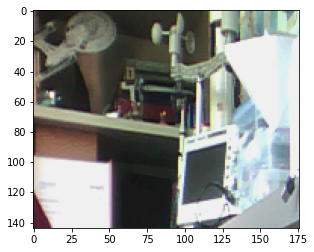

In [8]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()